# Análisis de serie de tiempo para el PM10

## Análisis Exploratorio de los datos (EDA)

In [219]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [220]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

Los datos a utilizar corresponden a un dataset que contiene mediciones realizadas en distintas estaciones, para la variable PM10, y otras variables de interes meteorologico. 

In [221]:
# Lectura de los datos
import os
os.chdir("C:\\Users\\kaes1\\Documents\\Series de tiempo")
pm10 = pd.read_csv("data_2017_2022.csv", sep=";")
pm10.head()

fecha    estacion     variable tipo medicion
0  2017-01-01T00:59:59Z  base_aerea         pm25  val      NaN
1  2017-01-01T00:59:59Z  base_aerea          so2  val      NaN
2  2017-01-01T00:59:59Z  base_aerea       lluvia  val      NaN
3  2017-01-01T00:59:59Z  base_aerea           o3  val      NaN
4  2017-01-01T00:59:59Z  base_aerea  temperatura  val      NaN

El dataset cuenta con 5 variables:
* **fecha**: esta en formato Timestamp, e indica la fecha y hora en la que fue realiza la medicion de la variable.
* **estacion**: indica la estación en la que fue realizada la medición de la variable.
* **variable**: indica la variable a la cual se realizó medicióm.
* **tipo**: se desconoce a que hace referencia
* **medición**: valor númerico registrado de la variable de interes en una fecha especifica. 


In [222]:
pm10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084061 entries, 0 to 4084060
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   fecha     object
 1   estacion  object
 2   variable  object
 3   tipo      object
 4   medicion  object
dtypes: object(5)
memory usage: 155.8+ MB


Se debe hacer un ajuste al tipo de datos para ciertas variables, principalmente la varible medición que debe ser *númerica*, y la variable fecha, que debe ser de tipo *datetime*

* **Tranformación del tipo de dato**

In [223]:
# convertir variable medición a númerica
pm10["medicion"]=pm10["medicion"].str.replace(",", ".").astype("float")

Antes de cambiar el tipo de dato de la variable *fecha*, se realiza una trasnformación a la tabla, de tal forma que se desagregada la columna de *variable* y se genera una nueva columna por cada una de las variables a la que se le realizó medición.

In [224]:
# tranformacion de la tabla 
# creacion de columnas para cada variable medida
pm10_pv = pm10.pivot(index=["fecha", "estacion"],columns= "variable", values="medicion").reset_index()
pm10_pv.head()

variable                 fecha      estacion  black_carbon  direccion_viento  \
0         2017-01-01T00:59:59Z    base_aerea           NaN               NaN   
1         2017-01-01T00:59:59Z  canaveralejo           NaN               NaN   
2         2017-01-01T00:59:59Z     compartir           NaN             208.6   
3         2017-01-01T00:59:59Z    era_obrero           NaN               NaN   
4         2017-01-01T00:59:59Z        ermita           NaN               NaN   

variable  h2s  humedad  lluvia  no2         o3   pm10   pm25  presion  \
0         NaN      NaN     NaN  NaN        NaN    NaN    NaN      NaN   
1         NaN      NaN     NaN  NaN        NaN   51.7    NaN      NaN   
2         NaN     75.9     0.0  NaN   8.456252  221.0  161.0    680.5   
3         NaN      NaN     0.0  NaN  16.147321  195.8    NaN      NaN   
4         NaN      NaN     NaN  NaN        NaN   61.9    NaN      NaN   

variable  radiacion_solar       so2  temperatura  temperatura_10_m  uv-pm  \
0                     NaN       NaN          NaN               NaN    NaN   
1                     NaN  0.314265          NaN               NaN    NaN   
2                     0.0       NaN         25.3               NaN    NaN   
3                     NaN       NaN          NaN               NaN    NaN   
4                     NaN  2.147475          NaN               NaN    NaN   

variable  velocidad_viento  
0                      NaN  
1                      NaN  
2                      1.4  
3                      NaN  
4                      NaN

In [225]:
pm10_pv.shape

(473256, 18)

Ahora se tienen 19 variables en el dataset.

In [226]:
# Datos por hora
from datetime import datetime
pm10_pv["fecha_"]= pm10_pv["fecha"].str.slice(start=0,stop=10, step=1)
pm10_pv["fecha"]= pd.to_datetime(pm10_pv["fecha"])
pm10_pv["Year"]= pm10_pv["fecha"].dt.year
pm10_pv["Mes"]= pm10_pv["fecha"].dt.month

pm10_pv.head()

variable                     fecha      estacion  black_carbon  \
0        2017-01-01 00:59:59+00:00    base_aerea           NaN   
1        2017-01-01 00:59:59+00:00  canaveralejo           NaN   
2        2017-01-01 00:59:59+00:00     compartir           NaN   
3        2017-01-01 00:59:59+00:00    era_obrero           NaN   
4        2017-01-01 00:59:59+00:00        ermita           NaN   

variable  direccion_viento  h2s  humedad  lluvia  no2         o3   pm10  ...  \
0                      NaN  NaN      NaN     NaN  NaN        NaN    NaN  ...   
1                      NaN  NaN      NaN     NaN  NaN        NaN   51.7  ...   
2                    208.6  NaN     75.9     0.0  NaN   8.456252  221.0  ...   
3                      NaN  NaN      NaN     0.0  NaN  16.147321  195.8  ...   
4                      NaN  NaN      NaN     NaN  NaN        NaN   61.9  ...   

variable  presion  radiacion_solar       so2  temperatura  temperatura_10_m  \
0             NaN              NaN       NaN          NaN               NaN   
1             NaN              NaN  0.314265          NaN               NaN   
2           680.5              0.0       NaN         25.3               NaN   
3             NaN              NaN       NaN          NaN               NaN   
4             NaN              NaN  2.147475          NaN               NaN   

variable  uv-pm  velocidad_viento      fecha_  Year  Mes  
0           NaN               NaN  2017-01-01  2017    1  
1           NaN               NaN  2017-01-01  2017    1  
2           NaN               1.4  2017-01-01  2017    1  
3           NaN               NaN  2017-01-01  2017    1  
4           NaN               NaN  2017-01-01  2017    1  

[5 rows x 21 columns]

A continuación se realiza un descriptivo númerico de las variables en el dataset:

In [227]:
pm10_pv.describe()

variable  black_carbon  direccion_viento           h2s        humedad  \
count      8620.000000     204419.000000  15353.000000  230887.000000   
mean          4.552135        178.454751      2.154953      70.706824   
std          18.988855        100.544821      2.126202      16.125048   
min           0.026000          0.000000      0.000000      12.800000   
25%           1.298588         95.900000      0.682665      58.600000   
50%           1.985470        173.300000      1.490718      71.100000   
75%           2.960525        262.600000      2.730660      83.900000   
max         408.712800        360.000000     27.975338     100.700000   

variable         lluvia       no2             o3           pm10  \
count     260671.000000  1.000000  201936.000000  234568.000000   
mean           0.281119  0.131641      25.261089      40.489469   
std            2.567629       NaN      28.968317      25.002037   
min            0.000000  0.131641      -3.158832       0.000000   
25%            0.000000  0.131641       5.768302      23.000000   
50%            0.000000  0.131641      12.949249      36.000000   
75%            0.000000  0.131641      34.727532      53.000000   
max          156.970000  0.131641     290.435961     420.000000   

variable           pm25        presion  radiacion_solar            so2  \
count     174546.000000  209181.000000    221284.000000  132180.000000   
mean          16.655055     878.770948       226.741876       4.640322   
std           10.931488      70.114450       294.656423       8.490598   
min            0.000000      27.700000         0.000000      -4.530647   
25%            8.920000     900.200000         0.000000       1.230870   
50%           14.340000     903.000000        23.000000       3.037891   
75%           22.360000     905.300000       488.000000       6.232914   
max          388.000000     913.500000      1042.910000     842.150463   

variable    temperatura  temperatura_10_m        uv-pm  velocidad_viento  \
count     267206.000000      13746.000000  8620.000000     205405.000000   
mean          25.556927         23.713131     2.789227          1.545669   
std            3.849027          3.483256     1.793203          1.458267   
min            8.000000         14.700000     0.019520          0.000000   
25%           22.500000         20.900000     1.570683          0.600000   
50%           25.200000         22.900000     2.412391          1.000000   
75%           28.200000         26.600000     3.506891          2.100000   
max           40.200000         33.000000    20.767270         37.700000   

variable           Year            Mes  
count     473256.000000  473256.000000  
mean        2019.500228       6.523962  
std            1.707471       3.448423  
min         2017.000000       1.000000  
25%         2018.000000       4.000000  
50%         2020.000000       7.000000  
75%         2021.000000      10.000000  
max         2022.000000      12.000000

En el caso del *PM10*, a simple viste se logra apreciar que hay una gran cantidad de datos faltantes con respecto al total de datos en el dataset (aproximandamente el 50%). Se tiene un valor promedio de 40.49 µg/m3, y el 50% o menos de los registros tienen valor igual o inferior a 36 µg/m3, pero se alcanzan valores altos, siendo el maximo registrso de 420 µg/m3. Esto da indiciones de que distribución de la varible se ecuentra sesgada hacia la derecha.

In [228]:
pm10_pv.describe(include="object")

variable    estacion      fecha_
count         473256      473256
unique             9        2191
top       base_aerea  2017-01-01
freq           52584         216

In [229]:
pm10_pv["estacion"].unique()

array(['base_aerea', 'canaveralejo', 'compartir', 'era_obrero', 'ermita',
       'flora', 'pance', 'transitoria', 'univalle'], dtype=object)

En este caso se tienen mediciones de PM10 y demás variables para 9 estaciones meteorológicas, siendo la estación *base_aerea* la que tiene el mayor número de registros. Tambien se puede observar que se tienen registros para 2191 timestamps, siendo la de mayor número de resgitros el *01-01-2017*.

### Comportamiento y Distribución de los datos de PM10

En la siguiente figura se muestra un grafico de densidad y un grafico de cajas y bigotes para el pm10 a nivel general. 

Text(0.5, 0, ' pm10 (µg/m³)')

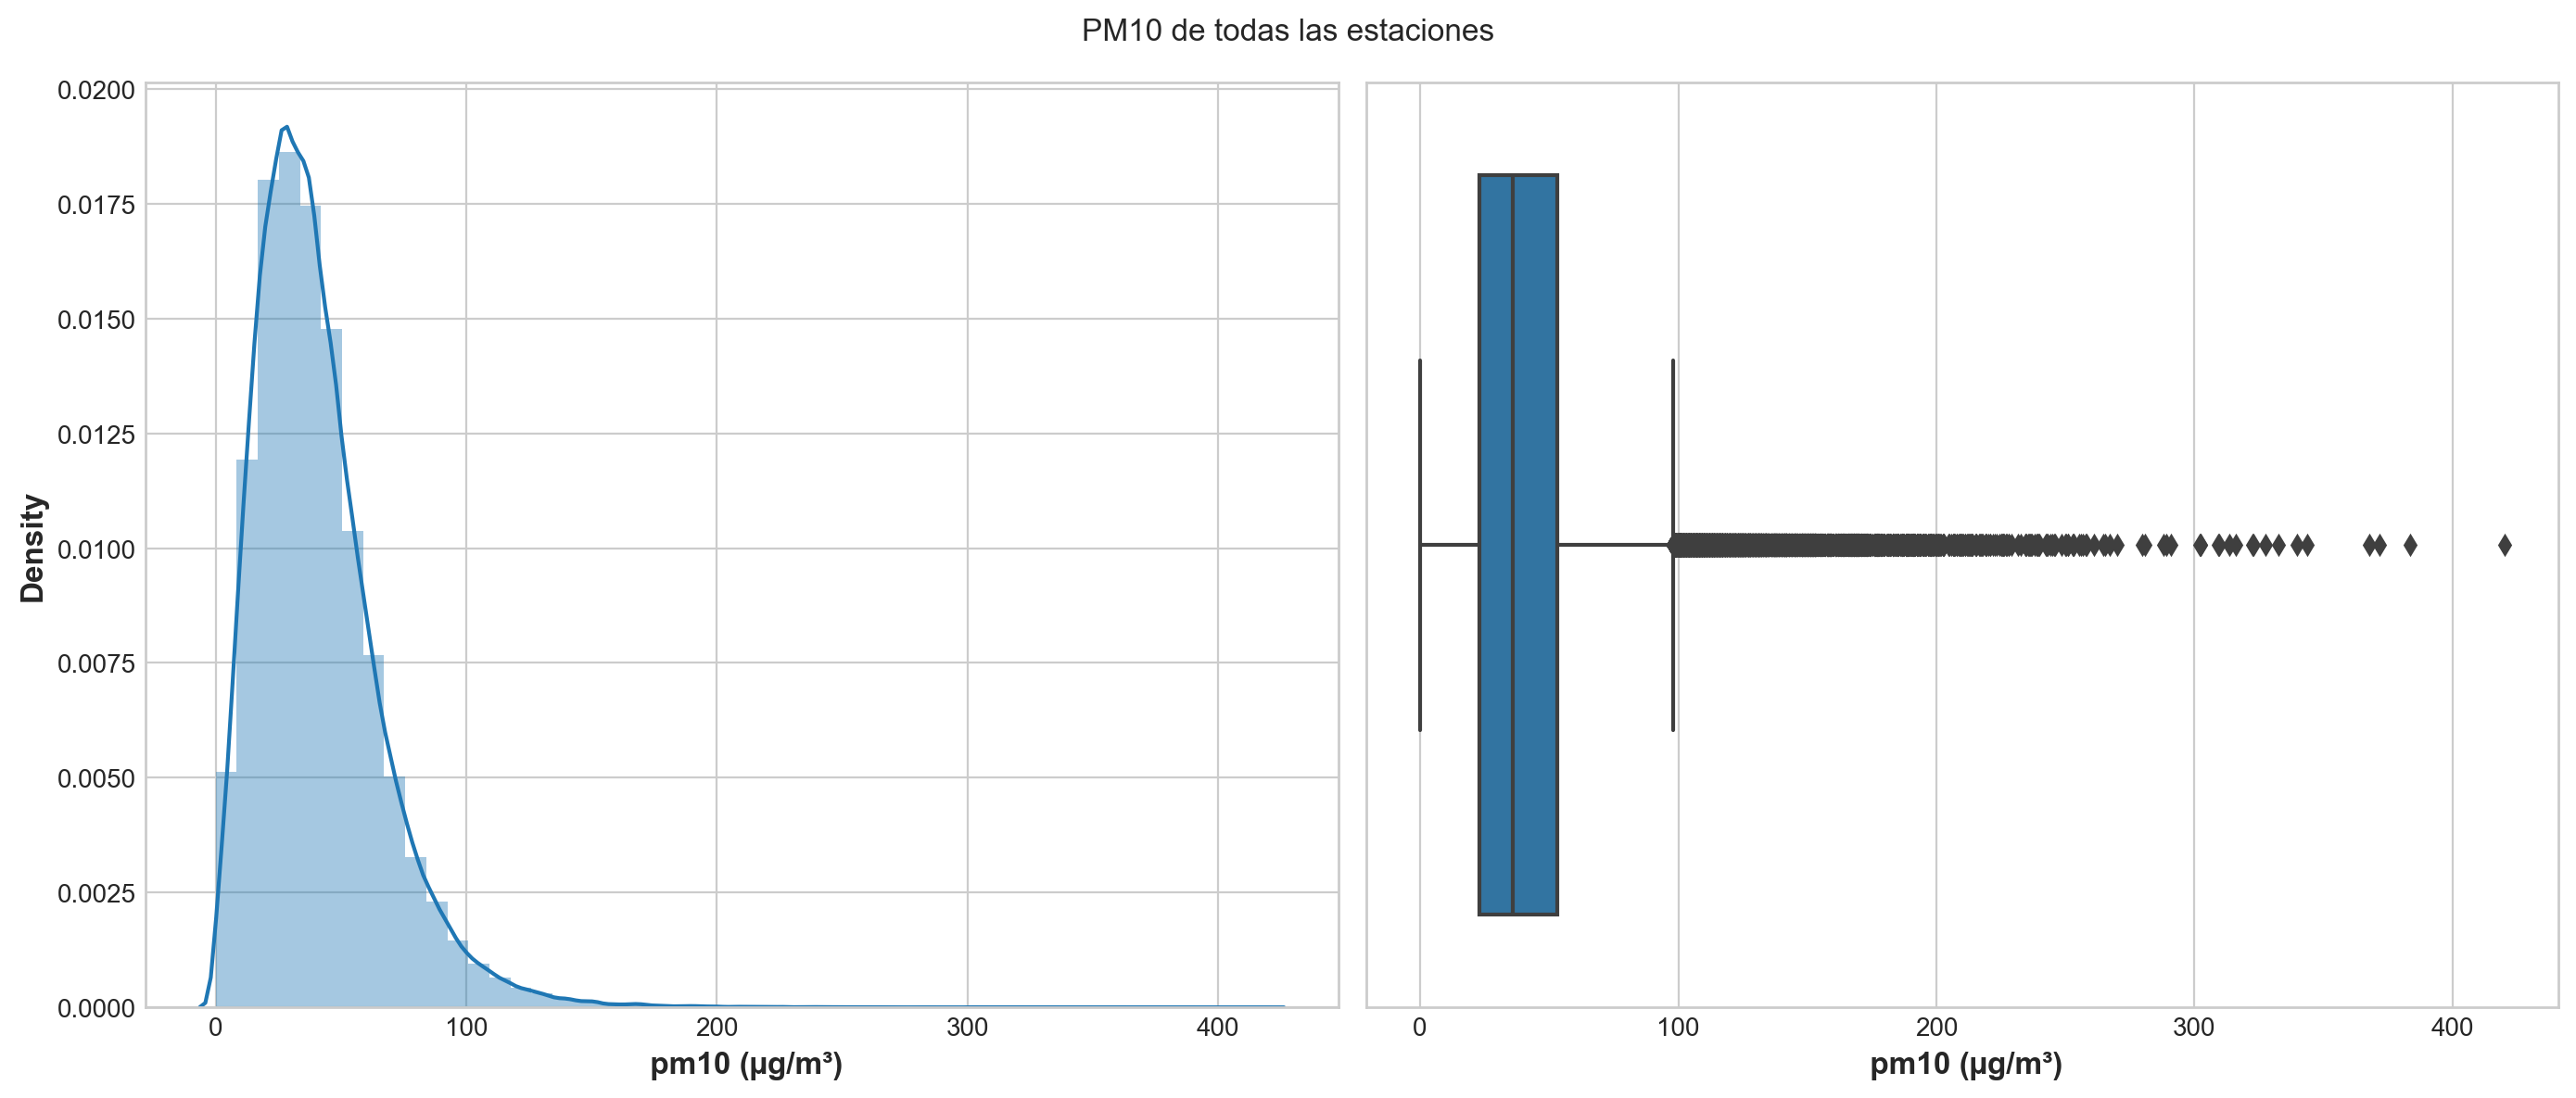

In [230]:
# Grafico de densidad y boxplot para la distribucion del pm10
plt.figure(figsize=(14, 6))
plt.suptitle('PM10 de todas las estaciones')  # Agregar título
plt.subplot(1, 2, 1) # grafico de densidad
sns.distplot(pm10_pv["pm10"], norm_hist=False)
plt.xlabel(" pm10 (µg/m³)")

plt.subplot(1, 2, 2) # boxplot
sns.boxplot(x=pm10_pv["pm10"])
plt.xlabel(" pm10 (µg/m³)")

Se confirma que la distribución del *pm10* es sesgada a la derecha, con una alta presencia de valores  que podrían considerarse atipicos. Se puede observar que alrededor de un 75% de los valores de *pm10* son valores iguales o inferiores a 50 µg/m3, alcanzando en ocasiones valores, posiblemente atipicos, superiores a los 100 µg/m3.

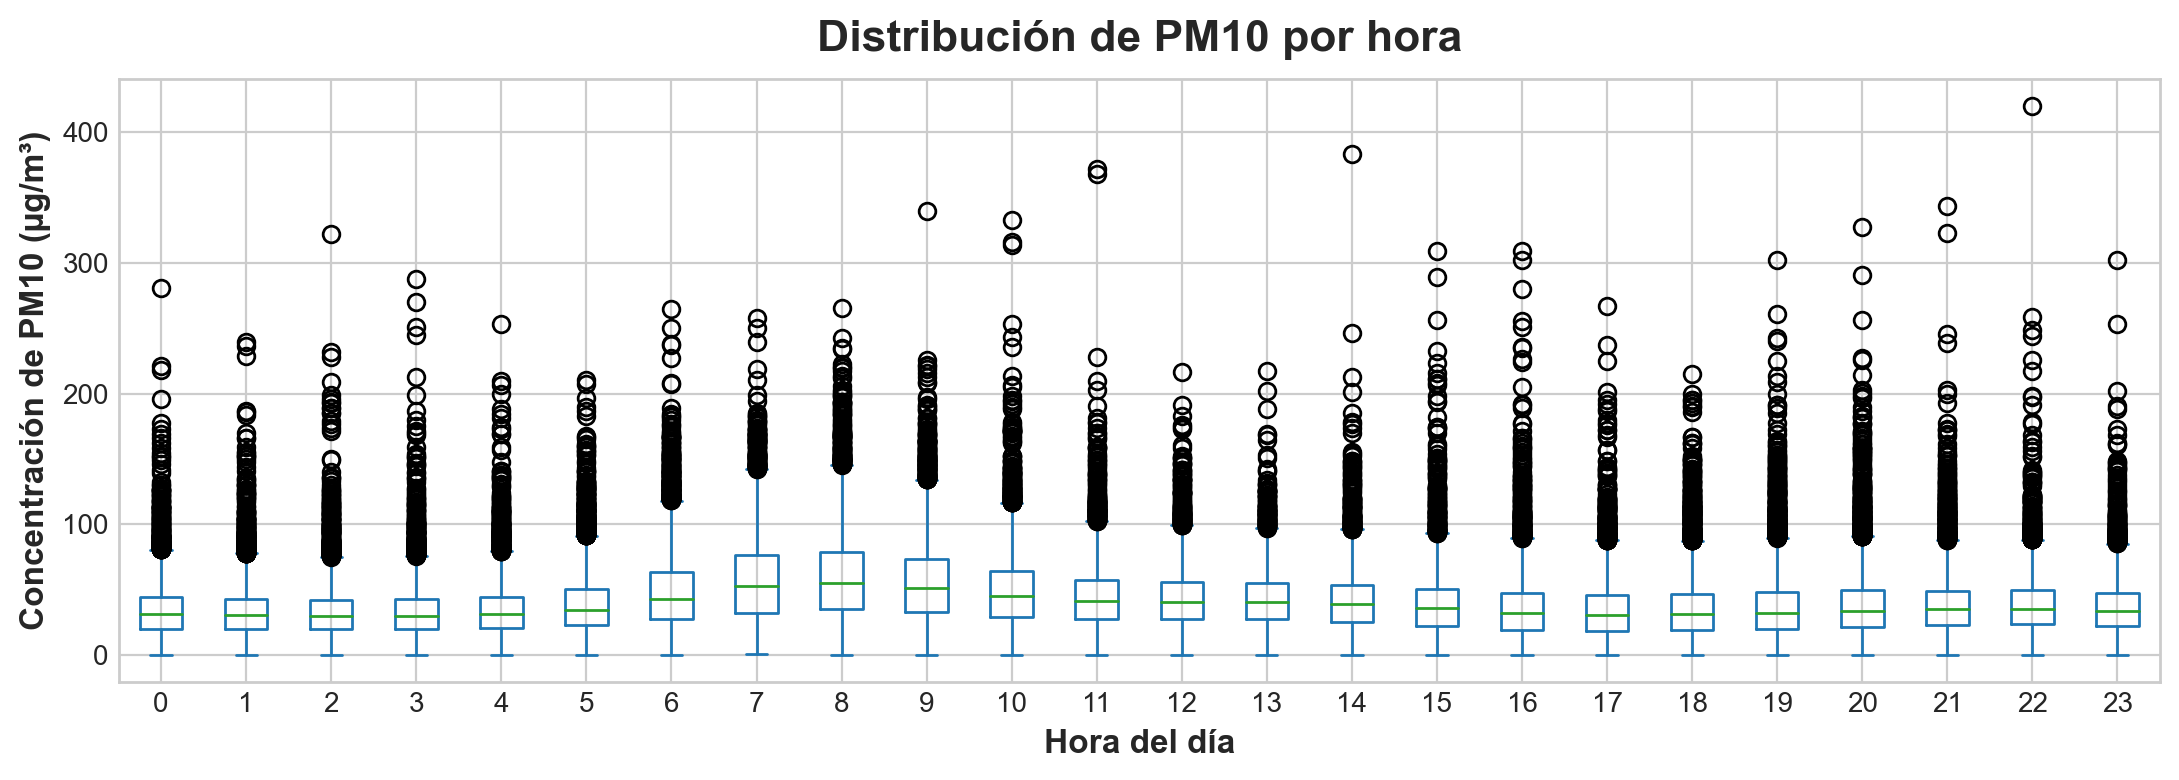

In [231]:
# Box plot para cada hora
plt.style.use("seaborn-whitegrid")
pm10_pv.set_index(pm10_pv.fecha.dt.hour, append=True)['pm10'].unstack().plot.box()
plt.xlabel("Hora del día") 
plt.ylabel("Concentración de PM10 (µg/m³)")  
plt.title("Distribución de PM10 por hora")  
plt.show() 


Se explora la distribución del *pm10* a nivel horario. Entre las 5 y 10 am se observa un aumento en la mediana con respecto a las demás horas, y una mayor dispersión en los datos de *pm10*, lo quue puede indicar que en horas de la mañana hay eventos que . A partir de las 11 am los valores de *pmn10* tienen una leve tendencia a la baja, hasta mantener un comportamiento aproximadamente constante en el resto de horas.

Se visualiza la serie de tiempo para cada estación con frecuencia horaria. 

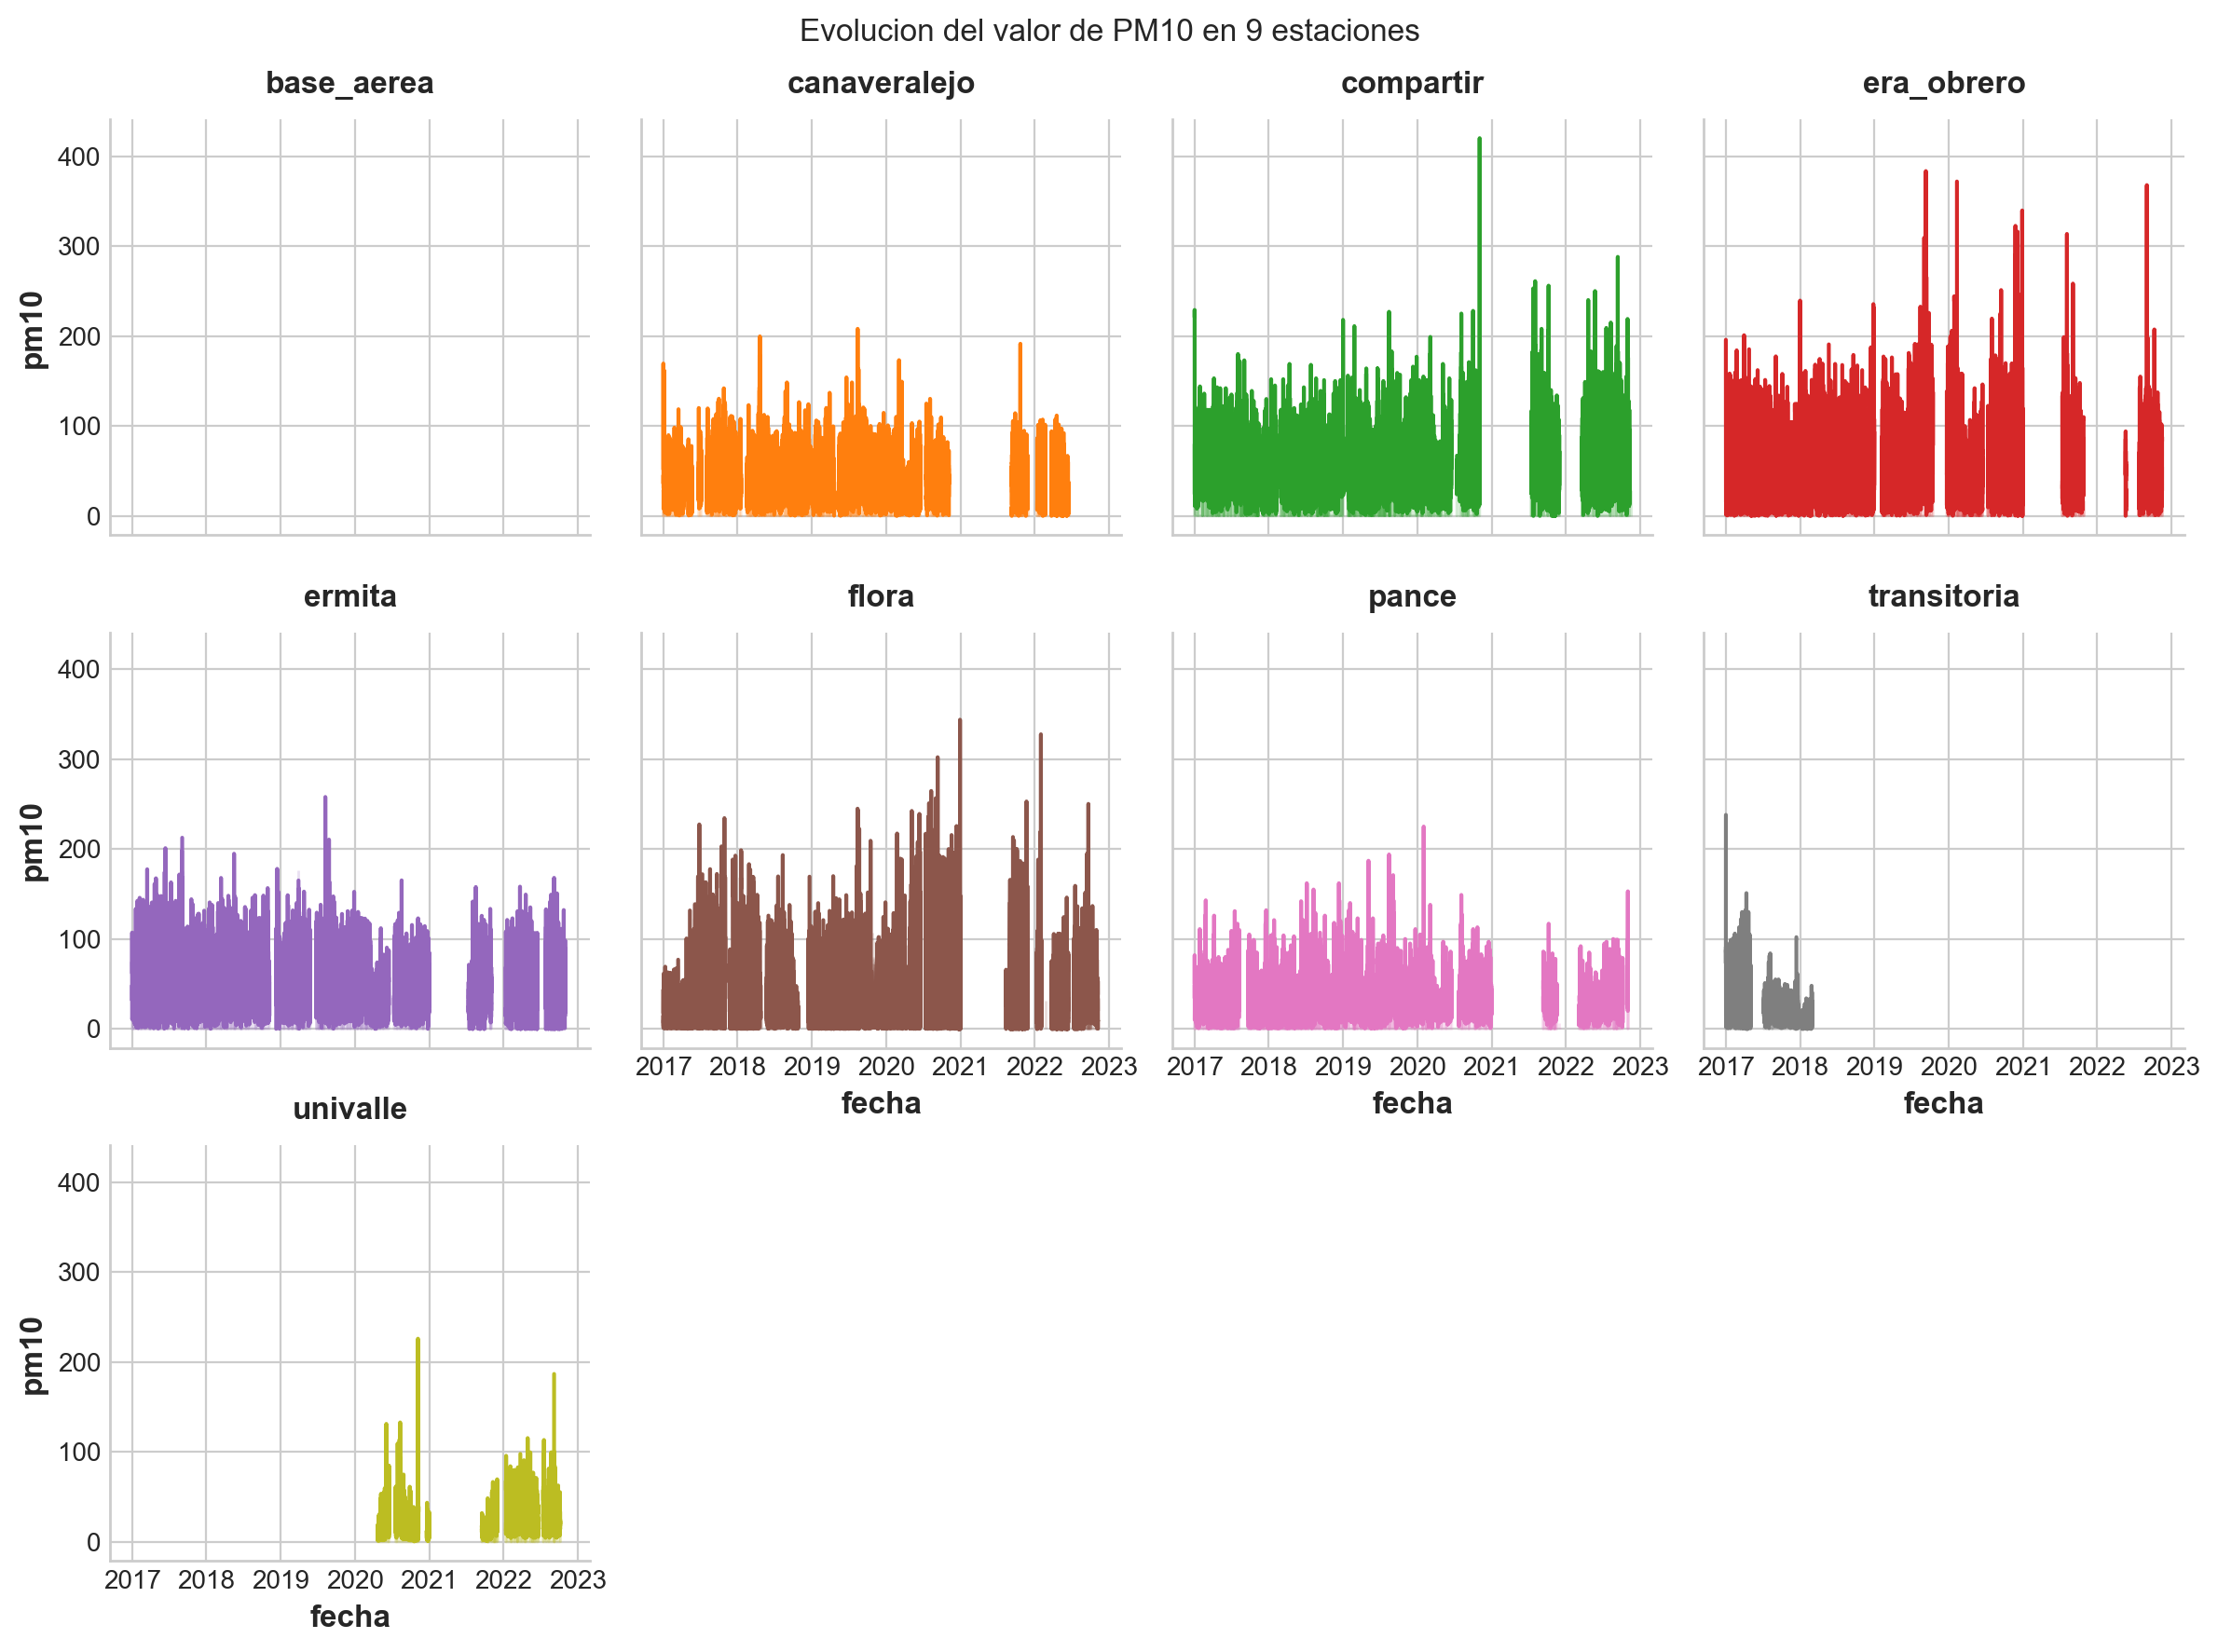

In [232]:

g = sns.FacetGrid(pm10_pv, col='estacion', hue='estacion', col_wrap=4, ) # Create a grid : initialize it
g = g.map(plt.plot, 'fecha', 'pm10') # Add the line over the area with the plot function
g = g.map(plt.fill_between, 'fecha', 'pm10', alpha=0.2).set_titles("{col_name} estacion") # Fill the area with fill_between
 
g = g.set_titles("{col_name}")# Control the title of each facet
plt.subplots_adjust(top=0.92) # Add a title for the whole plot
g = g.fig.suptitle('Evolucion del valor de PM10 en 9 estaciones')

# Show the graph
plt.show()

A simple vista se aprecia que para todas las estaciones se tienen datos faltantes. Para la estación *base_aerea* no se observa ningún valor de *pm10*. La mayoría de las estaciones presentan datos faltantes a lo largo de los años, pero en espcial entre finales de 2020 y mediados de 2021, periodo que corresponde a la pandemia ocasionada por el COVID-19. Los datos faltantes ocasionados por este periodo, se pueden considerar de naturaleza MANR (Faltantes no al azar), ya que su medición se vio afectada por un evento identificable. Los demás valores faltantes presentes a lo largo de los años, pueden ser de naturaleza MAR (Faltantes al azar) o MCAR (Faltantes completamente al azar), pero no se tiene suficiente información para afirmarlo.

Se realiza un analisis de la evolución del *pm10* a lo largo de los años. En el grafico de caja y bigotes, no se observan una diferencia en los tamaños de las cajas, lo que puede indicar que la dispersión de los valores de *pm10* a lo largo de los años se ha mantenido constante. A su vez, las cajas se ubican dentro del mismo rango de valores, por lo que no hay indicios de una tendencia a la alza o a la baja en los valores de la variable a través de los años.

Text(0.5, 1.0, 'Distribución de PM10 por año')

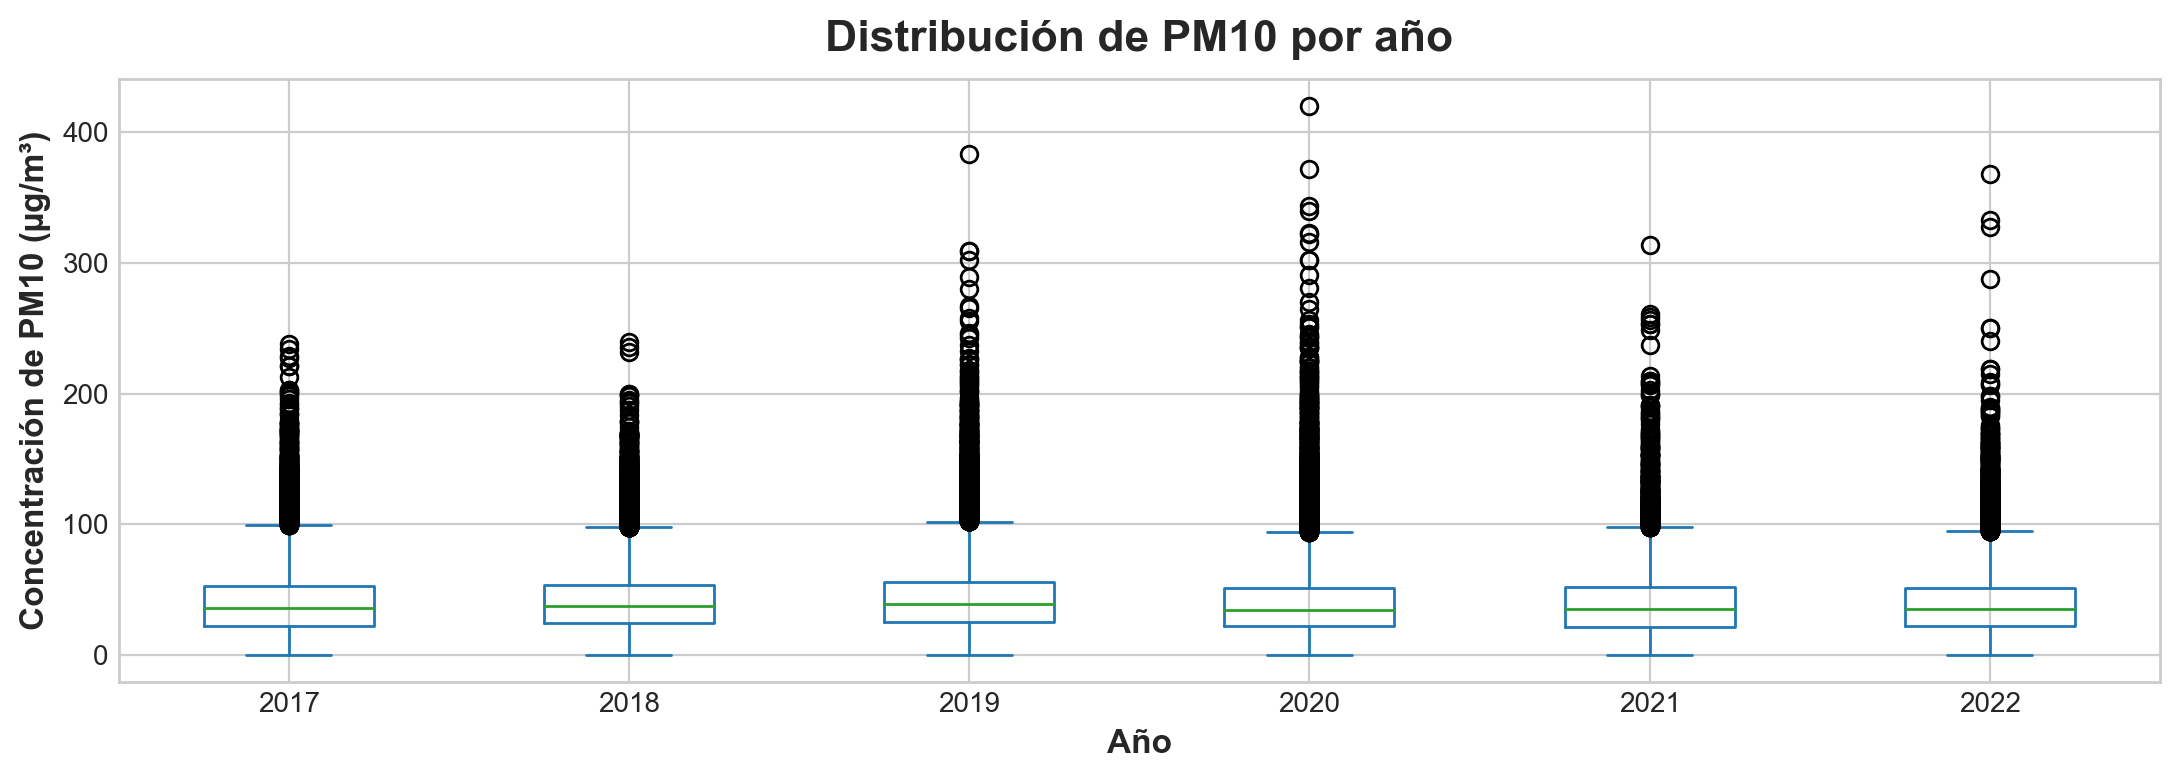

In [233]:
# Box plot por año
pm10_pv.set_index(pm10_pv.fecha.dt.year, append=True)['pm10'].unstack().plot.box()
plt.xlabel("Año") 
plt.ylabel("Concentración de PM10 (µg/m³)")  
plt.title("Distribución de PM10 por año")  

Al observar el comportamiento anual del *pm10* para cada estación, se logra aprecia lo siguiente:
* Sin reg

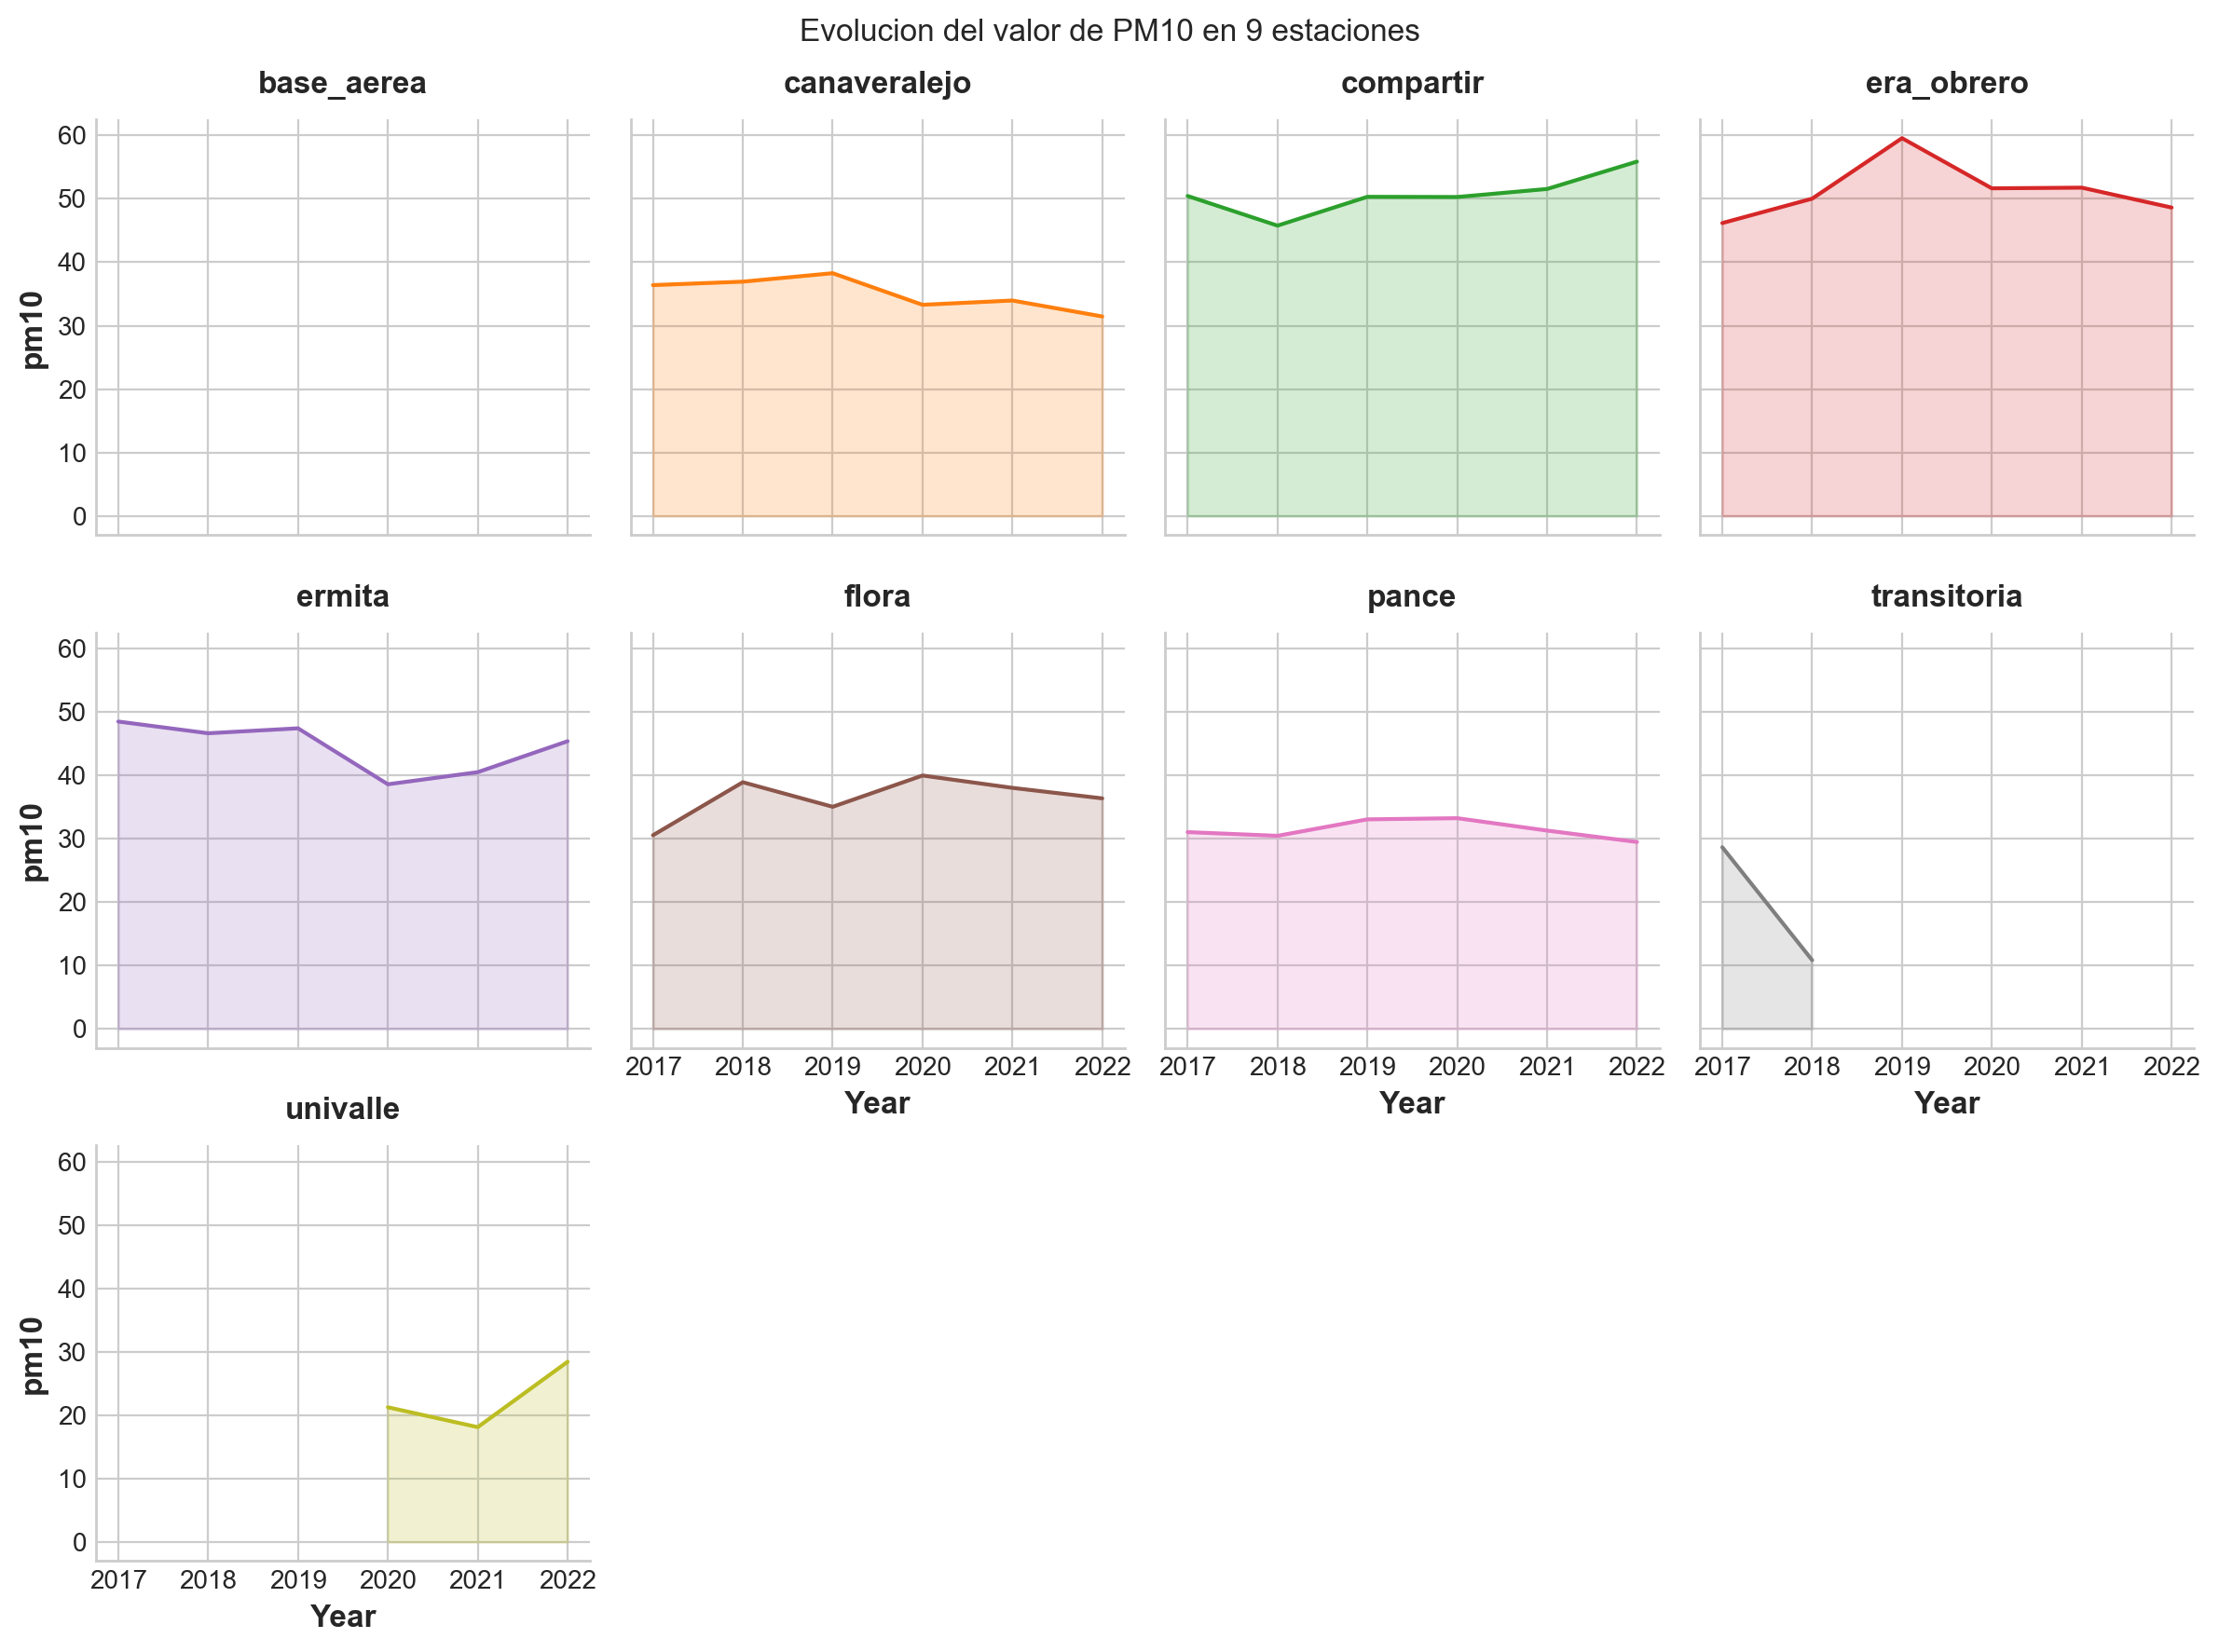

In [234]:
pm10_year = pm10_pv.groupby(["Year", "estacion"])["pm10"].mean().reset_index()

g = sns.FacetGrid(pm10_year, col='estacion', hue='estacion', col_wrap=4, ) # Create a grid : initialize it
g = g.map(plt.plot, 'Year', 'pm10') # Add the line over the area with the plot function

g = g.map(plt.fill_between, 'Year', 'pm10', alpha=0.2).set_titles("{col_name} estacion") # Fill the area with fill_between
g = g.set_titles("{col_name}") # Control the title of each facet

plt.subplots_adjust(top=0.92) # Add a title for the whole plot
g = g.fig.suptitle('Evolucion del valor de PM10 en 9 estaciones')

# Show the graph

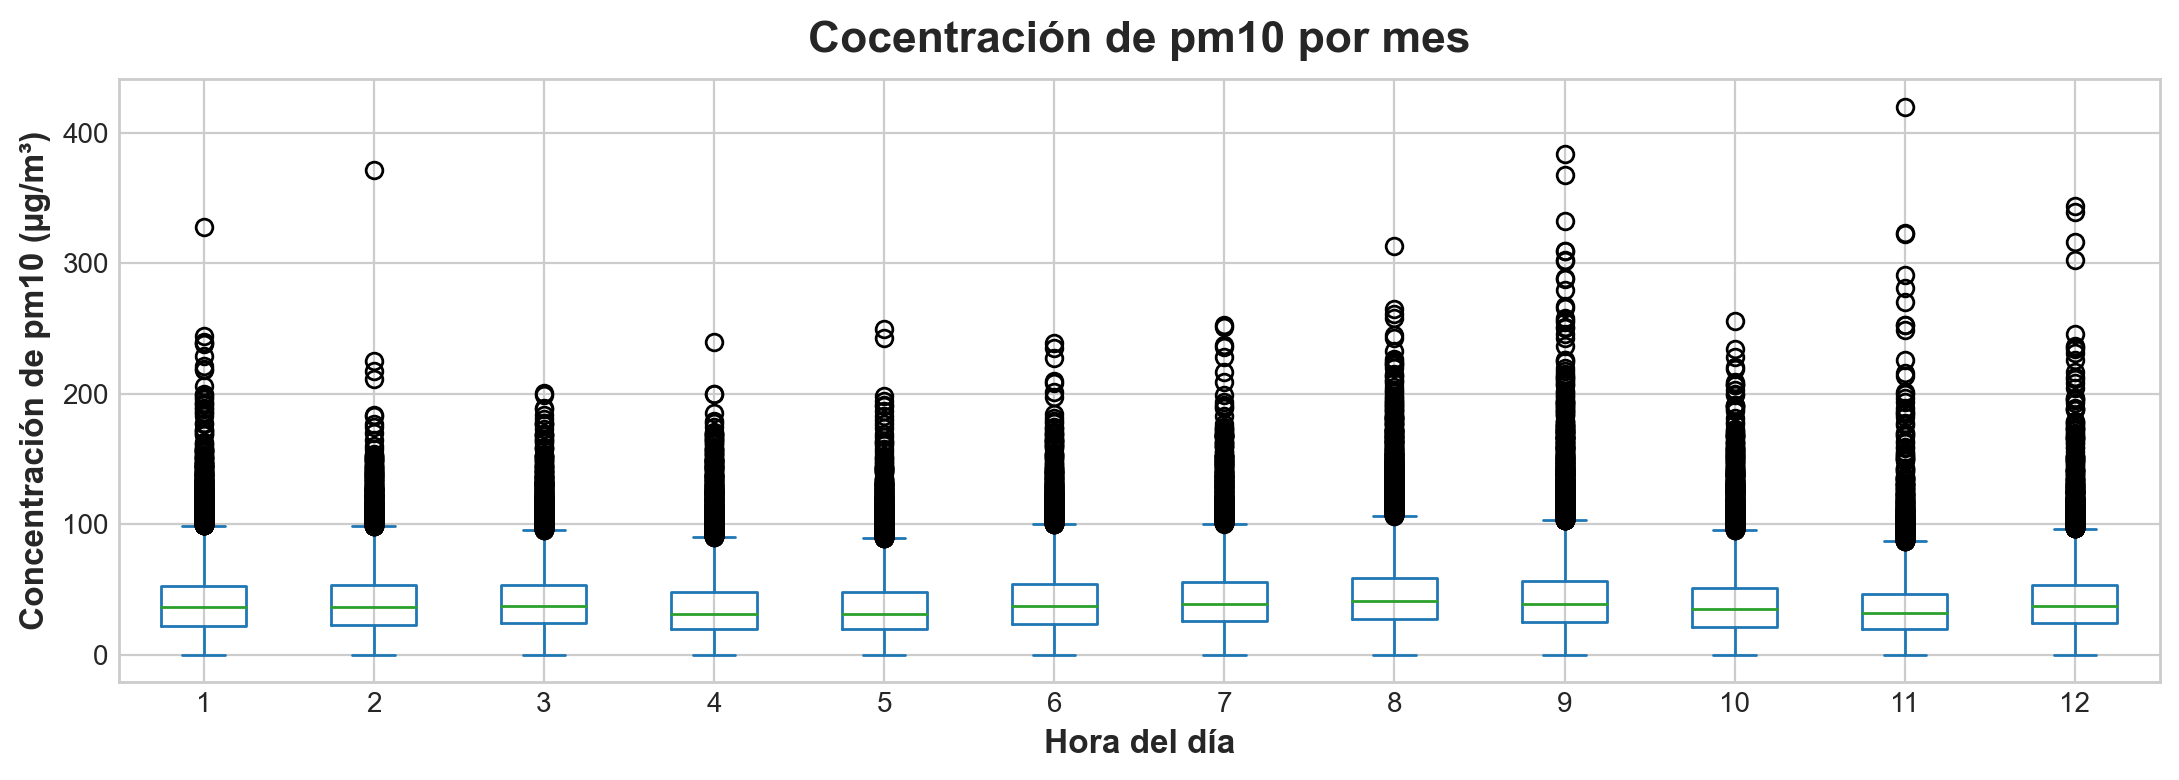

In [235]:
# Box plot por mes
pm10_pv.set_index(pm10_pv.fecha.dt.month, append=True)['pm10'].unstack().plot.box()
plt.xlabel("Hora del día") 
plt.ylabel("Concentración de pm10 (µg/m³)")
plt.title("Cocentración de pm10 por mes")
plt.show()

### Datos faltantes

Como se pudo observar en los graficos a nivel de estación, existen datos faltantes para el *pm10* en cada una de las estaciones, para tener una cuantificación de los datos faltantes, se obtiene el porcentaje de datos faltantes de *pm10* para cada una de las estaciones

In [236]:
def null_percentage(df):
    """
    This function calculates the percentage of null values per column in a DataFrame.
    """
    null_counts = df.isnull().sum()
    total_counts = df.shape[0]
    null_percentages = (null_counts / total_counts) * 100
    return null_percentages
 
# Process data for each station and compute the null percentage
stations = pm10_pv['estacion'].unique()
null_percentage_results = {}
 
for station in stations:
    data_current_estacion = pm10[pm10['estacion'] == station].copy()
    pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()
    null_percentage_results[station] = null_percentage(pivoted_data_current_estacion)
 
# Convert results to a DataFrame for better visualization
null_percentage_df = pd.DataFrame(null_percentage_results).T  # Transpose to get stations as rows
 
# fill null values with 100 (meaning 100% of null values)
null_percentage_df = null_percentage_df.fillna(100)
 
# format numbers
numeric_cols = null_percentage_df.select_dtypes(include=['number']).columns.tolist()
 
null_percentage_df["pm10"] = null_percentage_df["pm10"].astype("int64")
   
null_percentage_df.loc[:,["pm10"]]

variable      pm10
base_aerea     100
canaveralejo    40
compartir       27
era_obrero      33
ermita          25
flora           32
pance           31
transitoria     85
univalle        77

Al observar los datos faltantes de *pm10* para cada una de las estaciones, se concluye que la mejor estación para trabajar es la estación *ermita*, ya que presenta el menor porcentaje de datos faltantes (25%).

In [305]:
# filtrar datos de la estacion ermita
ermita = pm10_pv[pm10_pv["estacion"]=="ermita"]
ermita.head()

variable                     fecha estacion  black_carbon  direccion_viento  \
4        2017-01-01 00:59:59+00:00   ermita           NaN               NaN   
13       2017-01-01 01:59:59+00:00   ermita           NaN               NaN   
22       2017-01-01 02:59:59+00:00   ermita           NaN               NaN   
31       2017-01-01 03:59:59+00:00   ermita           NaN               NaN   
40       2017-01-01 04:59:59+00:00   ermita           NaN               NaN   

variable  h2s  humedad  lluvia  no2  o3   pm10  ...  presion  radiacion_solar  \
4         NaN      NaN     NaN  NaN NaN   61.9  ...      NaN              NaN   
13        NaN      NaN     NaN  NaN NaN  101.0  ...      NaN              NaN   
22        NaN      NaN     NaN  NaN NaN   75.6  ...      NaN              NaN   
31        NaN      NaN     NaN  NaN NaN   56.3  ...      NaN              NaN   
40        NaN      NaN     NaN  NaN NaN  107.1  ...      NaN              NaN   

variable       so2  temperatura  temperatura_10_m  uv-pm  velocidad_viento  \
4         2.147475          NaN               NaN    NaN               NaN   
13        2.068908          NaN               NaN    NaN               NaN   
22        2.461739          NaN               NaN    NaN               NaN   
31        2.252229          NaN               NaN    NaN               NaN   
40        2.068908          NaN               NaN    NaN               NaN   

variable      fecha_  Year  Mes  
4         2017-01-01  2017    1  
13        2017-01-01  2017    1  
22        2017-01-01  2017    1  
31        2017-01-01  2017    1  
40        2017-01-01  2017    1  

[5 rows x 21 columns]

#### Datos de prueba (test)

Antes de proceder, se obtiene el dataset que se utilizará para hacer las pruebas de los modelos que serán implementados. Este dataset de prueba (test), se conforma de las ultimas 24 horas consecutivas con regsitros de *pm10*, que corresponden a los registros del 31-10-2022.

In [306]:
test_data = ermita.loc[ermita["fecha_"]=="2022-10-31", ["fecha", "pm10"]].reset_index().drop("index", axis=1)
display(test_data)

variable                     fecha  pm10
0        2022-10-31 00:59:59+00:00  49.3
1        2022-10-31 01:59:59+00:00  45.1
2        2022-10-31 02:59:59+00:00  37.3
3        2022-10-31 03:59:59+00:00  34.8
4        2022-10-31 04:59:59+00:00  38.3
5        2022-10-31 05:59:59+00:00  44.0
6        2022-10-31 06:59:59+00:00  61.2
7        2022-10-31 07:59:59+00:00  53.4
8        2022-10-31 08:59:59+00:00  96.0
9        2022-10-31 09:59:59+00:00  98.6
10       2022-10-31 10:59:59+00:00  63.9
11       2022-10-31 11:59:59+00:00  43.9
12       2022-10-31 12:59:59+00:00  53.2
13       2022-10-31 13:59:59+00:00  54.1
14       2022-10-31 14:59:59+00:00  50.5
15       2022-10-31 15:59:59+00:00  45.2
16       2022-10-31 16:59:59+00:00  31.5
17       2022-10-31 17:59:59+00:00  41.4
18       2022-10-31 18:59:59+00:00  40.6
19       2022-10-31 19:59:59+00:00  23.7
20       2022-10-31 20:59:59+00:00  29.0
21       2022-10-31 21:59:59+00:00  39.3
22       2022-10-31 22:59:59+00:00  27.3
23       2022-10-31 23:59:59+00:00  73.5

Para los datos que se utilizrán para entrenar los modelos de series de tiempo, se utilizarán los datos anteriores a la fecha 2022-11-08:

In [307]:
ermita = ermita.loc[ermita["fecha_"]<"2022-10-31"]
ermita.tail()

variable                     fecha estacion  black_carbon  direccion_viento  \
459823   2022-10-30 19:59:59+00:00   ermita           NaN               NaN   
459832   2022-10-30 20:59:59+00:00   ermita           NaN               NaN   
459841   2022-10-30 21:59:59+00:00   ermita           NaN               NaN   
459850   2022-10-30 22:59:59+00:00   ermita           NaN               NaN   
459859   2022-10-30 23:59:59+00:00   ermita           NaN               NaN   

variable  h2s  humedad  lluvia  no2  o3  pm10  ...  presion  radiacion_solar  \
459823    NaN     71.2     NaN  NaN NaN  31.3  ...    898.7              NaN   
459832    NaN     71.5     NaN  NaN NaN  14.9  ...    899.8              NaN   
459841    NaN     75.3     NaN  NaN NaN  14.5  ...    900.8              NaN   
459850    NaN     78.6     NaN  NaN NaN  14.3  ...    901.3              NaN   
459859    NaN     83.2     NaN  NaN NaN  32.2  ...    901.4              NaN   

variable  so2  temperatura  temperatura_10_m  uv-pm  velocidad_viento  \
459823    NaN         27.0               NaN    NaN               NaN   
459832    NaN         27.0               NaN    NaN               NaN   
459841    NaN         26.3               NaN    NaN               NaN   
459850    NaN         25.5               NaN    NaN               NaN   
459859    NaN         24.6               NaN    NaN               NaN   

variable      fecha_  Year  Mes  
459823    2022-10-30  2022   10  
459832    2022-10-30  2022   10  
459841    2022-10-30  2022   10  
459850    2022-10-30  2022   10  
459859    2022-10-30  2022   10  

[5 rows x 21 columns]

### Imputación de datos faltantes

Con el fin de realizar las predicciones de *pm10* para la estación *ermita*, se aplicarán distintas tecnicas de imputación de datos para los datos faltantes, con el fin de escoger la que afecta en la menor medida la distribución de la variable.

In [22]:
# for Kalman Smoothing use R and R objects
import rpy2.robjects as robjects
# import R packages
from rpy2.robjects.packages import importr
imputeTS = importr('imputeTS') 

kalman_StructTs = robjects.r['na.kalman']
kalman_auto_arima = robjects.r['na.kalman']

# for other imputation methods
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# grafico de la serie de tiempo y los datos imputados
def method_plot(df, cols):
    fig, ax = plt.subplots()
    if isinstance(cols, str):
        df[cols].plot(style='b--', ax=ax)
    else:
        for c in cols:
            df[c].plot(style='b--', ax=ax)        
    df['pm10'].plot(style='bo', ax=ax)

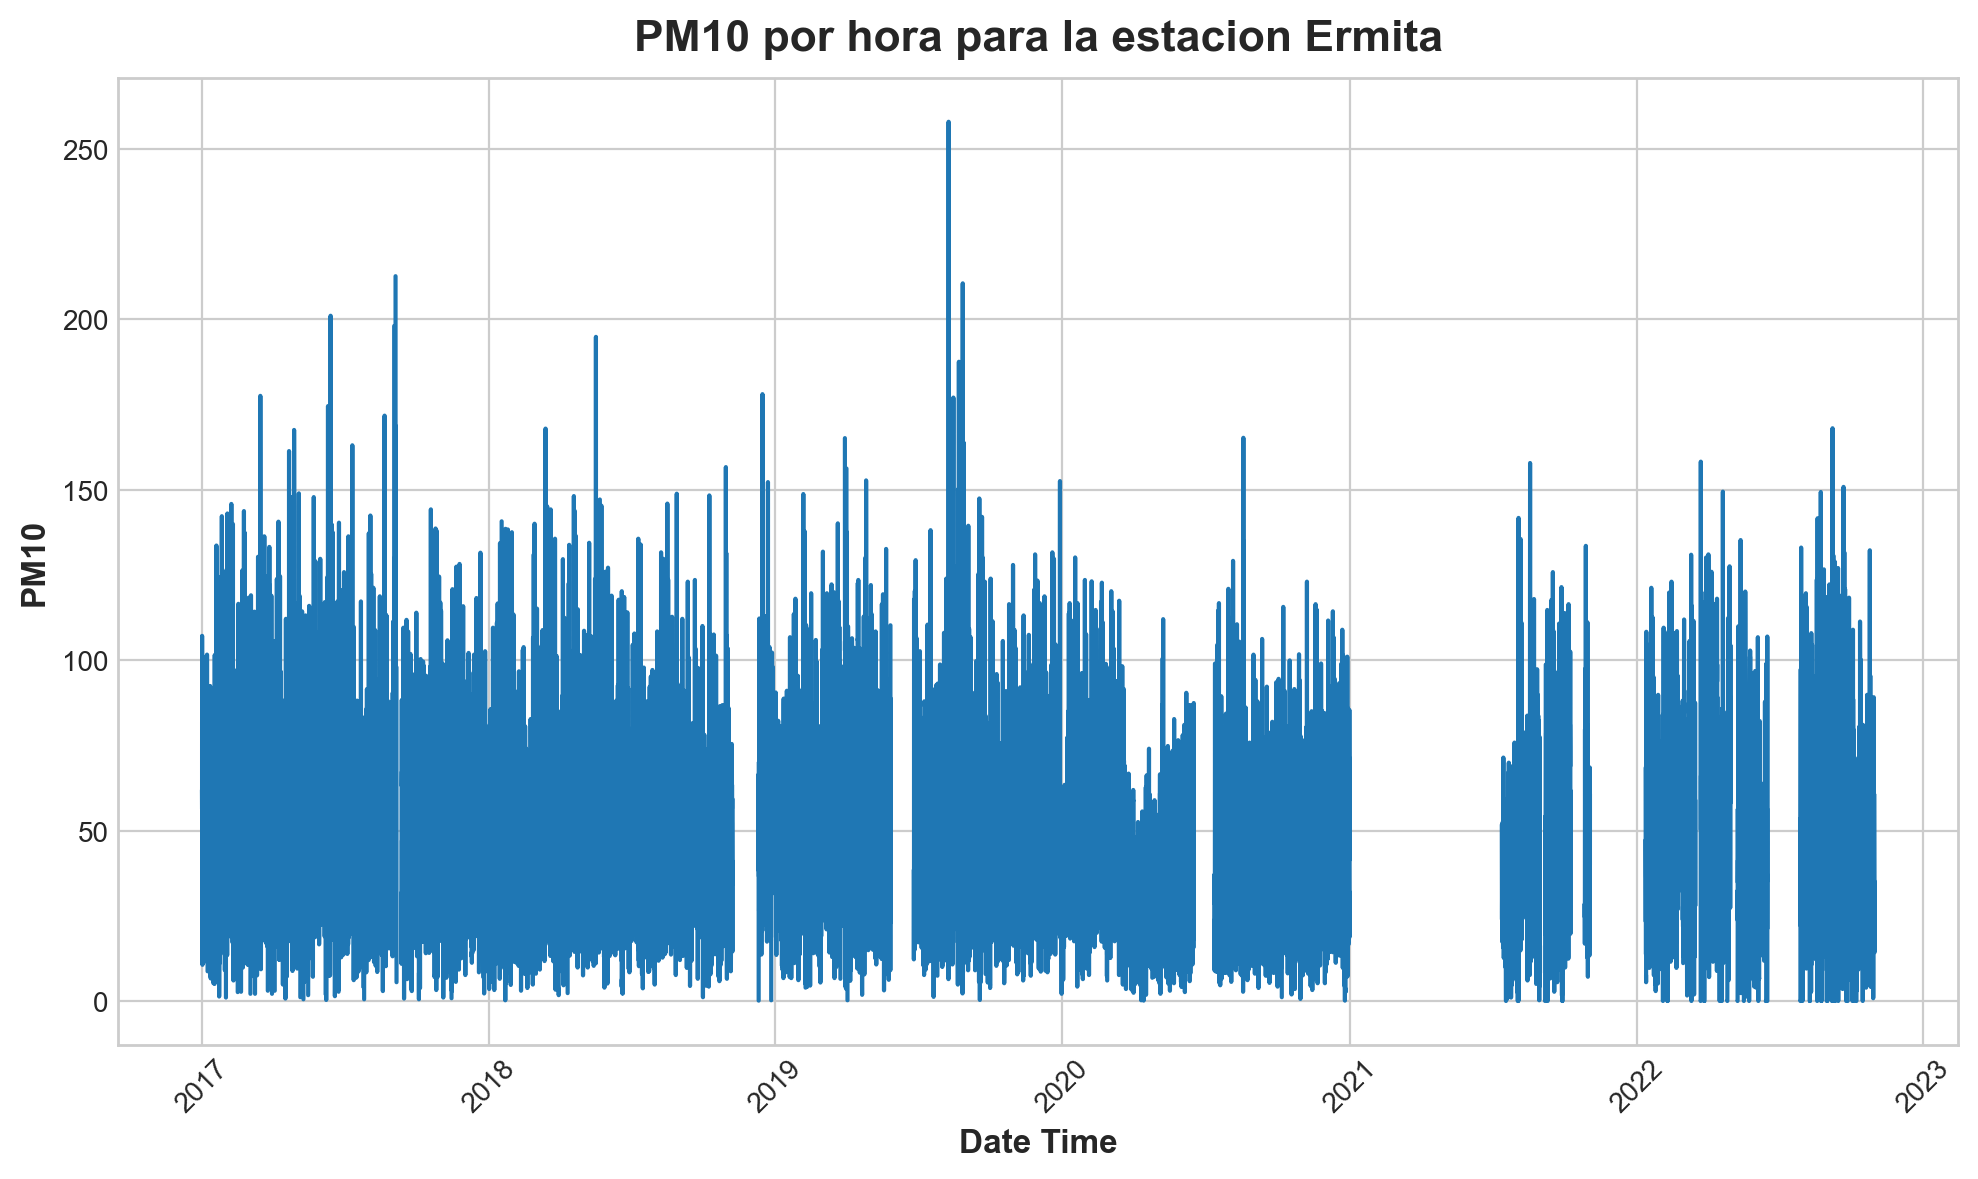

In [24]:
# grafico del pm10
plt.figure(figsize=(10, 6))
plt.plot(
    ermita['fecha'],
    ermita['pm10'],
)

# formato del grafico
plt.xlabel('Date Time')
plt.ylabel('PM10')
plt.title('PM10 por hora para la estacion Ermita')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [25]:
# funcion para generar el grafico de los datos imputados
def plot_impute (col, title):
    # sns.set_theme(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6)) 
    title_prefix= "Serie de tiempo y datos imputado con "
    
    full_title = f"{title_prefix}: {title}"

    # Grafico de serie de tiempo
    ermita[col].plot(style='b--', ax=ax1)
    
    ax1.set_title(full_title)  # Add title for subplot 1
    ax1.set_xlabel('Tiempo')  # Add x-axis label for subplot 1
    ax1.set_ylabel('PM10 (µg/m³)')  # Add y-axis label for subplot 1

    # Grafico de densidad
    sns.kdeplot(ermita['pm10'], fill=True, color="r", ax=ax2)  # Plot original pm10 density in subplot 2
    sns.kdeplot(ermita[col], fill=True, color="b", ax=ax2)  # Plot LOCF-imputed pm10 density in subplot 2
    ax2.set_title('Grafico de densidad')  # Add title for subplot 2
    ax2.set_xlabel('PM10 (µg/m³)')  # Add x-axis label for subplot 2
    ax2.set_ylabel('Density')  # Add y-axis label for subplot 2

    plt.tight_layout()  

    plt.show()


#### Imputación con ultima observación 

Se realiza la imputación con la ultima observación, en la cual se reemplazan los valores faltantes por el último valor observado antes del dato faltante.

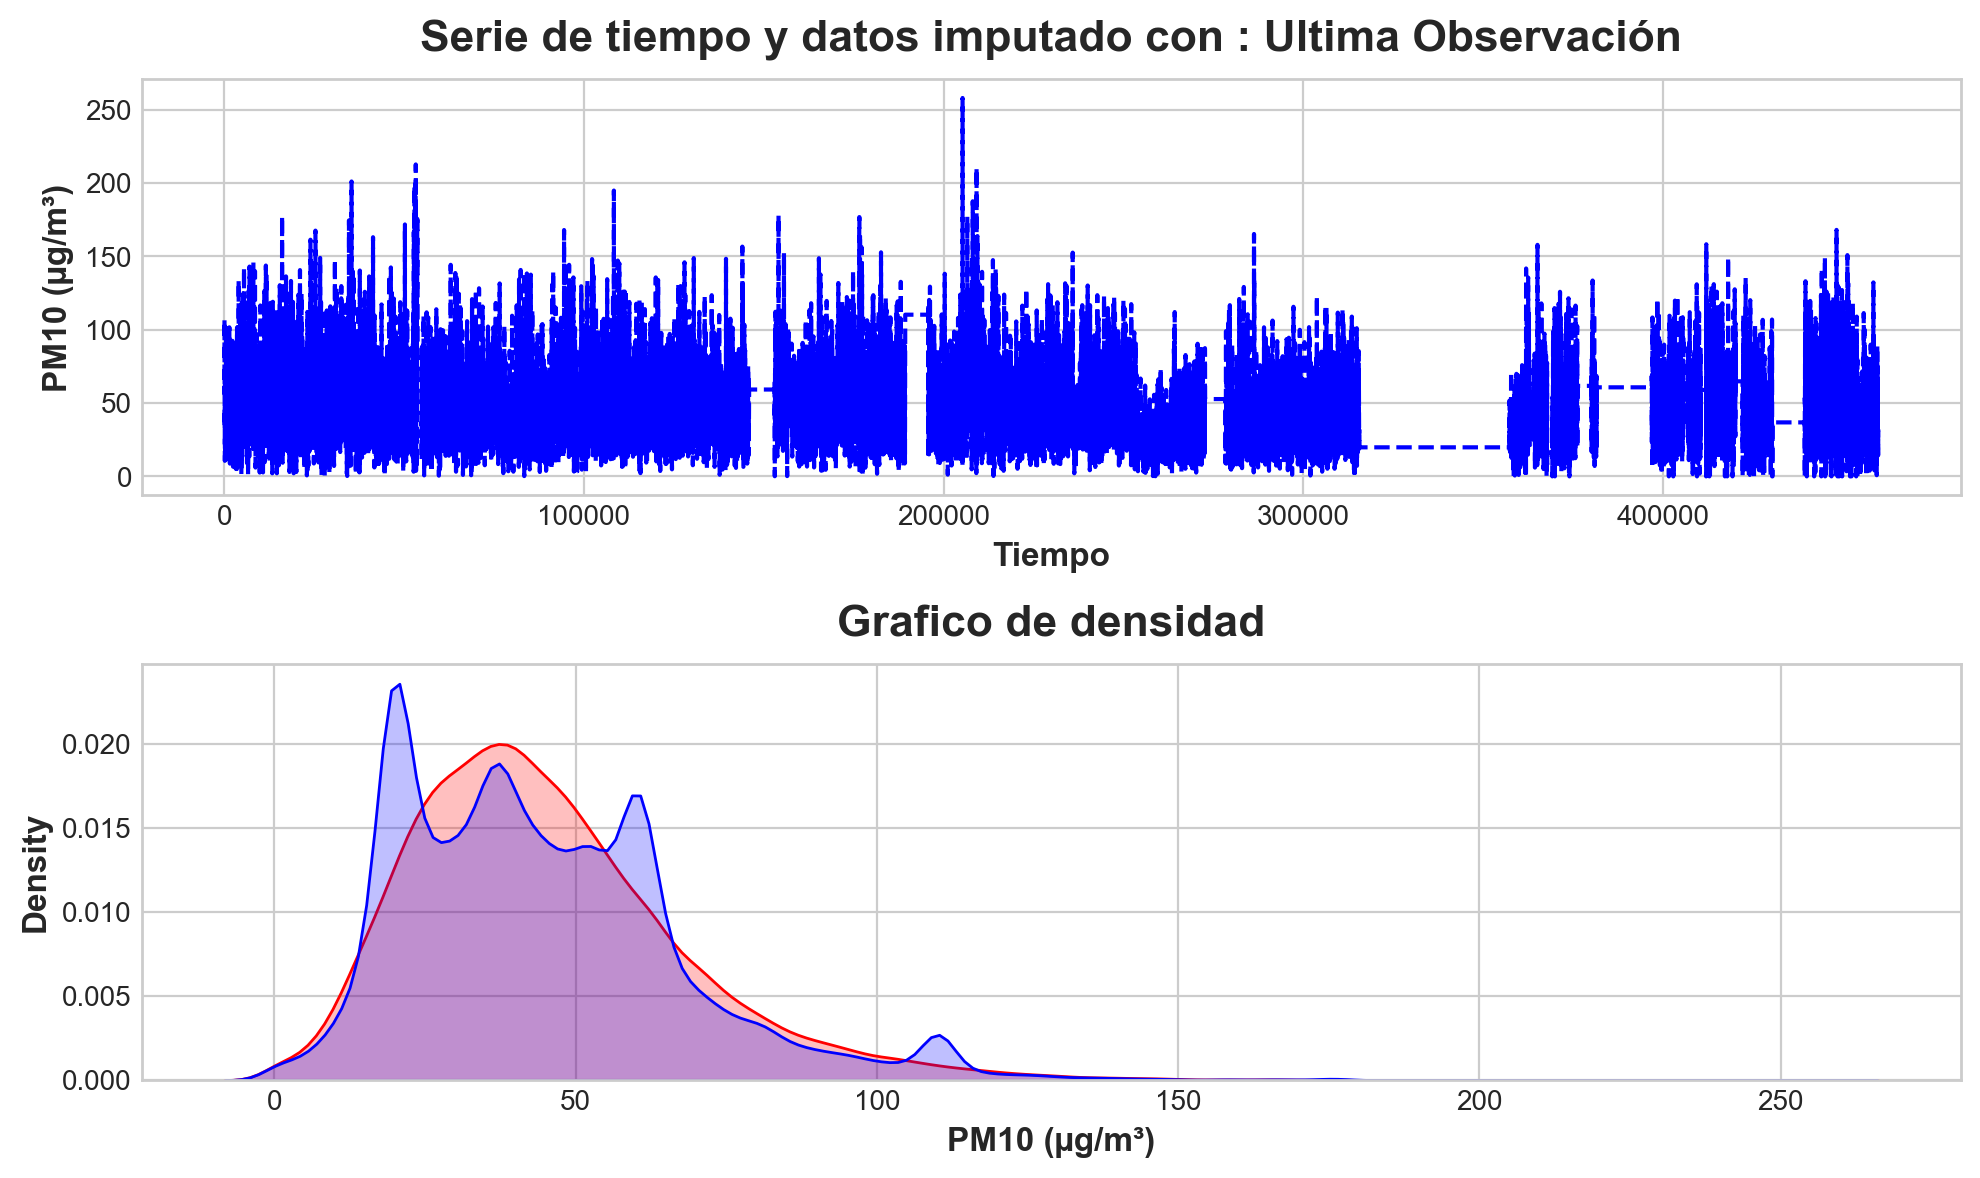

In [26]:
ermita['pm10_LOCF'] = ermita['pm10'].fillna(method='ffill')
plot_impute('pm10_LOCF', "Ultima Observación")

Se logra ver en el grafico de la serie de tiempo los datos imputados como un valor constante para los periodos de tiempo donde habian gran cantidad de datos faltantes, alrededor del 2020-2021. El grafico de densidad muestra que la distribución para el *pm10* se ha visto altatamente afectada por la imputación realizada, por lo que este metodo no es adecuado para tratar los datos faltantes. 

#### Imputación interpolación lineal

Este método estima los valores faltantes mediante una línea recta que une los dos valores observados más cercanos al dato faltante

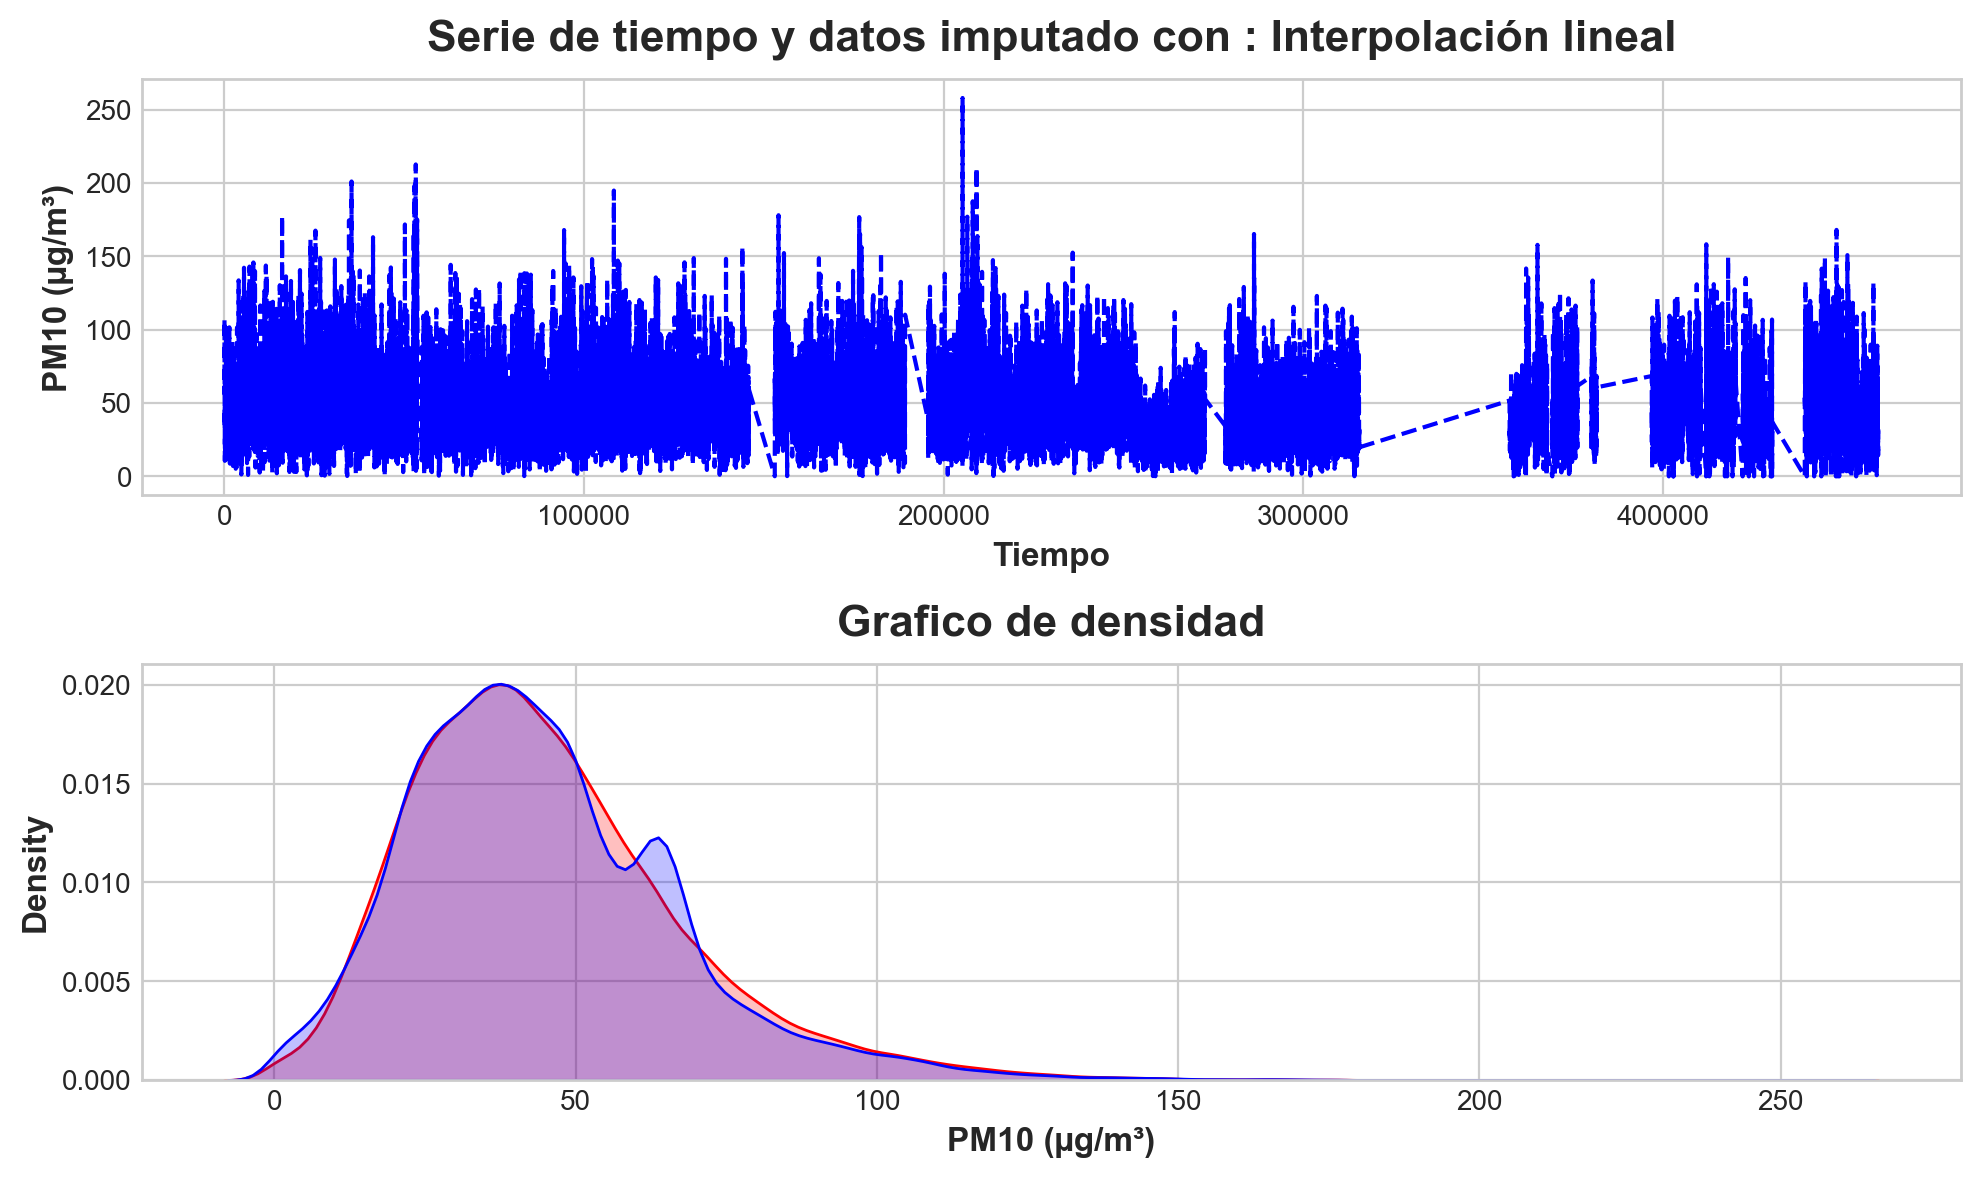

In [27]:
# Linear Interpolation
ermita['pm10_linear_interpolation'] = ermita['pm10'].interpolate(method='linear')
plot_impute('pm10_linear_interpolation', "Interpolación lineal")

Se logra ver en el grafico de la serie de tiempo los datos imputados como segemntos lineales  para los periodos de tiempo donde habian gran cantidad de datos faltantes. El grafico de densidad muestra que la distribución para el *pm10* es aproximadamente similar a la distribución original del *pm10*, ya que hay una gran concentración de los datos hacia valores inferiores de 50 µg/m3, pero se forma una nueva concentración de datos alrededor de los 60-70 µg/m3, que no hace parte de la distribución real, que puede afectar el ajuste de los modelo. 

In [28]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(ermita["pm10"].dropna(), ermita["pm10_linear_interpolation"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=1010738433.0000, p-value=0.0054


#### Inputación con medias moviles

Este método reemplaza los valores faltantes por el promedio de los valores observados en una ventana móvil alrededor del dato faltante. Para este caso se utiliza una ventana de 24.

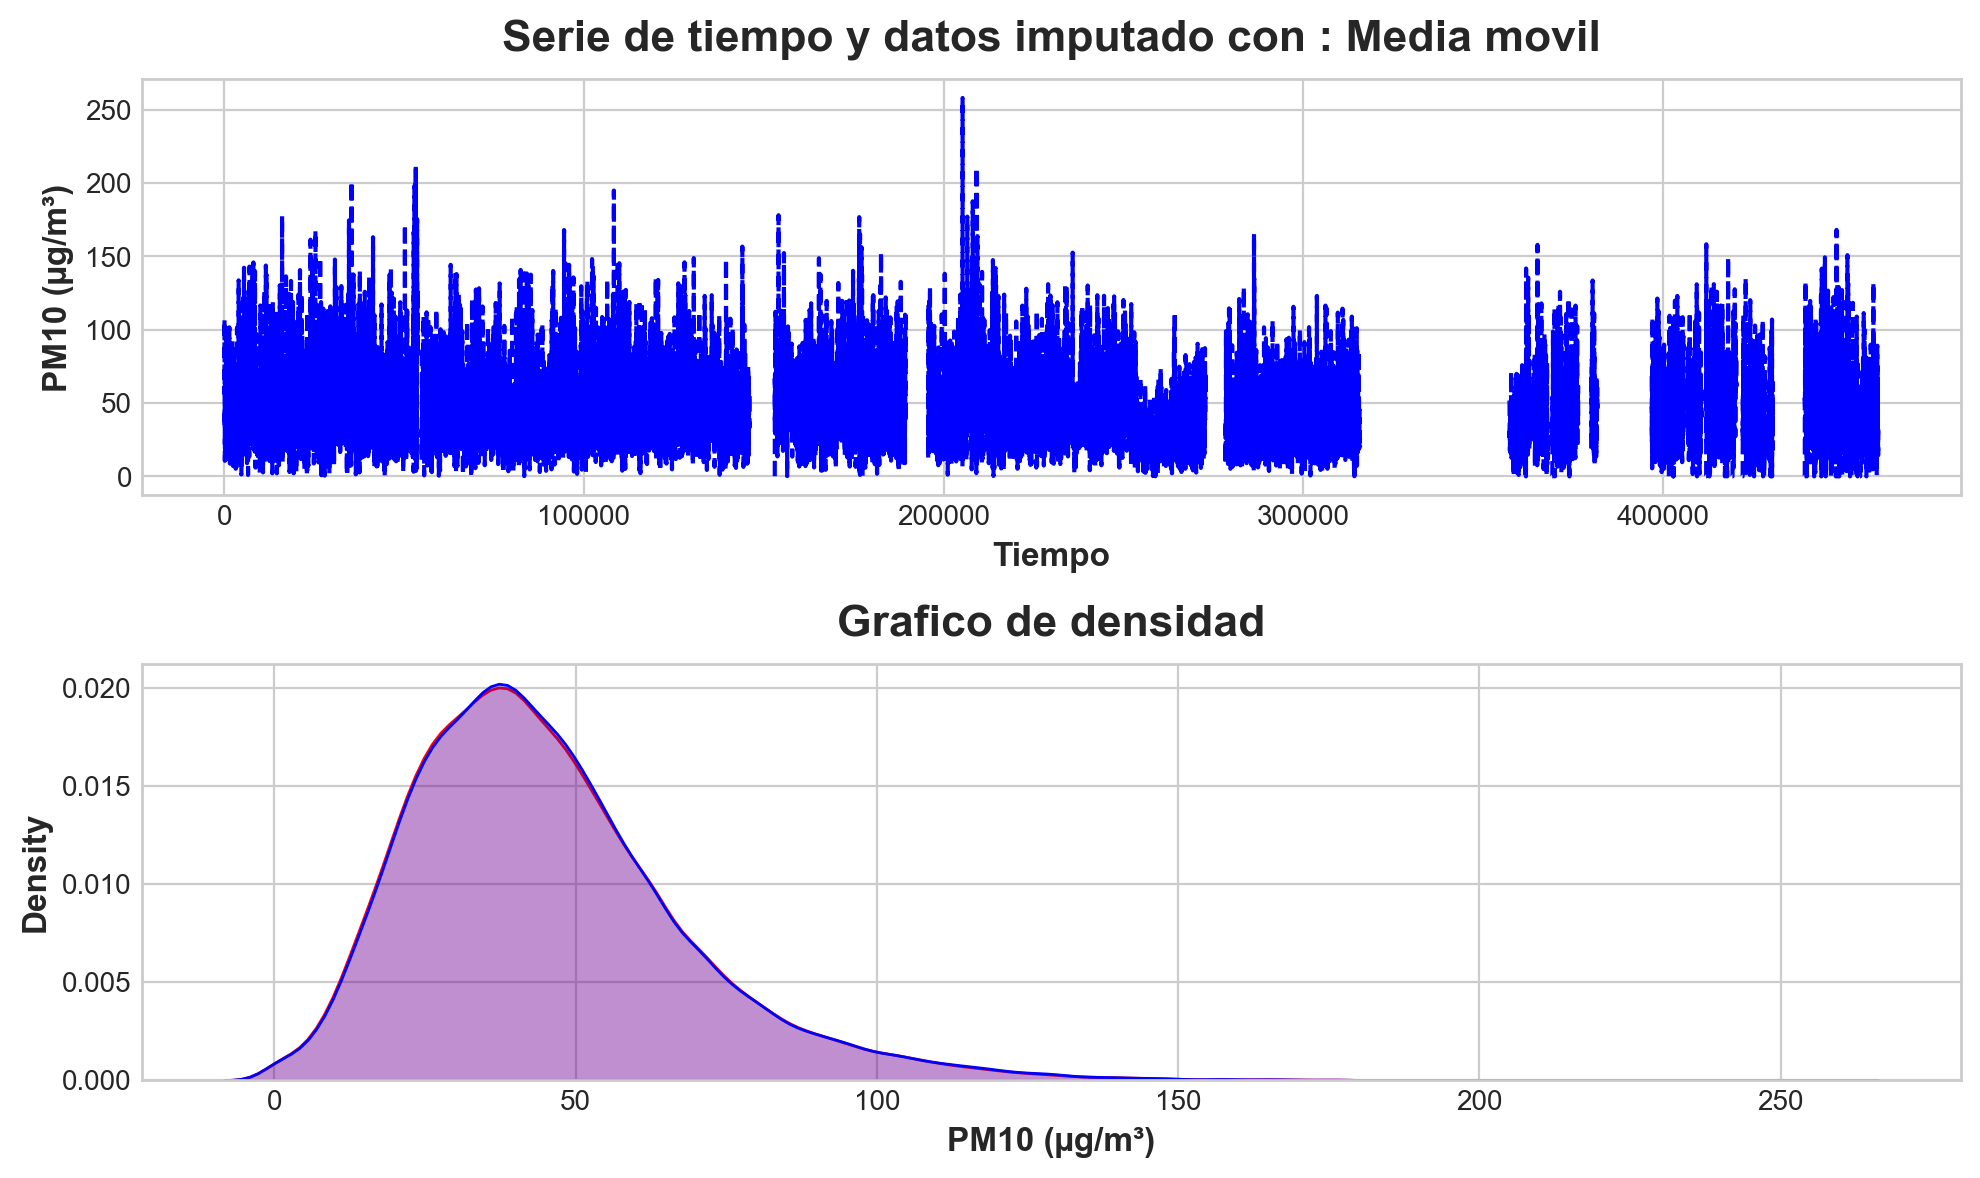

In [29]:
ermita['pm10_moving_average']=ermita.loc[:, ['pm10']].assign(RollingMean=ermita['pm10'].fillna(ermita['pm10'].rolling(24,min_periods=1,).mean()))['RollingMean']
plot_impute('pm10_moving_average', "Media movil")

In [30]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(ermita["pm10"].dropna(), ermita["pm10_moving_average"].dropna())
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=786304511.5000, p-value=0.3578


Se logra ver en el grafico de la serie de tiempo que la imputación por media movil no fue efectiva en el periodo comprendido entre finales del 2020 y mediados del 2021, ya que que no hay datos que promediar en esa ventana de tiempo. Esto genera la ilusión de que la distribución resultante tiene un buen ajuste a la distribución de *pm10*, pero en realidad aún hay una gran presencia de datos faltantes en la variable, por lo que este método no es efectivo.

#### Imputación con Kalman

Este método utiliza un modelo de estado espacial para estimar los valores faltantes de manera dinámica

In [31]:
# prepare input values for R 
this_value = np.ndarray.tolist(ermita['pm10'].values)
this_value = robjects.FloatVector(this_value)

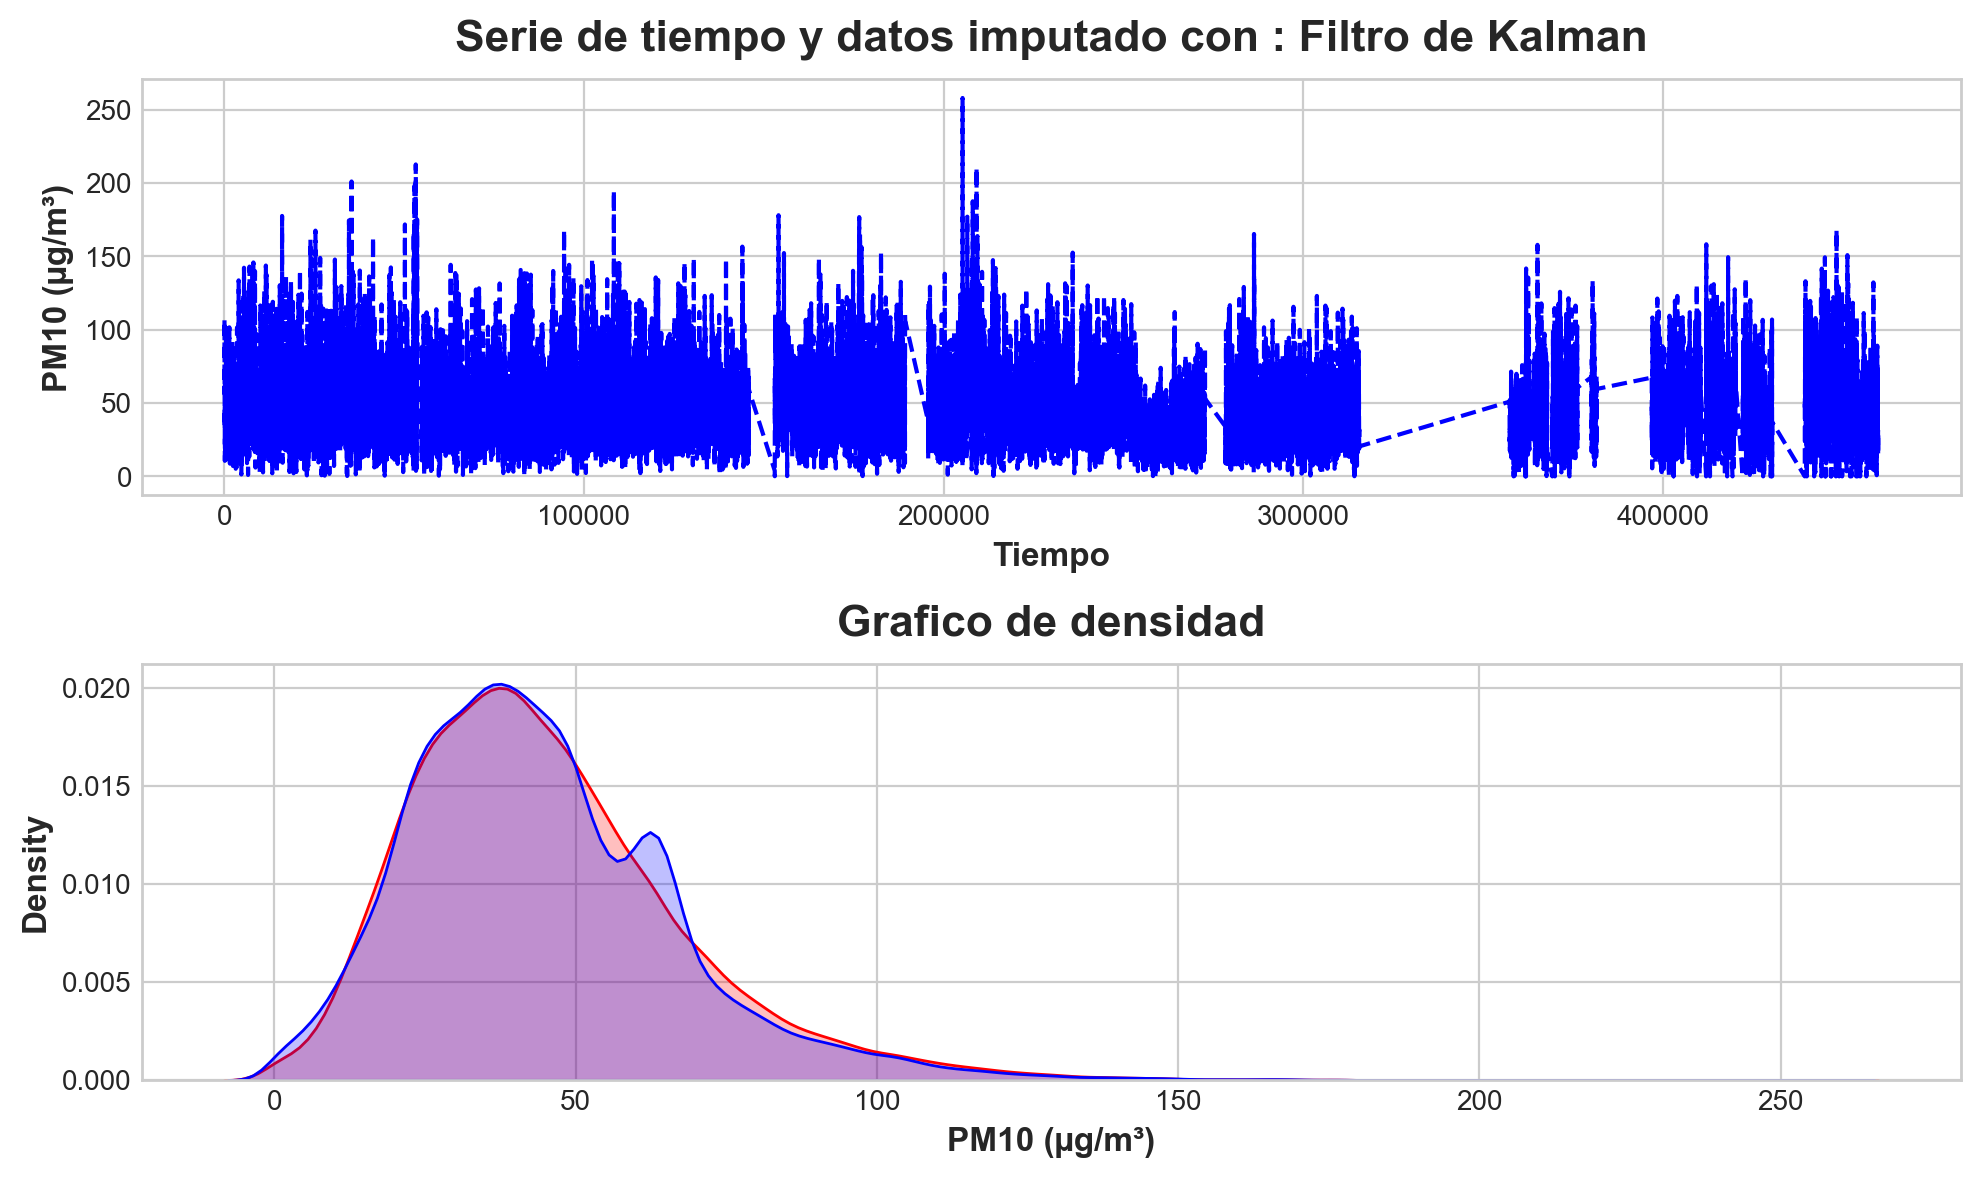

In [32]:
ermita['pm10_kalman'] = kalman_StructTs(this_value, model = "StructTS")
plot_impute('pm10_kalman', "Filtro de Kalman")

In [33]:
stat, p_value = mannwhitneyu(ermita["pm10"].dropna(), ermita["pm10_kalman"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=1011543580.0000, p-value=0.0028


Los resultados obtenidos al implementar la imputación con el filtro de Kalman su similares a los de la interpolación lineal, donde se logra ver en el grafico de la serie de tiempo los datos imputados como segemntos lineales  para los periodos de tiempo donde habian gran cantidad de datos faltantes. El grafico de densidad muestra que la distribución para el *pm10* es aproximadamente similar a la distribución original del *pm10*, ya que hay una gran concentración de los datos hacia valores inferiores de 50 µg/m3, pero se forma una nueva concentración de datos alrededor de los 60-70 µg/m3, que no hace parte de la distribución real, que puede afectar el ajuste de los modelo.

#### Imputación con Kalman-ARIMA

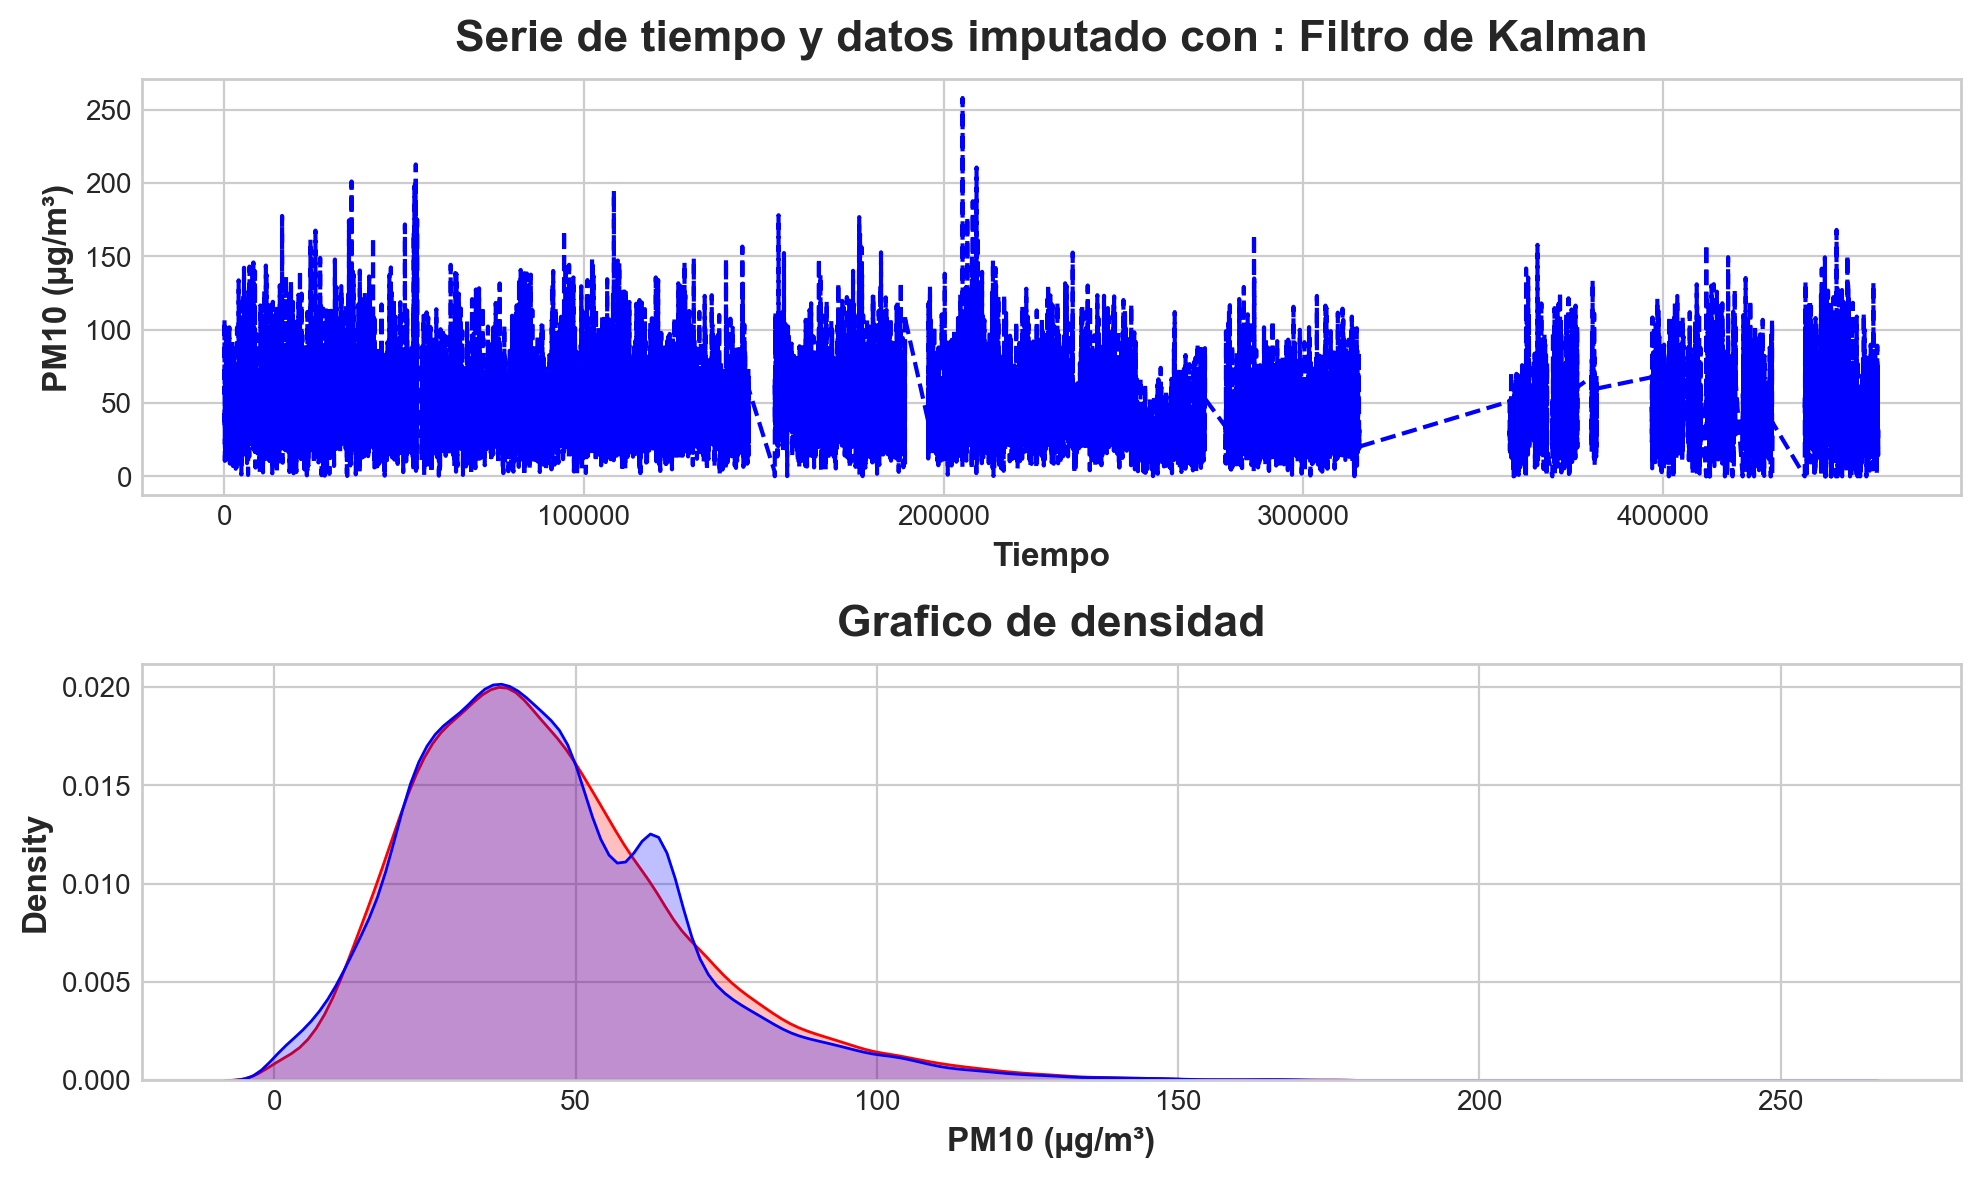

In [308]:
ermita['pm10_arima']  = kalman_StructTs(this_value, model = "auto.arima")
plot_impute('pm10_arima', "Filtro de Kalman")

In [241]:
stat, p_value = mannwhitneyu(ermita["pm10"].dropna(), ermita["pm10_arima"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=1011273873.0000, p-value=0.0035


Los resultados obtenidos al implementar la imputación con ARIMA su similares a los de la interpolación lineal, donde se logra ver en el grafico de la serie de tiempo los datos imputados como segemntos lineales  para los periodos de tiempo donde habian gran cantidad de datos faltantes. El grafico de densidad muestra que la distribución para el *pm10* es aproximadamente similar a la distribución original del *pm10*, ya que hay una gran concentración de los datos hacia valores inferiores de 50 µg/m3, pero se forma una nueva concentración de datos alrededor de los 60-70 µg/m3, que no hace parte de la distribución real, que puede afectar el ajuste de los modelo.

In [36]:
# ermita.to_csv("datos_imputados.csv")
# test_data.to_csv("test_data.csv")

Aunque los resultados de la imputación de datos faltantes no arrojaron una distribución indistinguible de la original para el *pm10*, para propositos de este trabajo se tomará la serie de tiempo que resulta al utilizar ARIMA para la imputación de datos.

### Descomposición

In [37]:
# ermita_month = ermita.groupby(["Year", "Mes"])["pm10_arima"].mean().reset_index()

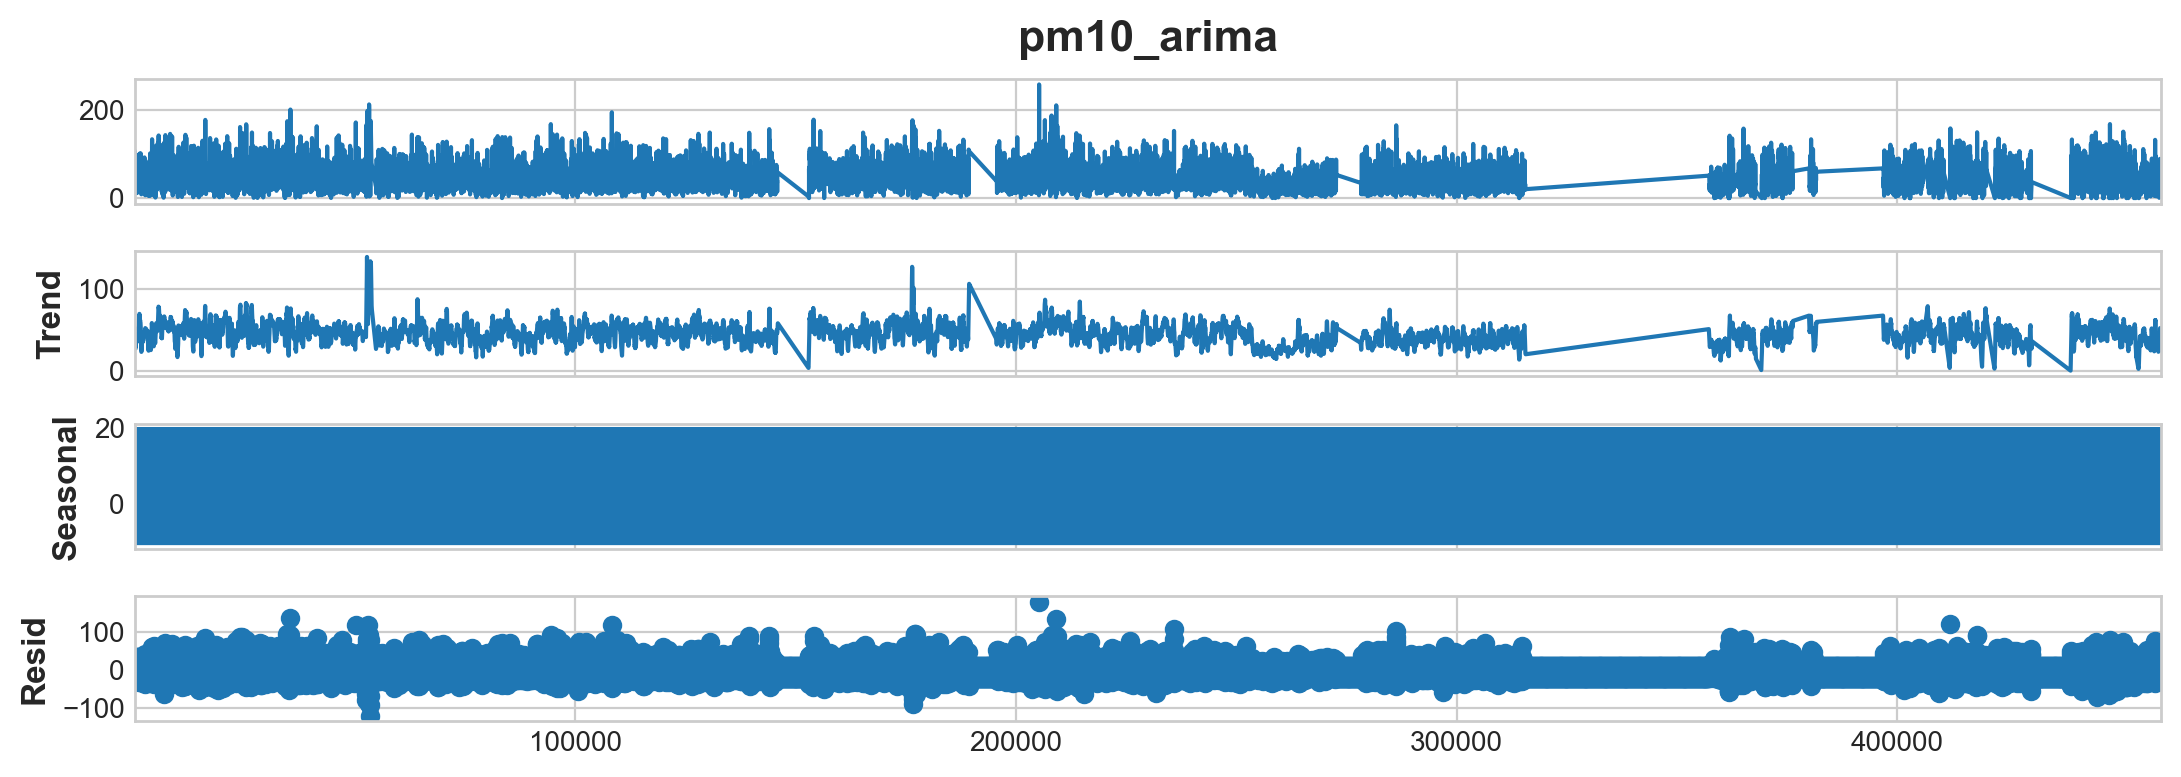

In [38]:
import statsmodels.api as sm
#Time series decomposition 
# rcParams['figure.figsize'] = 11, 15  # resizing the image to be big enough for us 


decomposition = sm.tsa.seasonal_decompose(ermita.pm10_arima, period=24)
fig = decomposition.plot()
plt.show()

### Procesos estacionarios

Para poder ajustar algunos modelos a la serie de tiempo, se requiere que la serie sea estacionaria. A simple vista, no se logra apreciar si la serie es estacionaria, para confirmarlo se hará uso del test de Dicky Fuller.

In [39]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(ermita.pm10_arima)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.315794
p-value: 0.000000


La prueba de Dickey-Fuller tiene como hipotesis nula:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>H</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>0</mn>
    </mrow>
  </msub>
  <mo>:</mo>
  <mtext>la serie de tiempo es no estacionaria</mtext>
  <mo>.</mo>
</math>

Tomando un nivel de significancia de 0.05, al compararlo con el p-valor obtenido en la prueba (~0), se rechaza la hipotesis nula, por lo que no se tiene suficiente evuidencia estadistica para afirmar que la serie no es estacionaria.

### Autocorrelación

Ahora se realiza un analisis de autocorrelación para la serie de tiempo del *pm10*. 

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

def plotds(xt, nlag=30, fig_size=(12, 10)):
    
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    
    return None

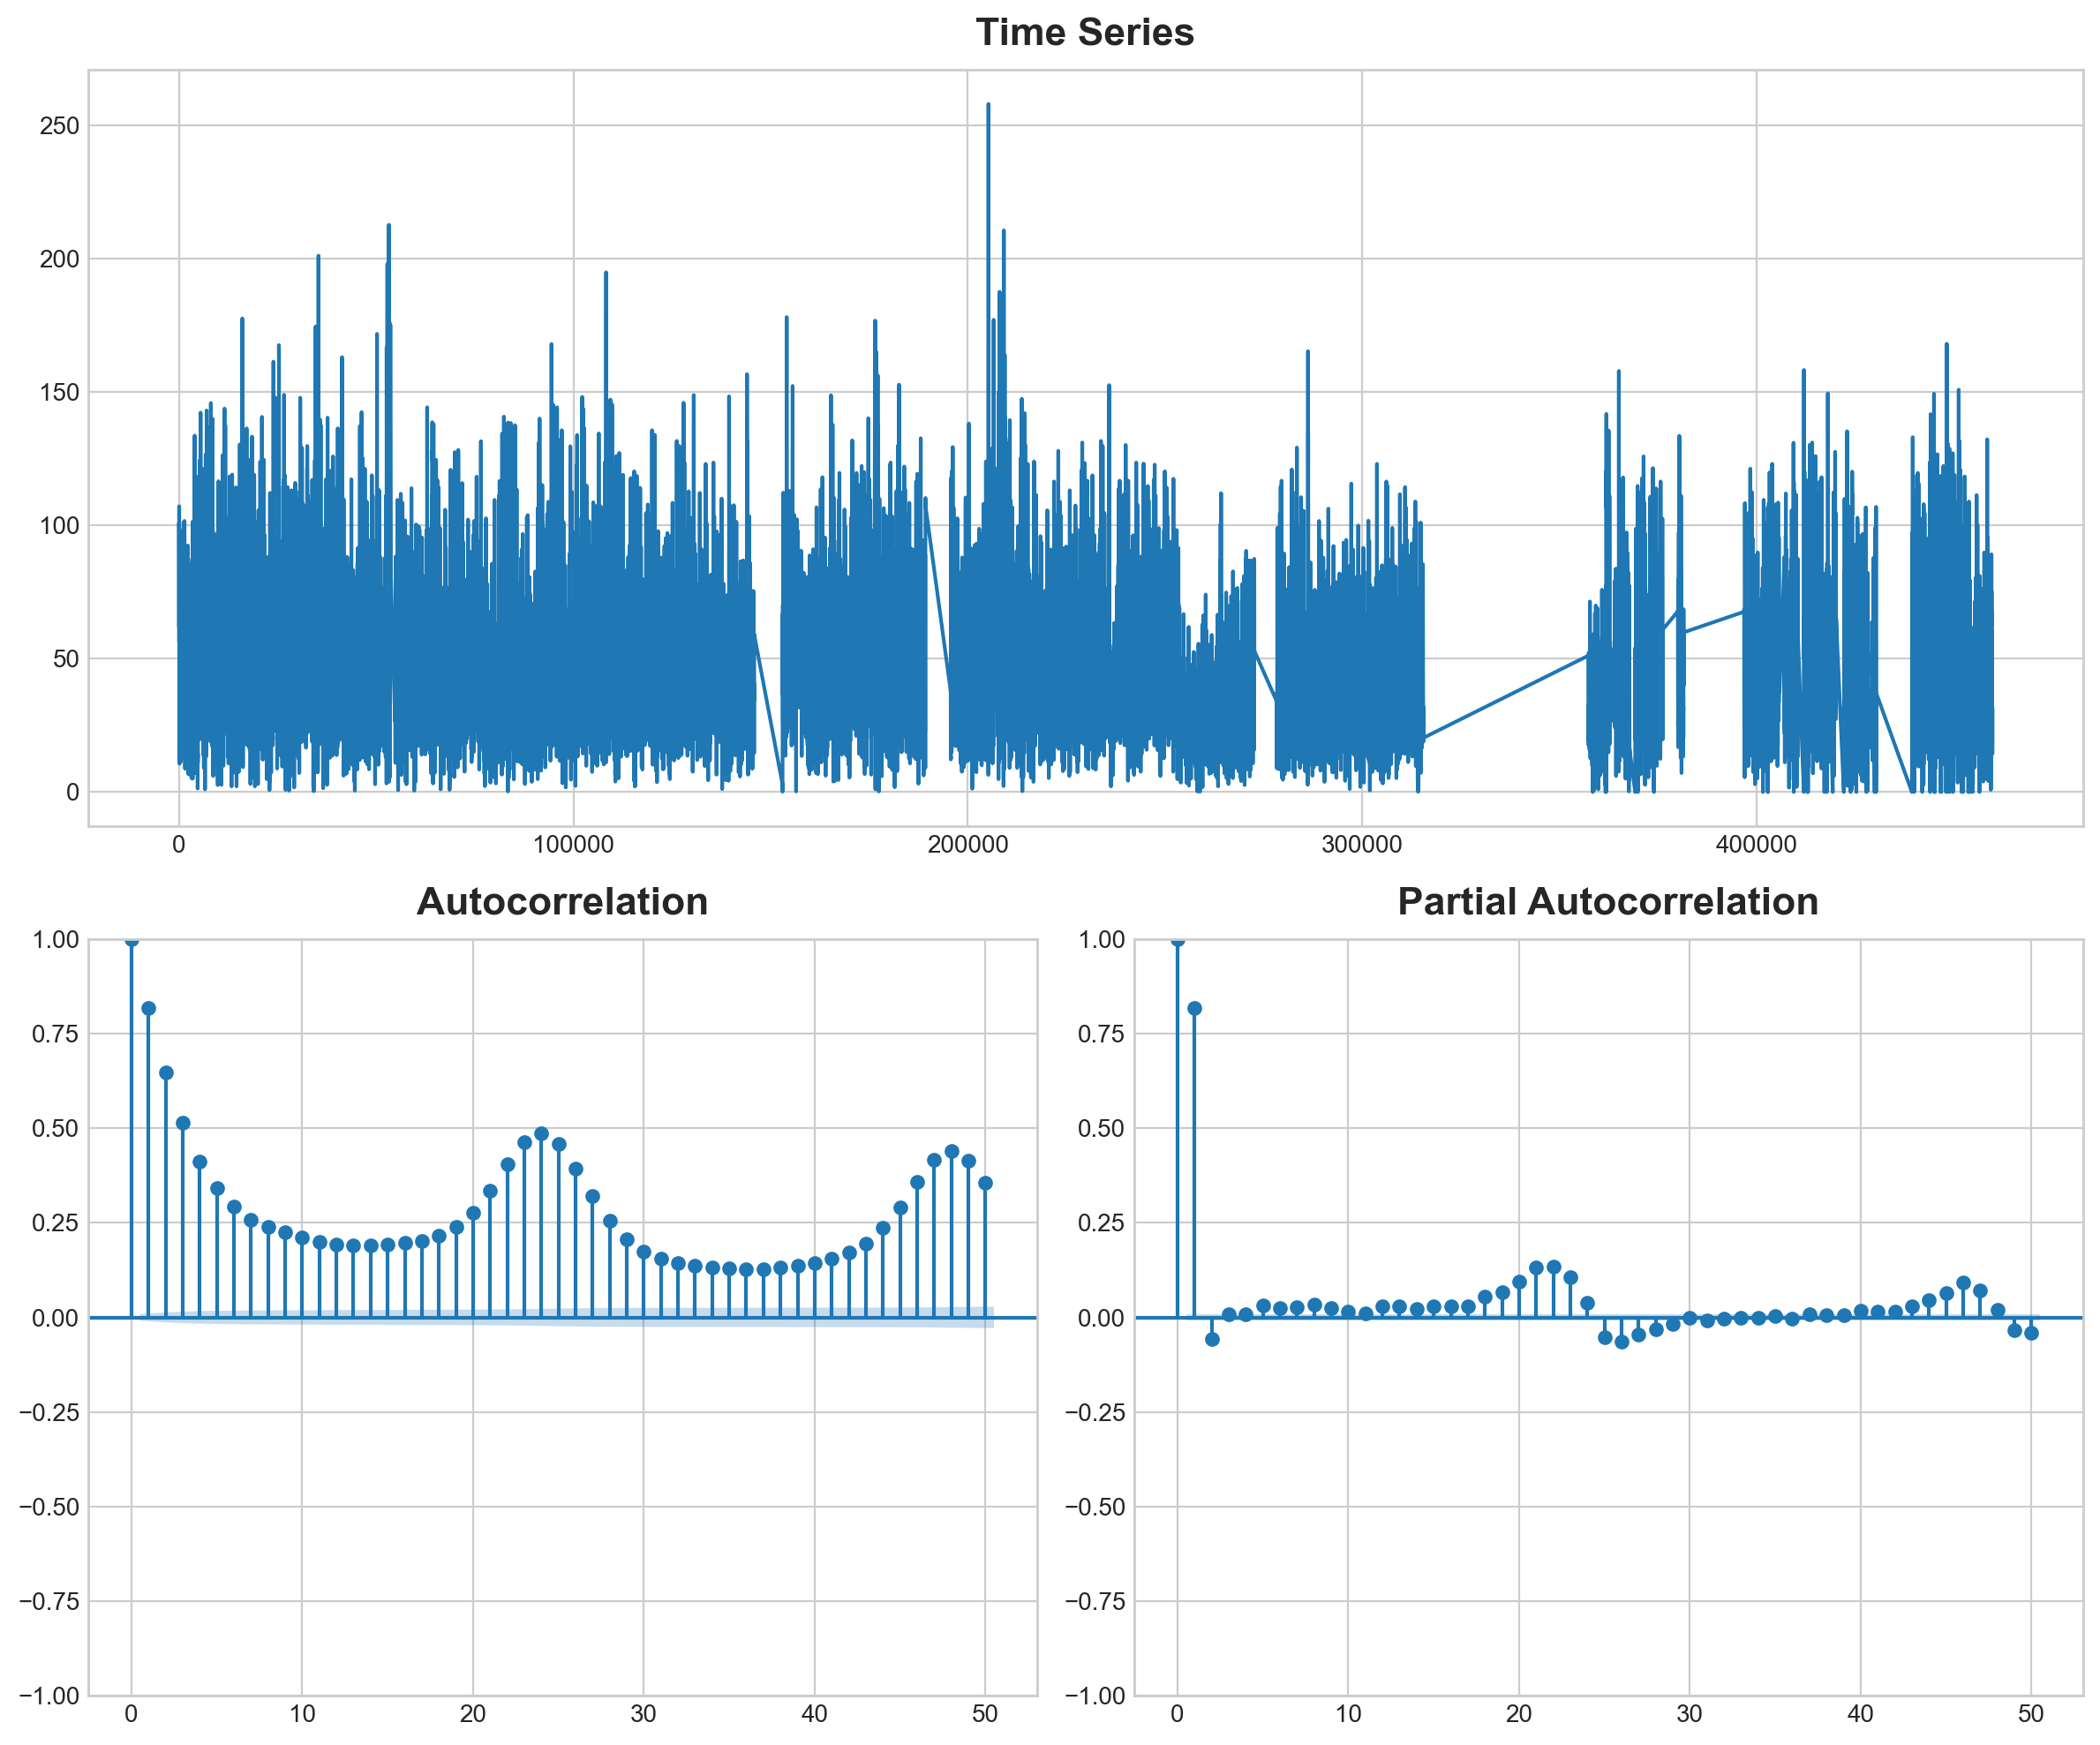

In [41]:
# grafico de autocorrelacion
plotds(ermita.pm10_arima)


Al observar el grafico para la autocorrelación, es clara la presencia de un patrón que se repite cada 24 retardos, siendo la autocorrelación significativa para todos los retardos, ya que se encuentran por fuera de los intervalos de confianza. 

A pesar que la seria se puede considerar estacionaria, dado los resultadas del prueba de Dickey-Fuller, la autocorrelación de los retardos puede ser causada por el componente estacional de la serie de tiempo. Esto indica que se debe realizar una diferenciación estacional a la serie para obtener una seria completamente estacionaria. 

In [42]:
from statsmodels.tsa import stattools
from pandas.plotting import autocorrelation_plot
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(ermita.pm10_arima,
                                                                 nlags=24,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [43]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 0.0
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17 for p-val = 0.0
Nu

In [44]:
seasonal_diff = ermita.pm10_arima.diff(24)
seasonal_diff  = seasonal_diff[24:]

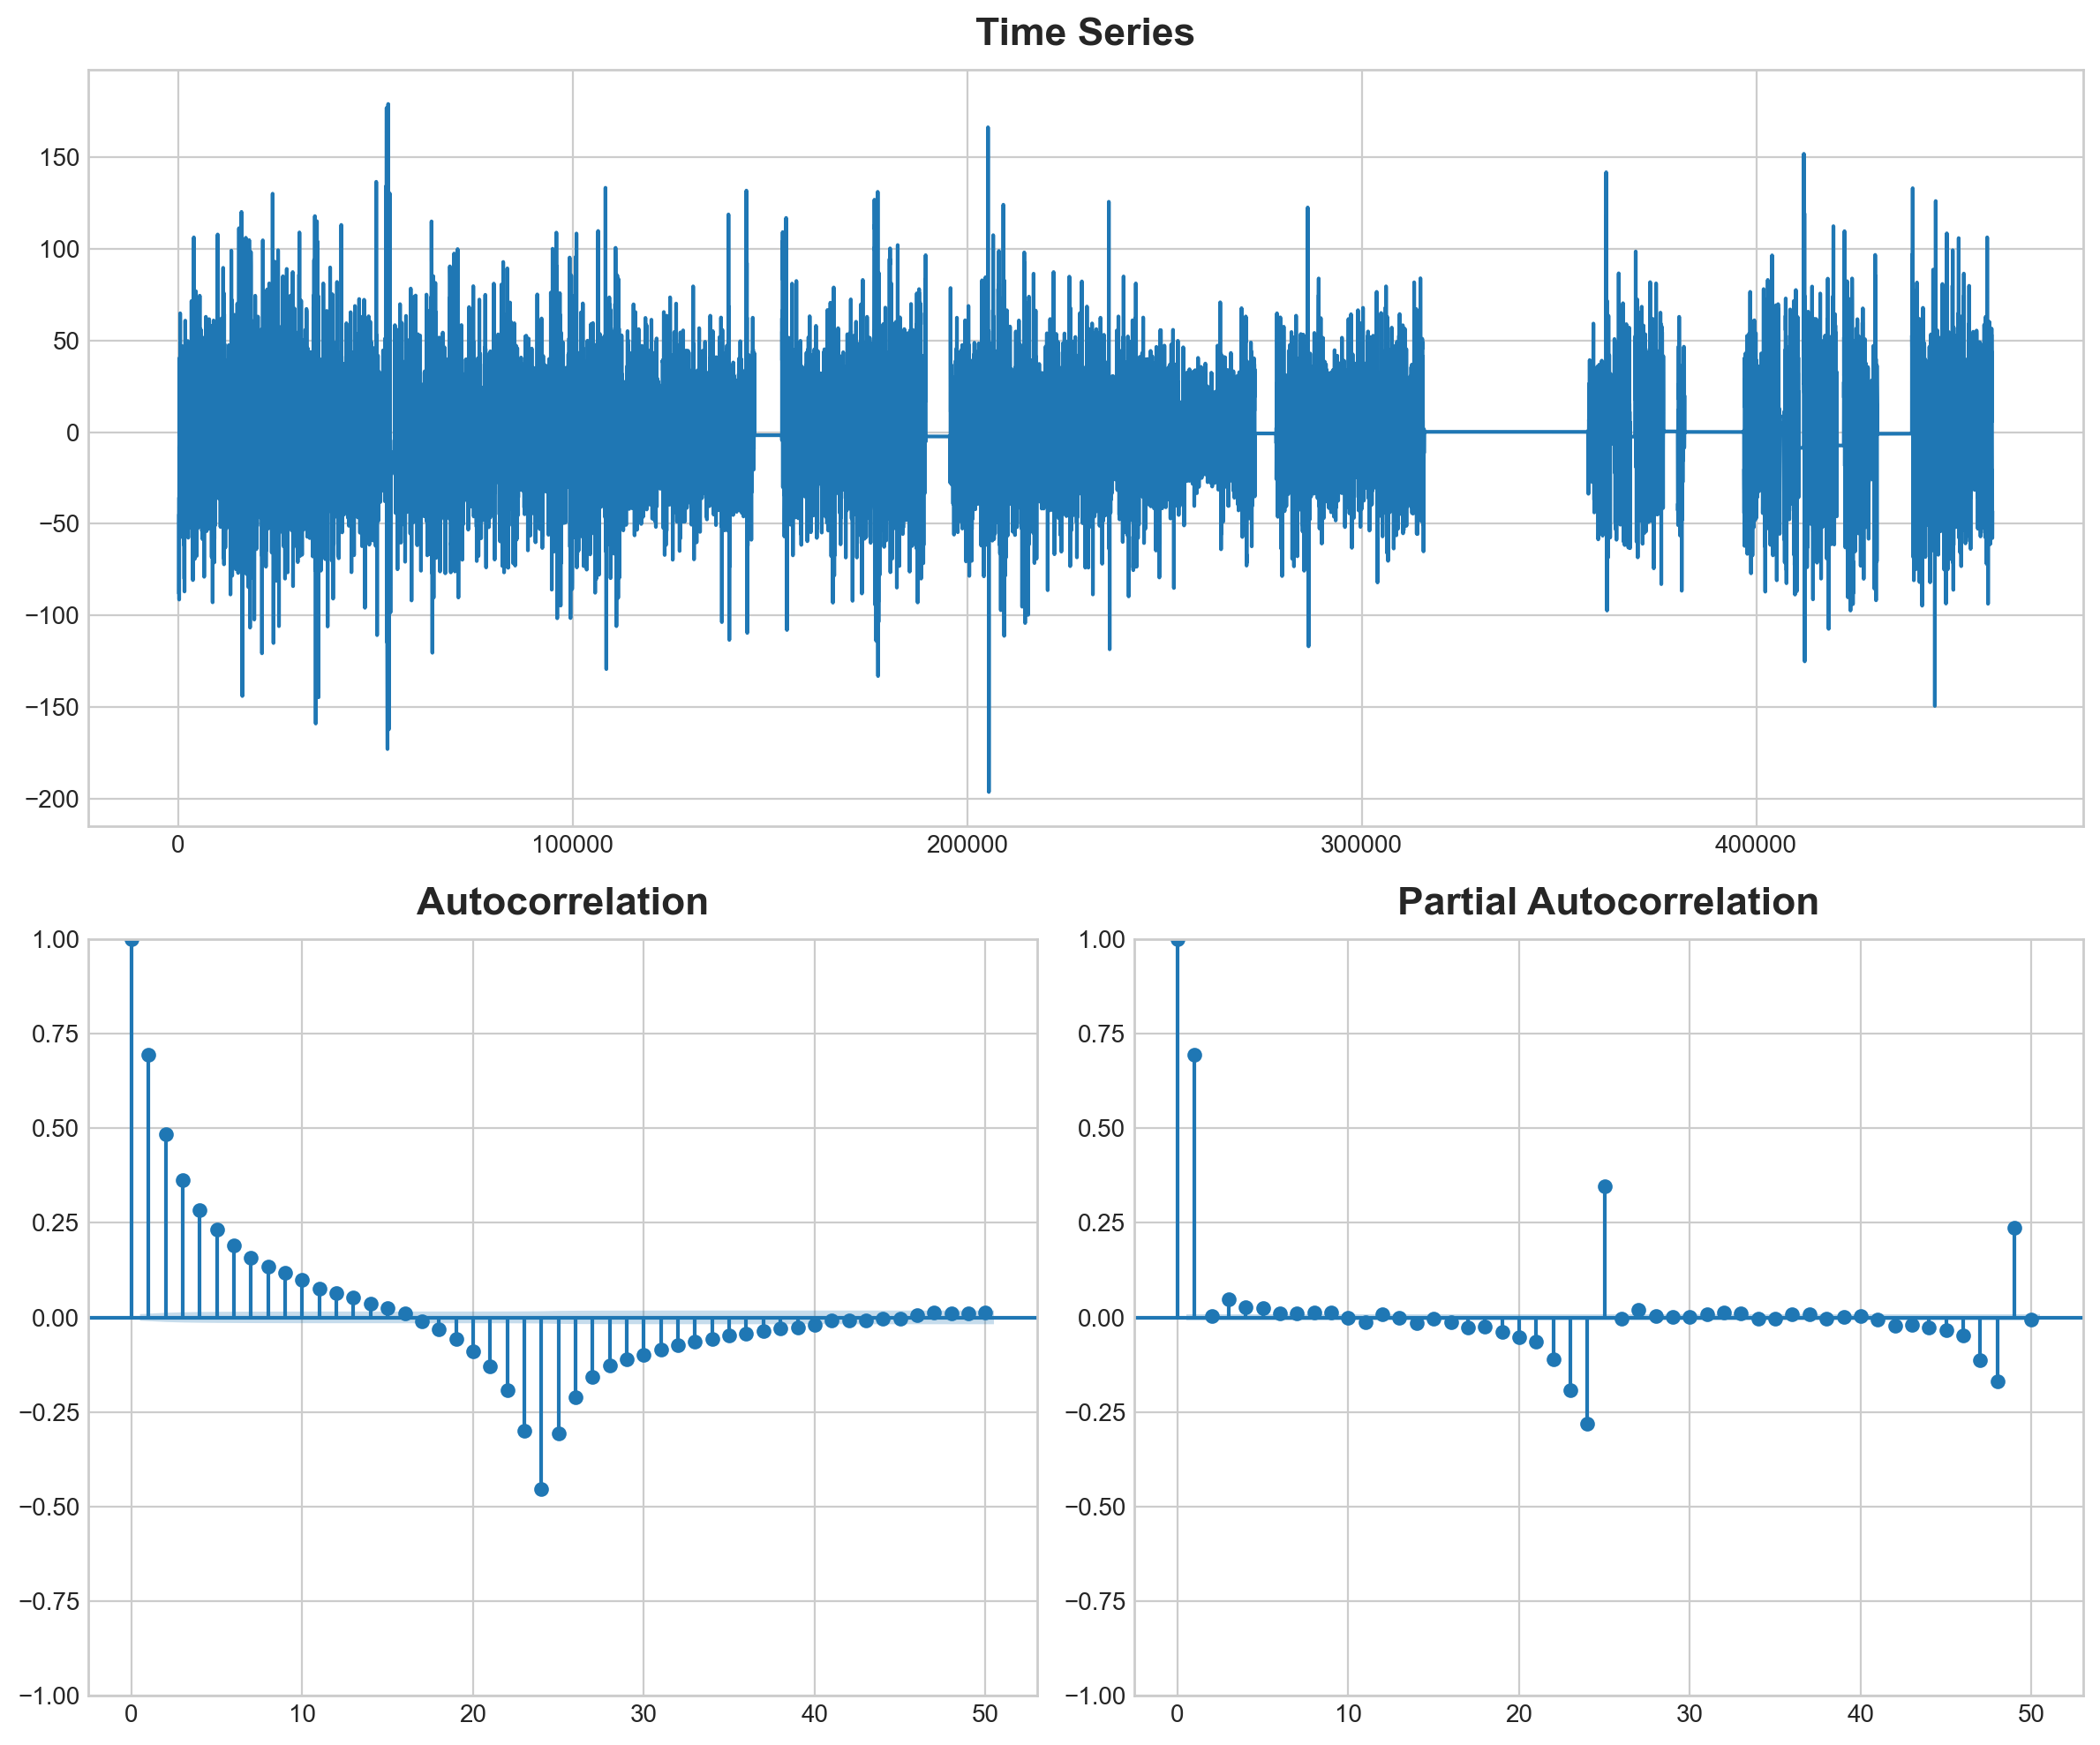

In [45]:
plotds(seasonal_diff)

In [46]:
acf_first_diff, confint_first_diff,\
qstat_first_diff, pvalues_first_diff = stattools.acf(seasonal_diff.iloc[1:],
                                                     nlags=24,
                                                     qstat=True,
                                                     alpha=0.05)

In [47]:
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 0.0
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17 for p-val = 0.0
Nu

## Entrenamiento de los modelos

In [48]:
def forecast_accuracy(forecast, actual, str_name):
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    mse = np.mean((forecast - actual)**2)                    # MSE
    
    df_acc = pd.DataFrame({'MAE': [mae],
                           'MSE': [mse],
                           'MAPE': [mape],
                           'RMSE': [rmse]},
                          index=[str_name])
    
    return df_acc

### Suavizamiento exponencial simple

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import itertools
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

def ses_optimizer(train, alphas, step):

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test_data.pm10, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

    return best_alpha, best_mae

In [70]:
alphas = np.arange(0.8, 1, 0.01)
tau_test=24
best_alpha, best_mae = ses_optimizer(ermita.pm10_arima, alphas, step=tau_test )
final_model = SimpleExpSmoothing(ermita.pm10_arima).fit(smoothing_level=best_alpha, optimized=False)
y_pred = final_model.forecast(tau_test)
mae = mean_absolute_error(test_data.pm10, y_pred)

c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\sta

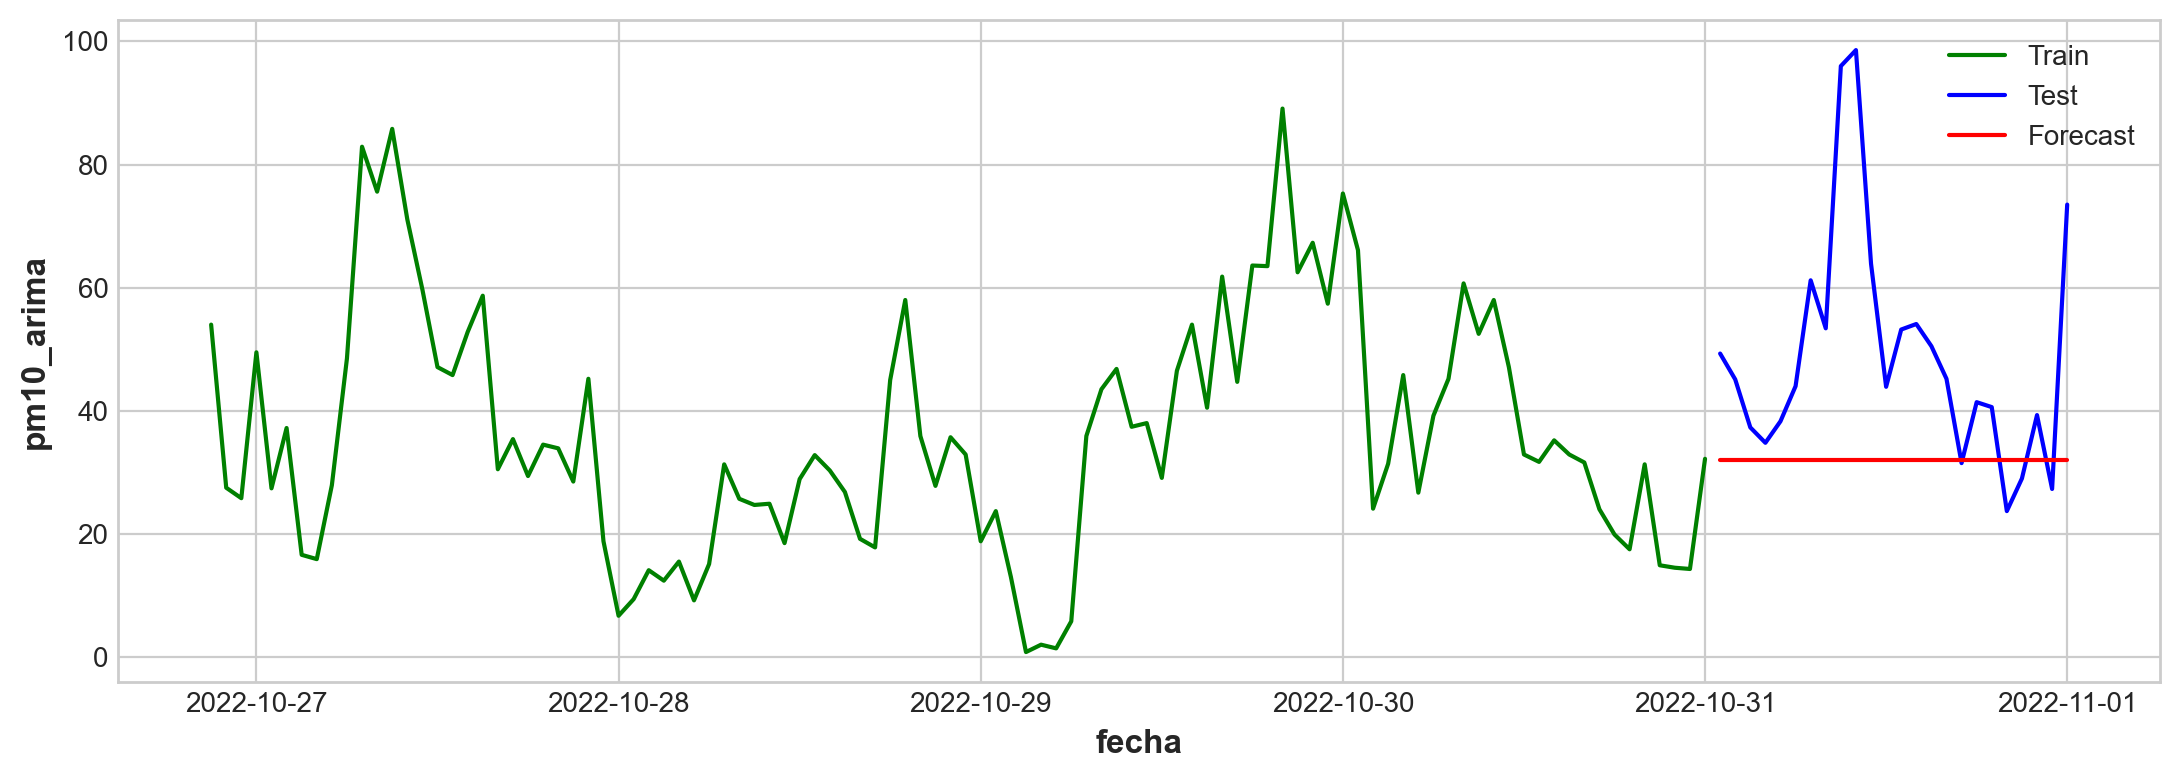

In [71]:
ax = sns.lineplot(x=ermita.fecha[-100:], y=ermita.pm10_arima[-100:], label="Train", color='g')
sns.lineplot(x=test_data.fecha, y=test_data.pm10, label="Test", color='b')
sns.lineplot(x=test_data.fecha, y=np.array(y_pred), label="Forecast", color='r')
plt.show()

In [73]:
test_24dl = test_data.pm10.tolist()
ses_metrics=forecast_accuracy(np.array(test_24dl), np.array(y_pred), "24 days")
ses_metrics

MAE         MSE      MAPE       RMSE
24 days  18.323486  631.967736  0.572233  25.138968

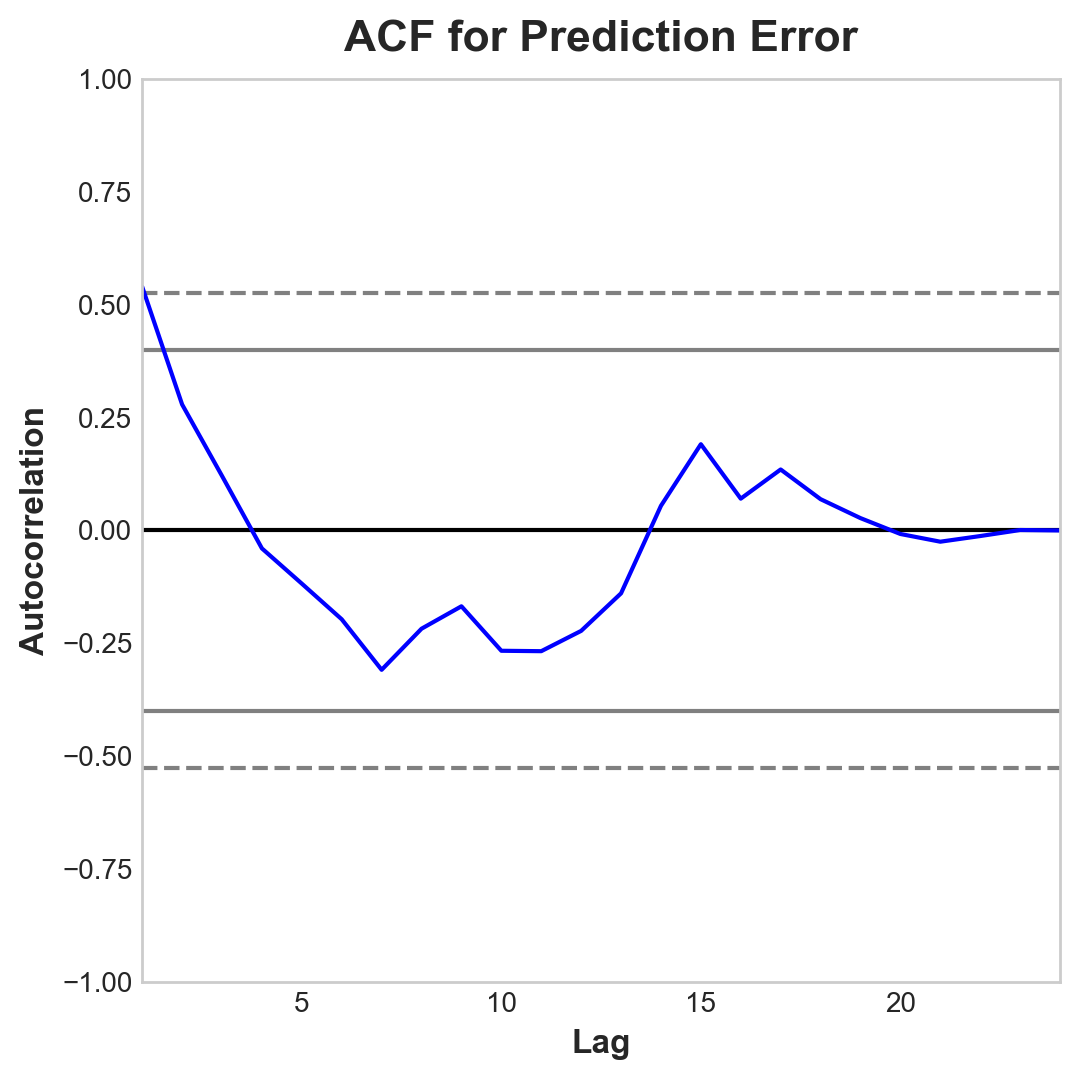

In [74]:
pred_error = np.array(test_24dl) - np.array(y_pred)
fig = plt.figure(figsize=(5.5, 5.5))
autocorrelation_plot(pred_error, color='b')
plt.title('ACF for Prediction Error');

### Suavizamiento exponencial triple

In [75]:
import numpy as np
import itertools
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ... (rest of the code for importing data and preparing test set)

best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
alphas = betas = gammas = np.arange(0.10, 1, 0.10)
abg = list(itertools.product(alphas, betas, gammas))

for comb in abg:
    try:
        tes_model = ExponentialSmoothing(ermita.pm10_arima, trend="add", seasonal="add", seasonal_periods=24).\
                    fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(tau_test)
        mae = mean_absolute_error(test_data.pm10, y_pred)

        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        else:
            print(f"Error encountered with combination: {comb}")
    except Exception as e:
        # Manejo de errores genérico (opcional)
        print(f"Error encountered with combination: {comb}. Exception: {e}")

# ... (rest of the code for printing best parameters and evaluating model)


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Error encountered with combination: (0.1, 0.1, 0.2)


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Error encountered with combination: (0.1, 0.1, 0.30000000000000004)


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Error encountered with combination: (0.1, 0.1, 0.4)


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Error encountered with combination: (0.1, 0.1, 0.5)


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Error encountered with combination: (0.1, 0.1, 0.6)


c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [78]:
best_alpha, best_beta, best_gamma, best_mae

(0.1, 0.1, 0.1, 51.648097842992776)

In [79]:
best_alpha, best_beta, best_gamma, best_mae = (0.30000000000000004, 0.1, 0.6, 19.16077209125565)

In [82]:
tes_model_best = ExponentialSmoothing(ermita.pm10_arima, trend="add", seasonal="add", seasonal_periods=24).\
                    fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)
                    
y_pred_t = tes_model_best.forecast(tau_test)



c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


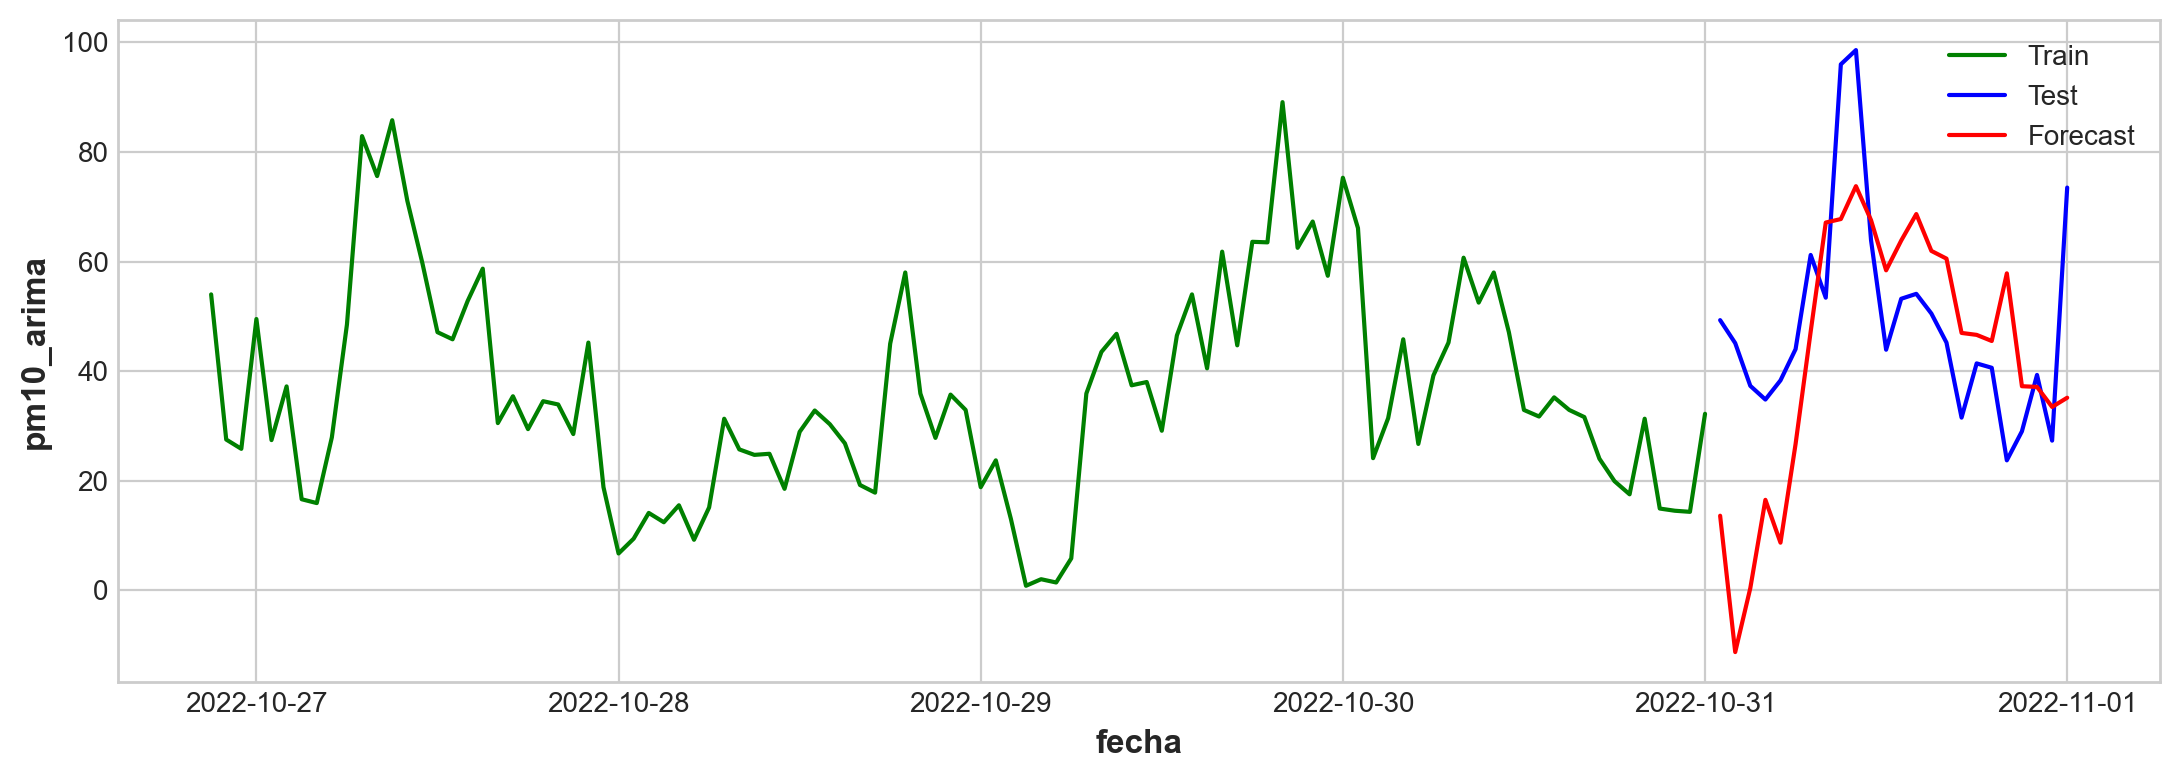

In [84]:
ax = sns.lineplot(x=ermita.fecha[-100:], y=ermita.pm10_arima[-100:], label="Train", color='g')
sns.lineplot(x=test_data.fecha, y=test_data.pm10, label="Test", color='b')
sns.lineplot(x=test_data.fecha, y=np.array(y_pred_t), label="Forecast", color='r')
plt.show()

In [85]:
test_24dl = test_data.pm10.tolist()
set_metrics=forecast_accuracy(np.array(test_24dl), np.array(y_pred_t), "24 days")
set_metrics

MAE         MSE      MAPE       RMSE
24 days  19.160772  545.197995  4.859309  23.349475

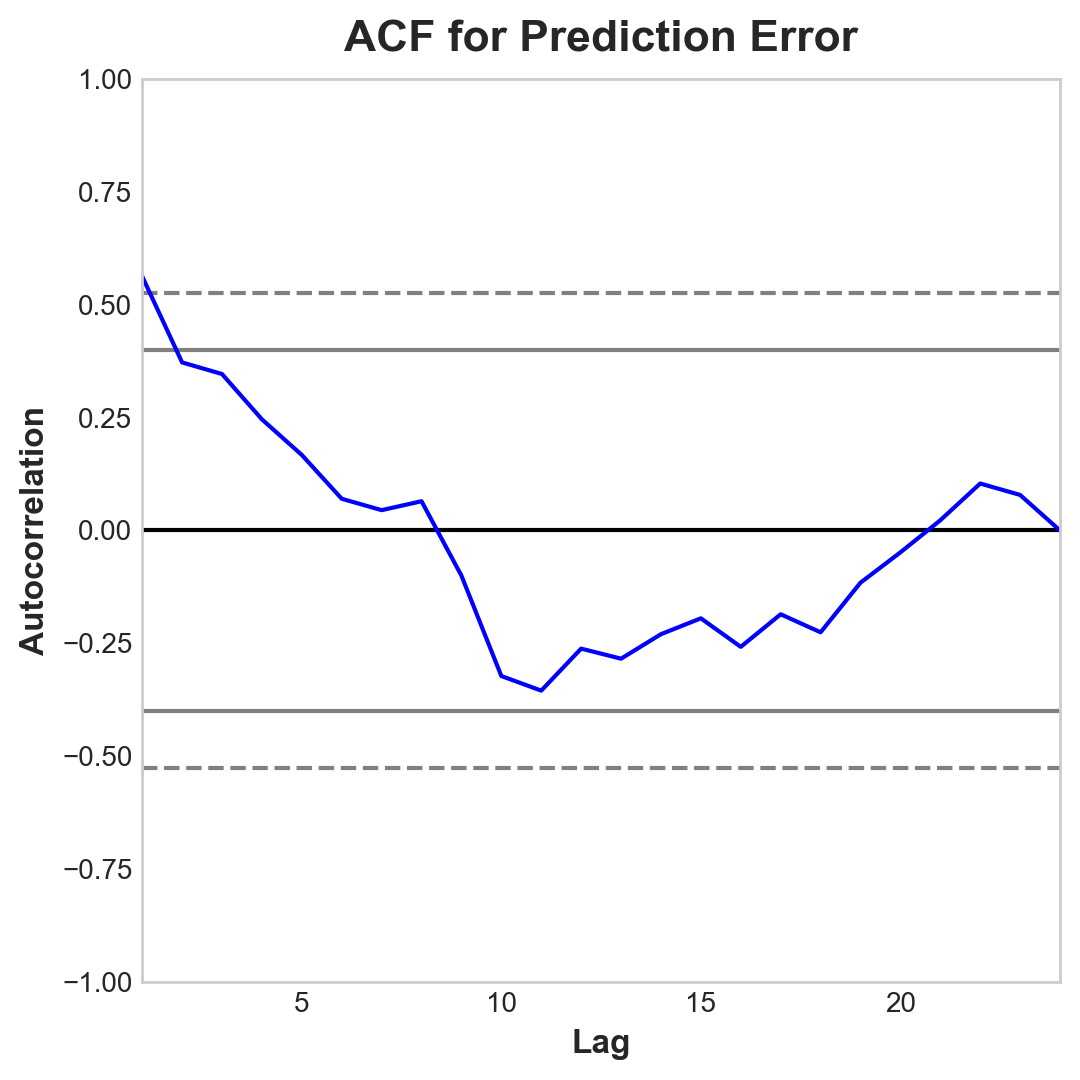

In [86]:
pred_error = np.array(test_24dl) - np.array(y_pred_t)
fig = plt.figure(figsize=(5.5, 5.5))
autocorrelation_plot(pred_error, color='b')
plt.title('ACF for Prediction Error');

### ARIMA

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [239]:
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = smtsa.ARIMA(ermita.pm10_arima.tolist(), order=(ari, d, maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

In [242]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'd', 'MA(q)', 'AIC'])
print('Best ARIMA parameters based on AIC:\n')
dfAIC[dfAIC.AIC == dfAIC.AIC.min()]

Best ARIMA parameters based on AIC:



AR(p)  d  MA(q)            AIC
8      2  1      2  405635.829024

In [51]:
arima_obj = smtsa.ARIMA(ermita.pm10_arima.tolist(), order=(2, 1,2))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                51096
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -202812.915
Date:                Mon, 20 May 2024   AIC                         405635.829
Time:                        06:56:39   BIC                         405680.036
Sample:                             0   HQIC                        405649.663
                              - 51096                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3616      0.024     57.636      0.000       1.315       1.408
ar.L2         -0.4950      0.018    -27.940      0.000      -0.530      -0.460
ma.L1         -1.5268      0.025    -62.194      0.000      -1.575      -1.479
ma.L2          0.5352      0.024     22.091      0.000       0.488       0.583
sigma2       164.1439      0.479    342.909      0.000     163.206     165.082
===================================================================================
Ljung-Box (L1) (Q):                   1.80   Jarque-Bera (JB):            132435.64
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
arima_pred=np.append([0,0], arima_obj_fit.fittedvalues.tolist())

In [54]:
n_first = arima_pred.shape[0] - ermita.shape[0]
ermita['ARIMA']=arima_pred[n_first:]

In [55]:
diffval=np.append([0,0], arima_obj_fit.resid)
ermita['diffval']=diffval[n_first:]

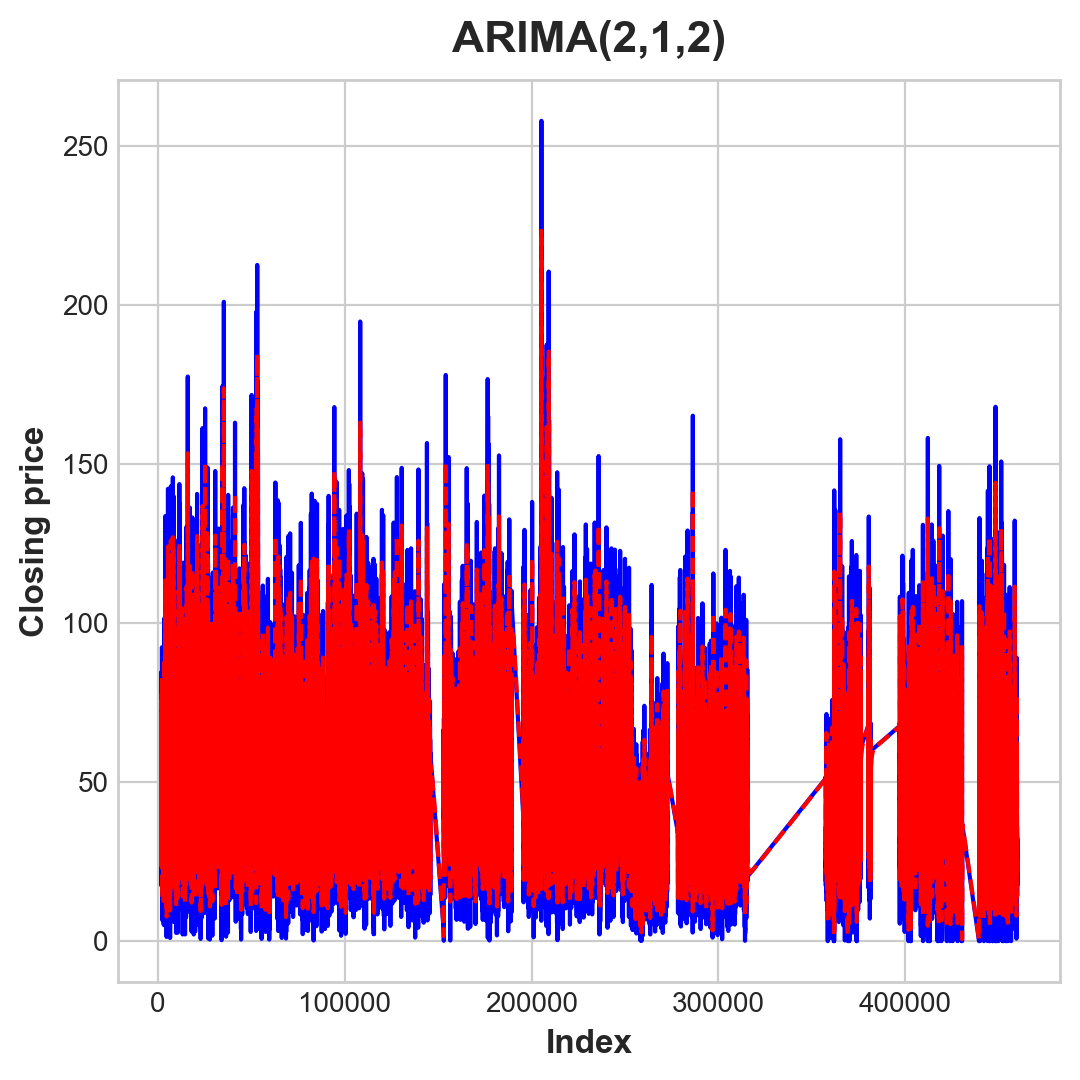

In [56]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ermita['pm10_arima'].iloc[200:].plot(color='b', linestyle = '-', ax=axarr)
ermita['ARIMA'].iloc[200:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(2,1,2)')
plt.xlabel('Index')
plt.ylabel('Closing price');

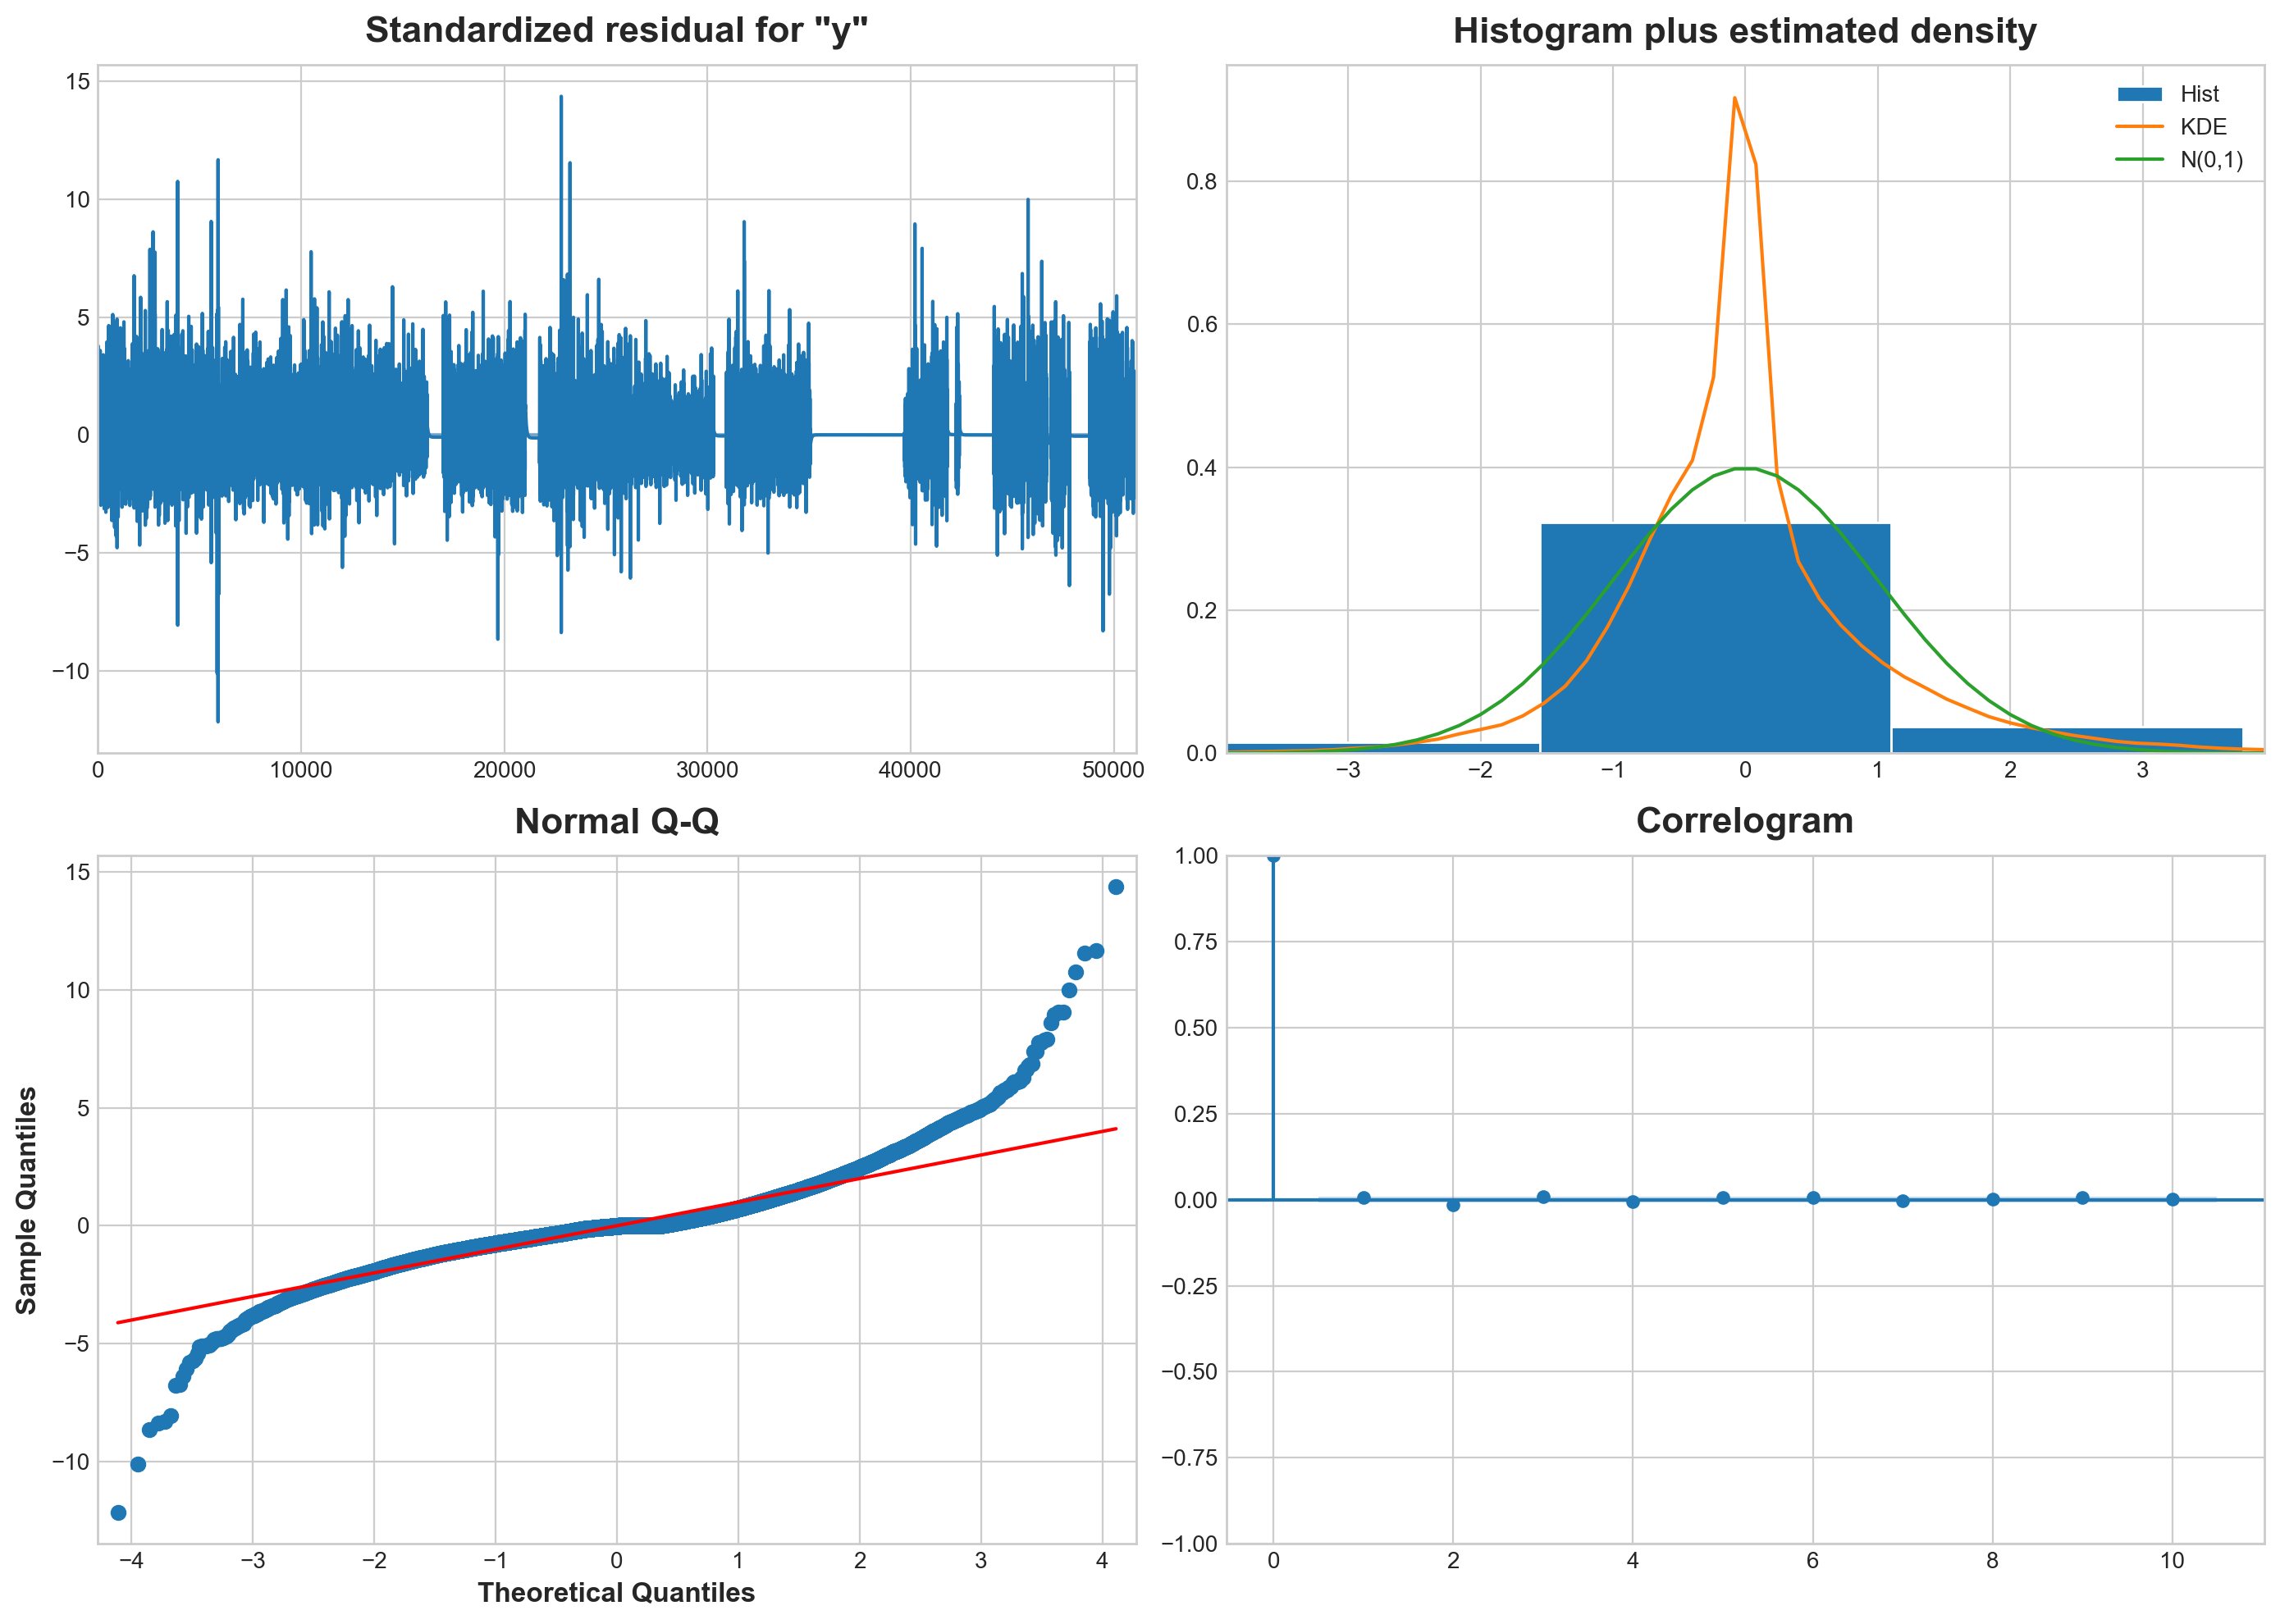

In [57]:
arima_obj_fit.plot_diagnostics(figsize=(14,10));

In [50]:
best_order = (2,1,2)

In [79]:
def arima_rolling(history, test):
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
        
    return predictions

In [80]:
test_24dl = test_data.pm10.tolist()
yhat_24d  = arima_rolling(ermita.pm10_arima.tolist(), test_24dl)

predicted=35.248161, expected=49.300000
predicted=48.673841, expected=45.100000
predicted=43.897286, expected=37.300000
predicted=36.912343, expected=34.800000
predicted=34.949773, expected=38.300000
predicted=38.064244, expected=44.000000
predicted=42.756274, expected=61.200000
predicted=56.814752, expected=53.400000
predicted=49.346950, expected=96.000000
predicted=84.811781, expected=98.600000
predicted=84.970987, expected=63.900000
predicted=54.907707, expected=43.900000
predicted=39.378528, expected=53.200000
predicted=48.776876, expected=54.100000
predicted=49.987913, expected=50.500000
predicted=47.218170, expected=45.200000
predicted=43.121550, expected=31.500000
predicted=32.134342, expected=41.400000
predicted=41.294674, expected=40.600000
predicted=40.627863, expected=23.700000
predicted=26.557902, expected=29.000000
predicted=31.796170, expected=39.300000
predicted=40.550812, expected=27.300000
predicted=30.107050, expected=73.500000


In [87]:
arima_metrics=forecast_accuracy(np.array(test_24dl), np.array(yhat_24d), "24 days")
arima_metrics

MAE        MSE      MAPE       RMSE
24 days  11.532251  268.36396  0.274156  16.381818

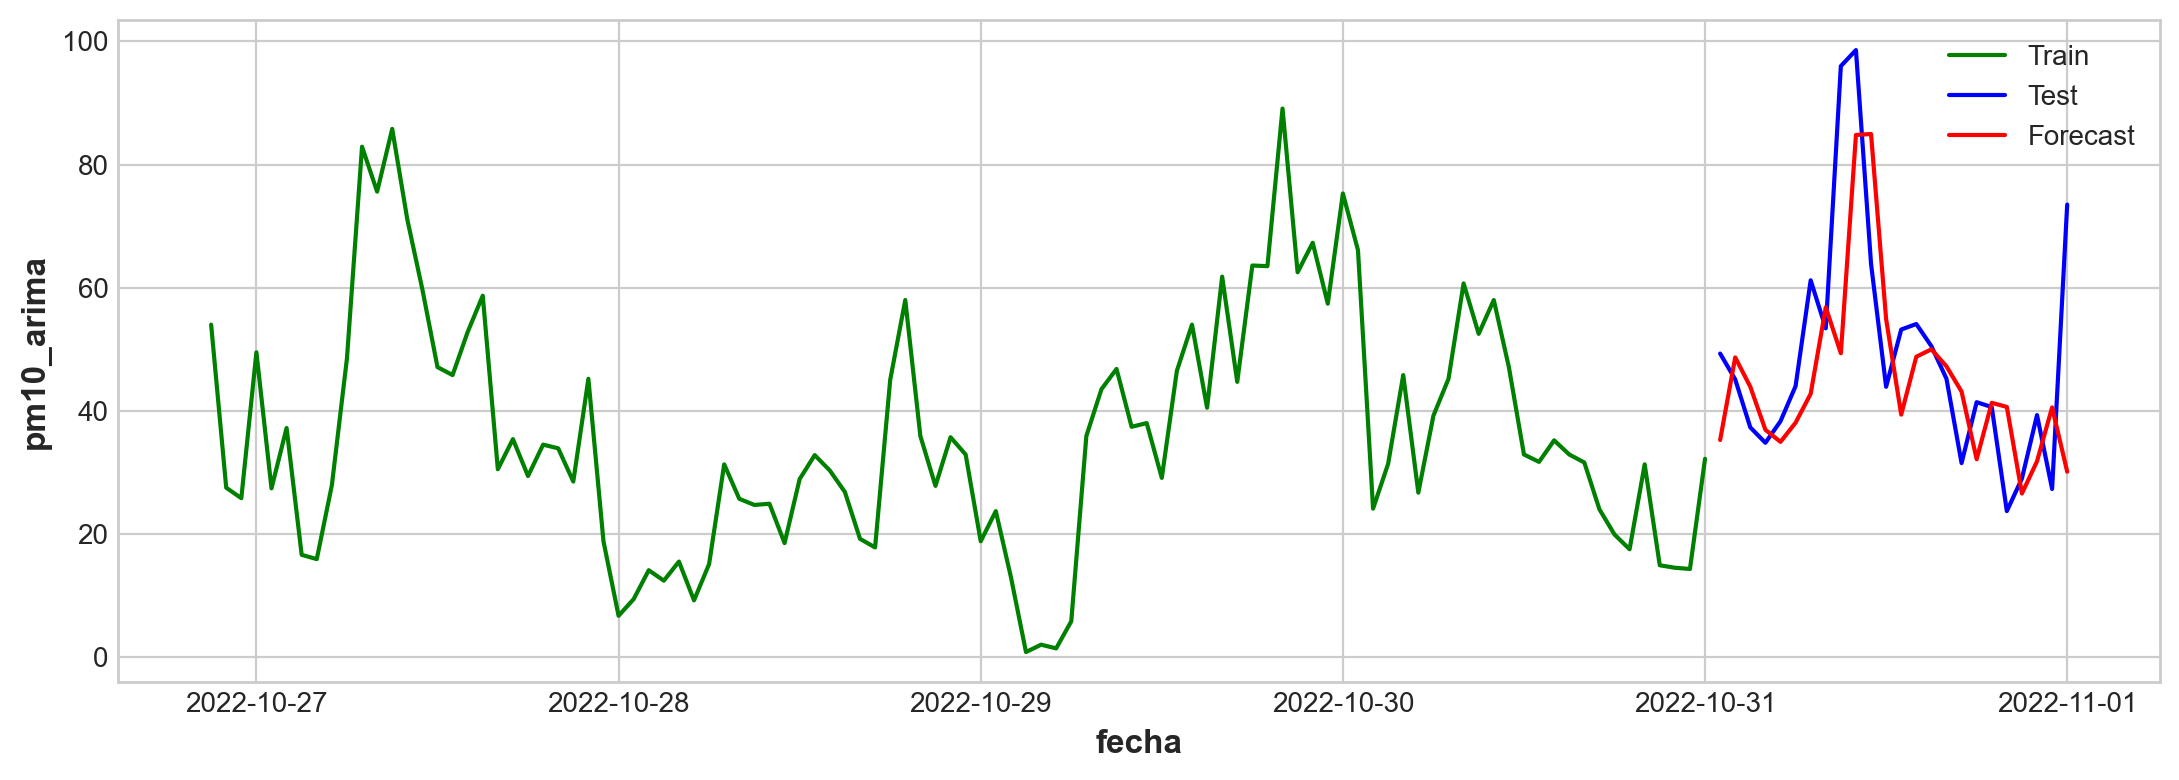

In [82]:
ax = sns.lineplot(x=ermita.fecha[-100:], y=ermita.pm10_arima[-100:], label="Train", color='g')
sns.lineplot(x=test_data.fecha, y=test_24dl, label="Test", color='b')
sns.lineplot(x=test_data.fecha, y=yhat_24d, label="Forecast", color='r')
plt.show()

In [83]:
pred_error = np.array(test_24dl) - np.array(yhat_24d)

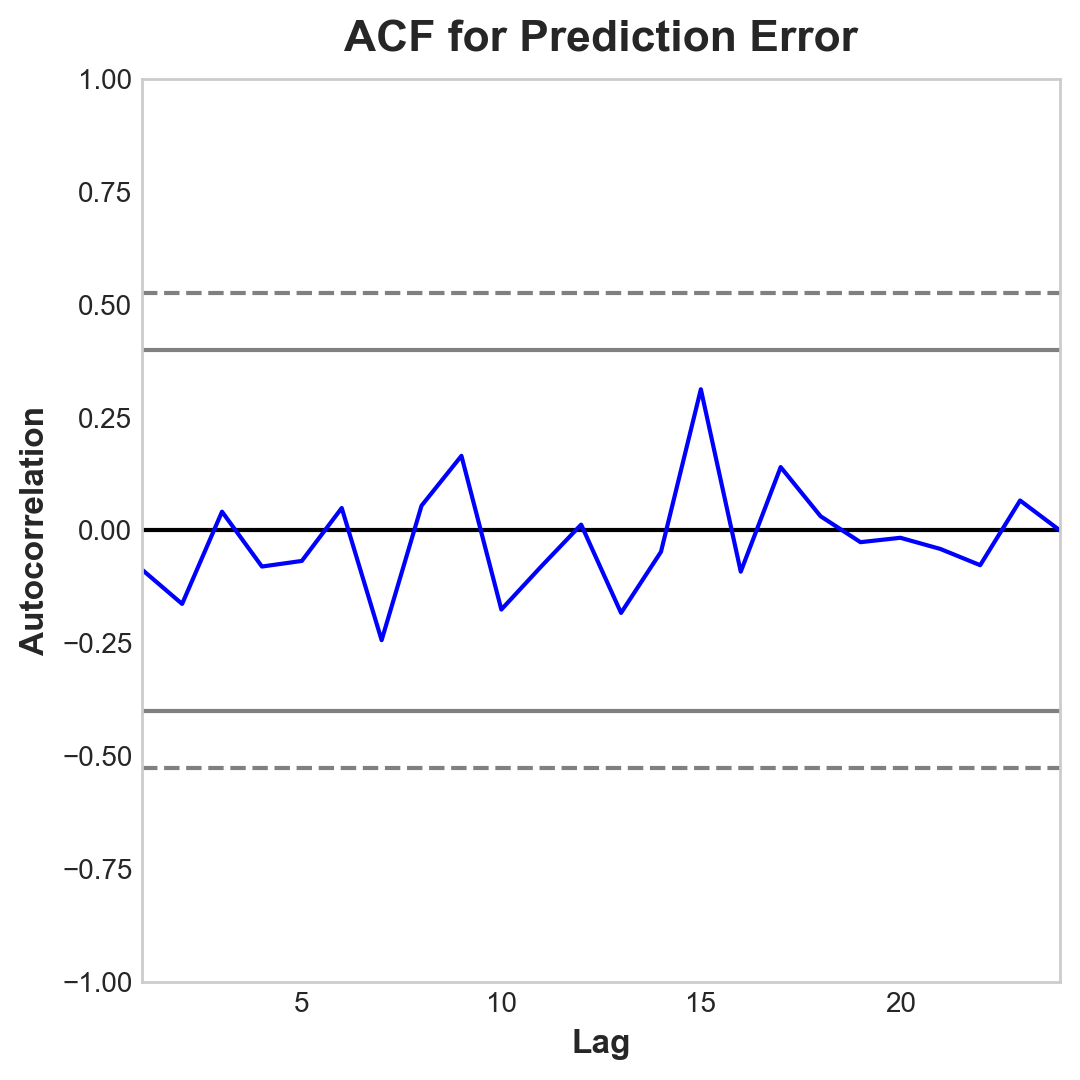

In [84]:
fig = plt.figure(figsize=(5.5, 5.5))
autocorrelation_plot(pred_error, color='b')
plt.title('ACF for Prediction Error');pred_error = np.array(test_24dl) - np.array(yhat_24d

### SARIMAX

In [51]:
x=ermita["pm10_arima"]-ermita["pm10_arima"].shift(24)
mod = sm.tsa.statespace.SARIMAX(ermita["pm10_arima"], trend='n', order=(2, 1,2),
seasonal_order=(1, 1, 1, 24))
sarimax= mod.fit()
sarimax.summary()

c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           pm10_arima   No. Observations:                51096
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 24)   Log Likelihood             -199610.688
Date:                              Mon, 20 May 2024   AIC                         399235.376
Time:                                      08:47:20   BIC                         399297.263
Sample:                                           0   HQIC                        399254.743
                                            - 51096                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1593      0.082      1.948      0.051      -0.001       0.320
ar.L2          0.3789      0.059      6.394      0.000       0.263       0.495
ma.L1         -0.4125      0.081     -5.088      0.000      -0.571      -0.254
ma.L2         -0.5546      0.080     -6.969      0.000      -0.711      -0.399
ar.S.L24       0.0472      0.003     13.492      0.000       0.040       0.054
ma.S.L24      -0.9849      0.001  -1401.108      0.000      -0.986      -0.984
sigma2       145.1249      0.415    349.341      0.000     144.311     145.939
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):            138579.51
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
sarimax_pred=np.append([0,0], sarimax.fittedvalues.tolist())

In [53]:
n_first = sarimax_pred.shape[0] - ermita.shape[0]
ermita['SARIMAX']=sarimax_pred[n_first:]

In [54]:
diffval_x=np.append([0,0], sarimax.resid)
ermita['diffval_x']=diffval_x[n_first:]

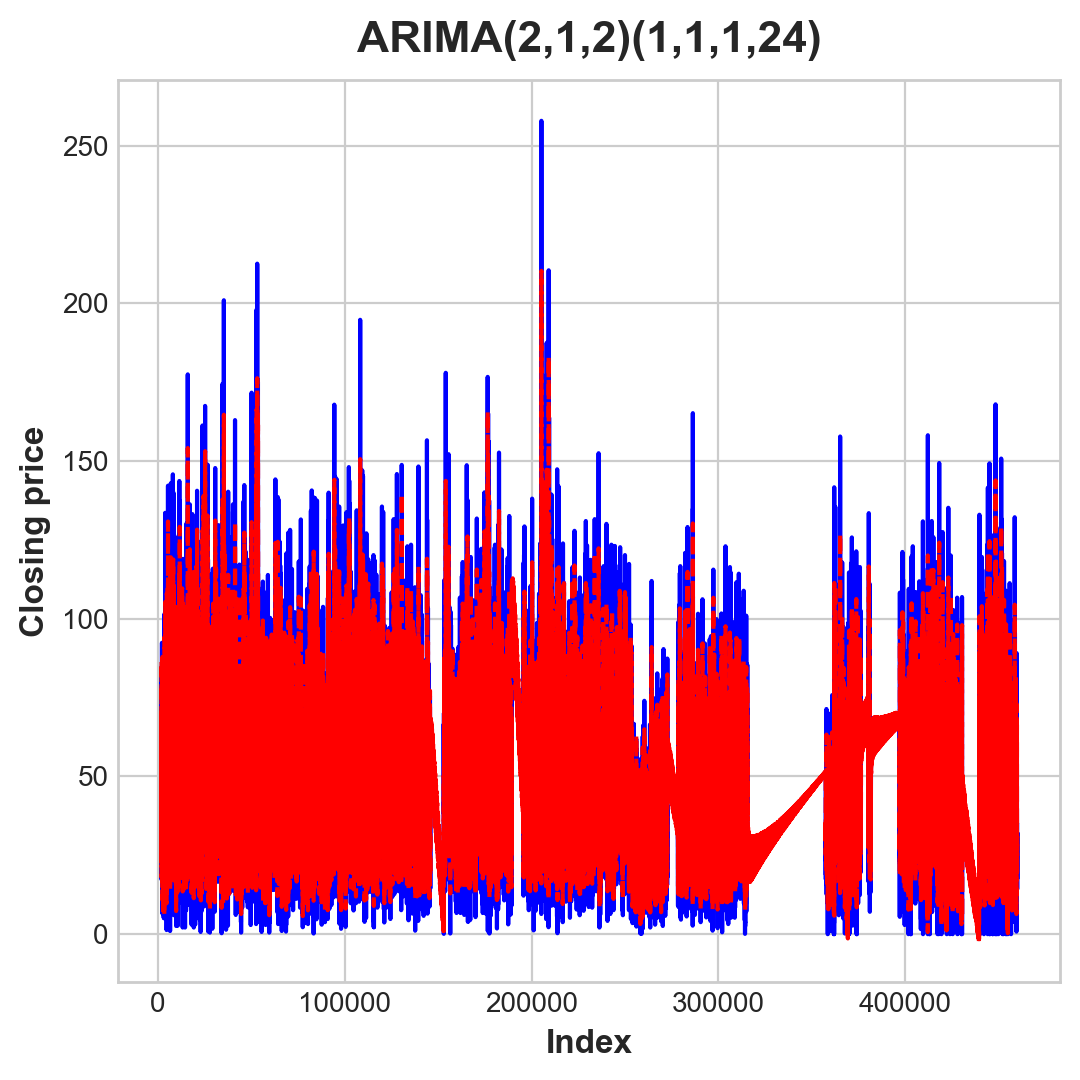

In [55]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ermita['pm10_arima'].iloc[200:].plot(color='b', linestyle = '-', ax=axarr)
ermita['SARIMAX'].iloc[200:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(2,1,2)(1,1,1,24)')
plt.xlabel('Index')
plt.ylabel('Closing price');

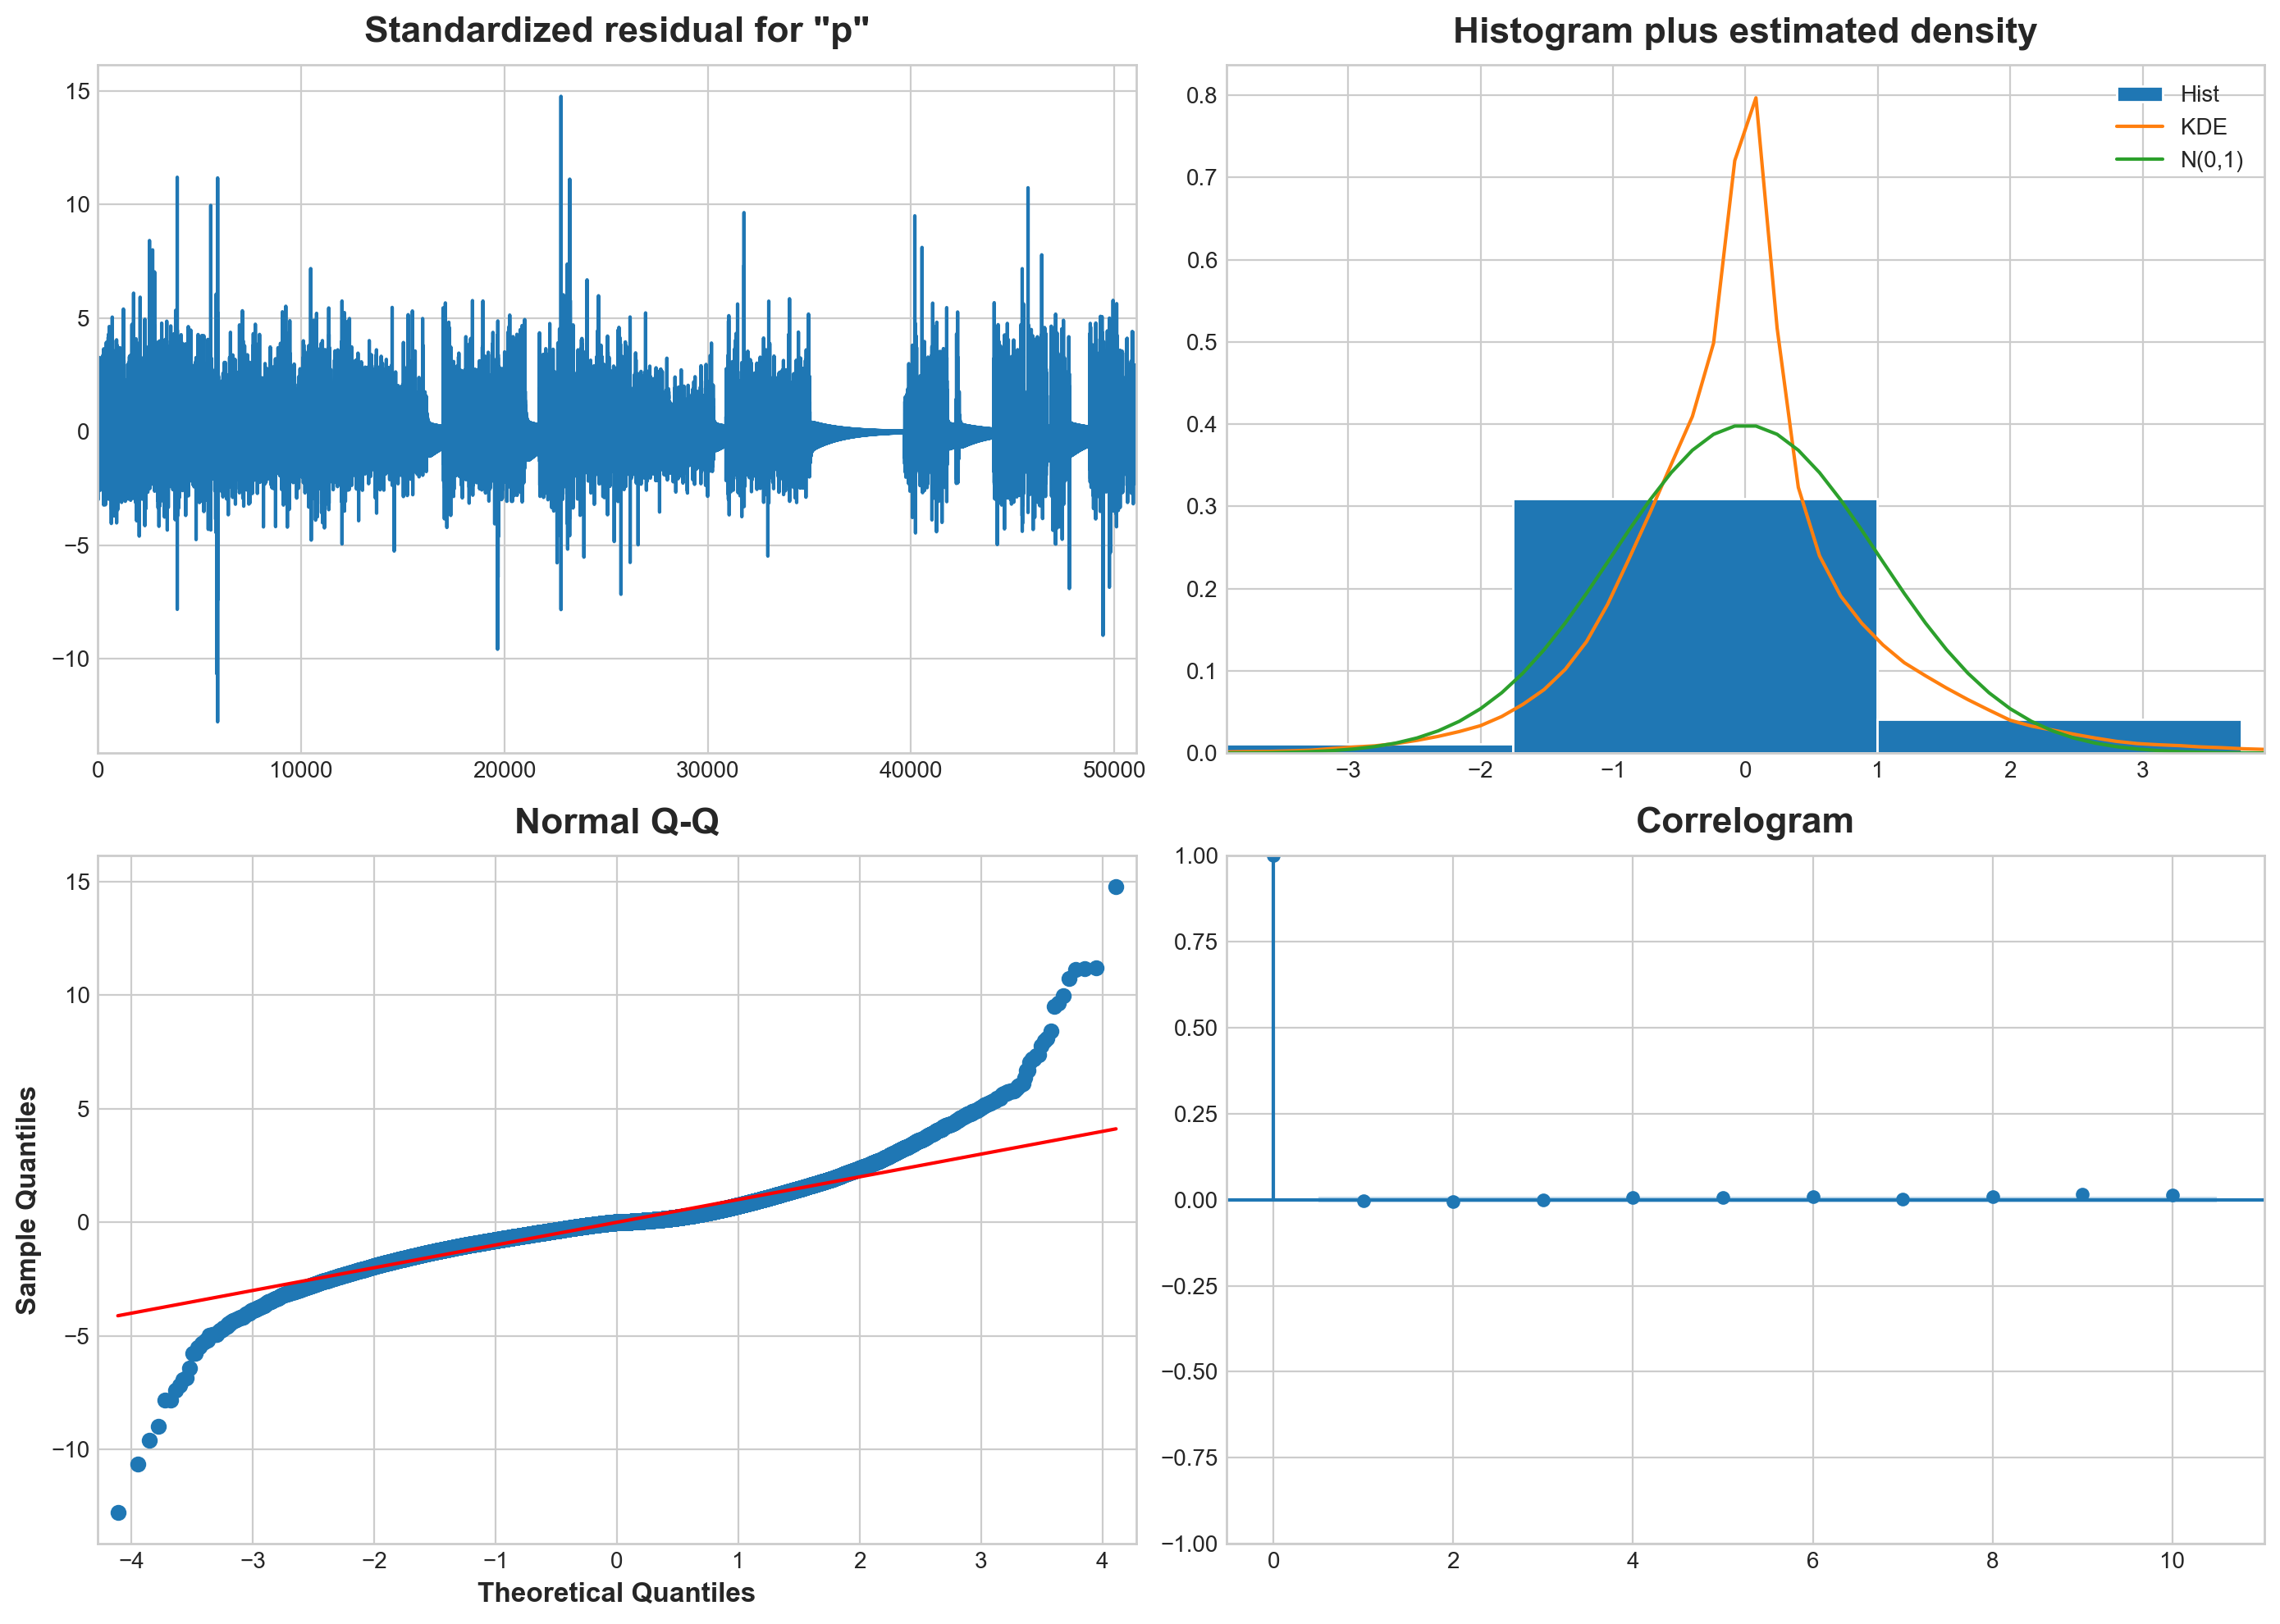

In [93]:
sarimax.plot_diagnostics(figsize=(14,10));

In [94]:
# def sarimax_rolling(history, test):
    
#     predictions = list()
#     for t in range(len(test)):
#         model = ARIMA(history, order=best_order, seasonal_order=(1,1,1,24))
#         model_fit = model.fit()
#         output = model_fit.forecast()
#         yhat = output[0]
#         predictions.append(yhat)
#         obs = test[t]
#         history.append(obs)
#         print('predicted=%f, expected=%f' % (yhat, obs))
        
#     return predictions

In [56]:
pred_sarimax = sarimax.forecast(24)
pred_sarimax 

c:\Users\kaes1\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


51096    32.479006
51097    25.536729
51098    24.290904
51099    26.008600
51100    24.103155
51101    28.559667
51102    44.180546
51103    53.242862
51104    59.055065
51105    58.265626
51106    47.880706
51107    41.112667
51108    38.592381
51109    38.374803
51110    38.051652
51111    33.986630
51112    32.422226
51113    33.253678
51114    33.565327
51115    34.891745
51116    32.442928
51117    30.687197
51118    29.406930
51119    29.770755
Name: predicted_mean, dtype: float64

In [58]:
test_24dl_x = test_data.pm10.tolist()
# yhat_24d_x  = sarimax_rolling(ermita.pm10_arima.tolist(), test_24dl_x)

In [60]:
sarimax_metrics=forecast_accuracy(np.array(test_24dl_x), np.array(pred_sarimax ), "24 days")
sarimax_metrics

MAE         MSE      MAPE       RMSE
24 days  14.177745  328.502116  0.398834  18.124627

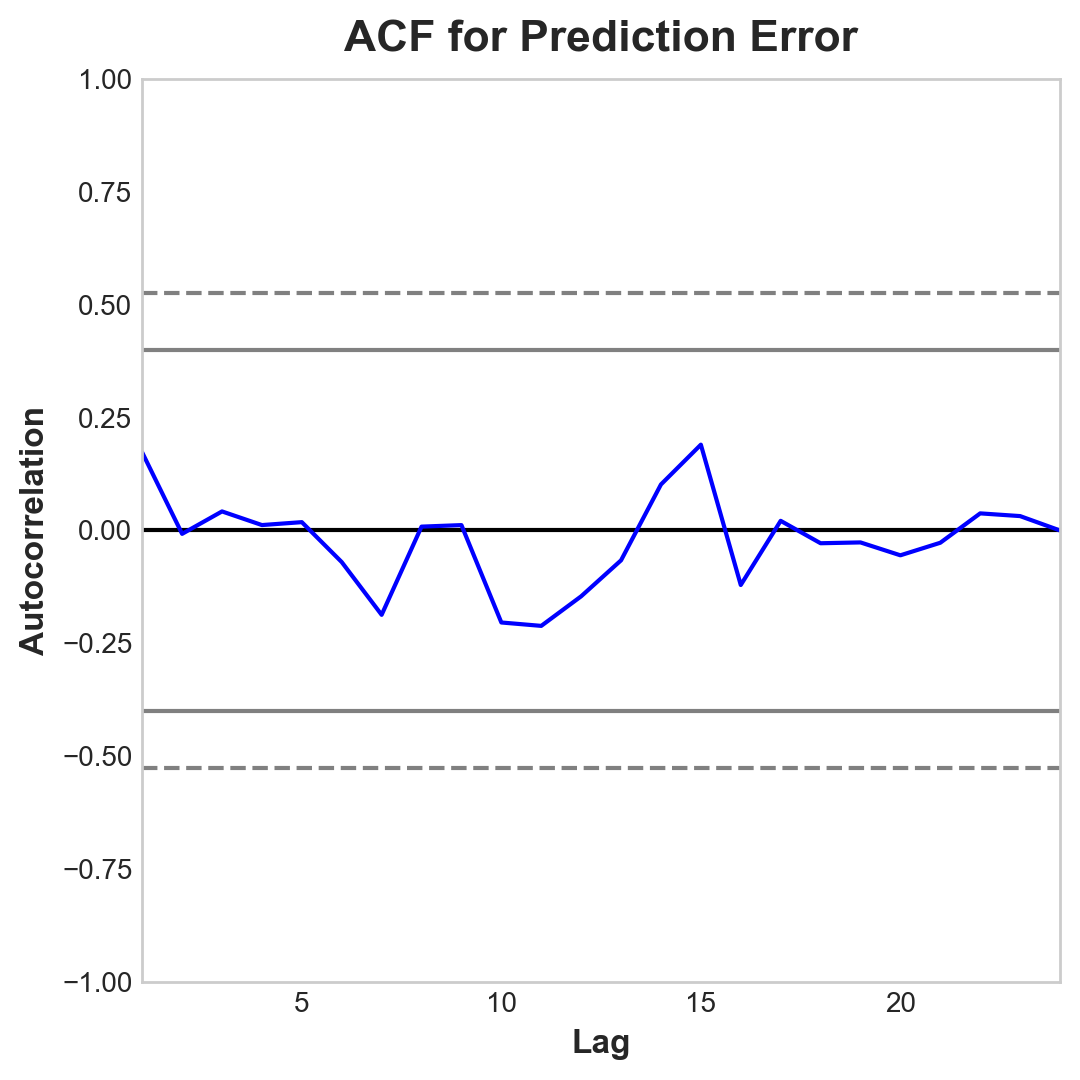

In [64]:
pred_error_x = np.array(test_24dl_x) - np.array(pred_sarimax)

fig = plt.figure(figsize=(5.5, 5.5))
autocorrelation_plot(pred_error_x, color='b')
plt.title('ACF for Prediction Error');

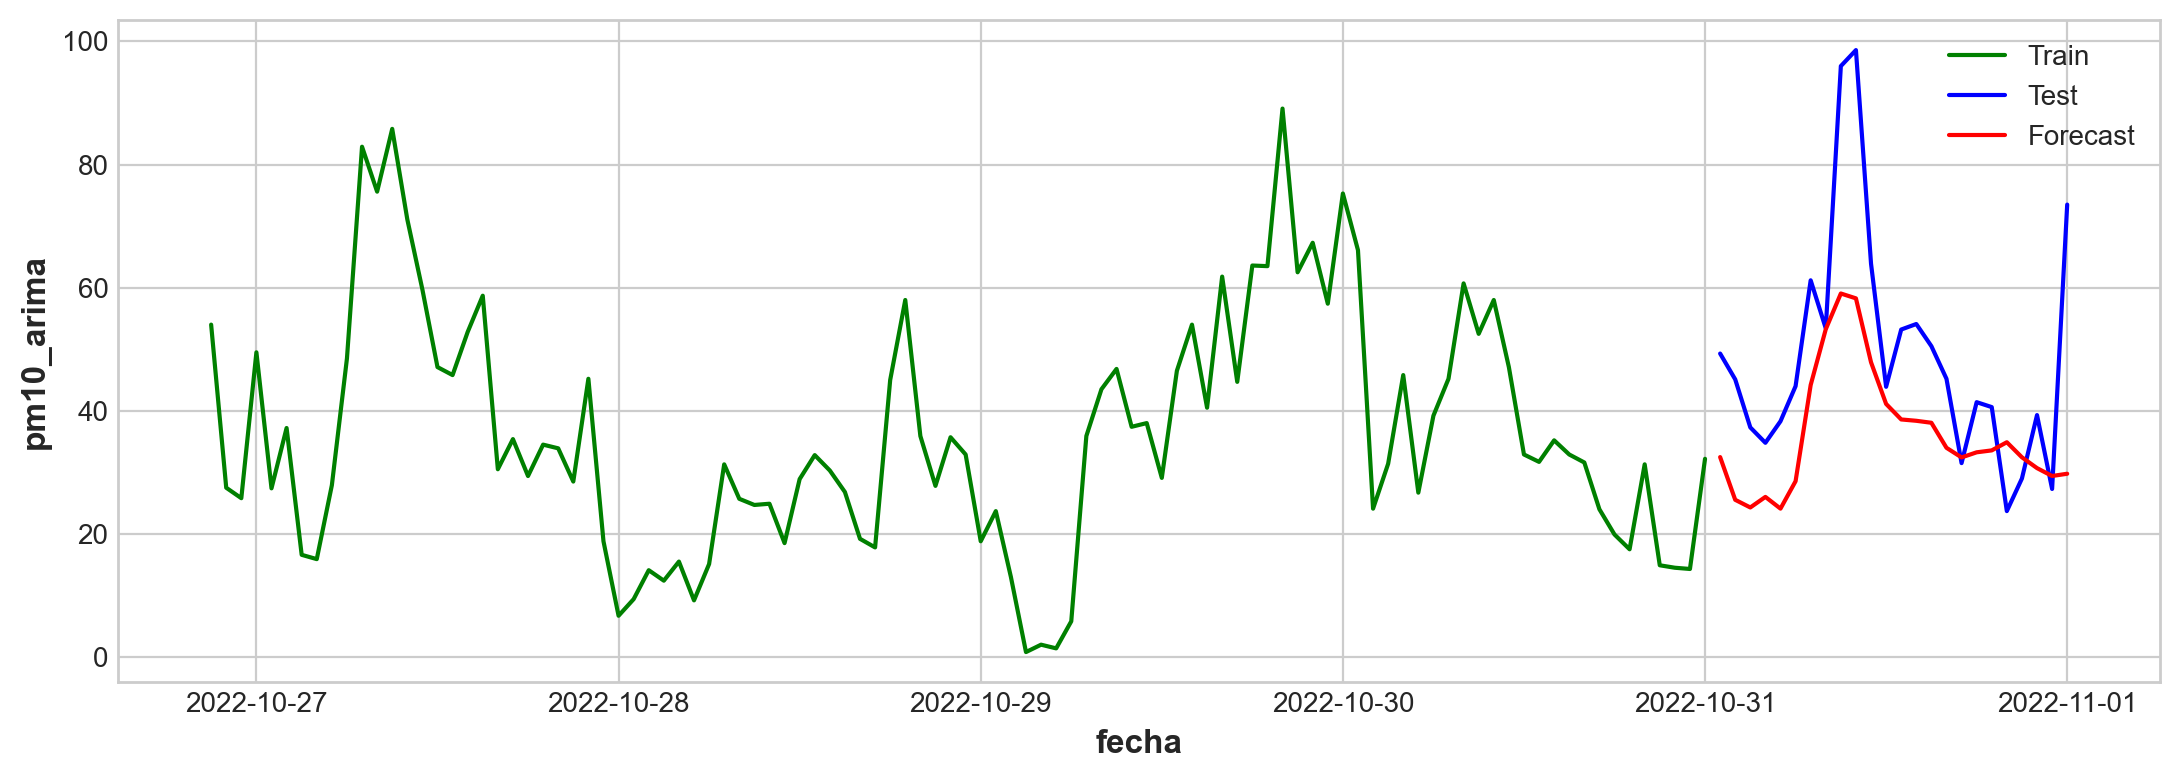

In [65]:
ax = sns.lineplot(x=ermita.fecha[-100:], y=ermita.pm10_arima[-100:], label="Train", color='g')
sns.lineplot(x=test_data.fecha, y=test_24dl_x, label="Test", color='b')
sns.lineplot(x=test_data.fecha, y=np.array(pred_sarimax) , label="Forecast", color='r')
plt.show()

### SVR

In [313]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

train = pd.DataFrame({"pm10_": ermita["pm10_arima"].values})
scaler = MinMaxScaler()
train['pm10_'] = scaler.fit_transform(train[["pm10_"]])

test = pd.DataFrame({"pm10_": test_data["pm10"].values})

In [314]:
test_data

variable                     fecha  pm10
0        2022-10-31 00:59:59+00:00  49.3
1        2022-10-31 01:59:59+00:00  45.1
2        2022-10-31 02:59:59+00:00  37.3
3        2022-10-31 03:59:59+00:00  34.8
4        2022-10-31 04:59:59+00:00  38.3
5        2022-10-31 05:59:59+00:00  44.0
6        2022-10-31 06:59:59+00:00  61.2
7        2022-10-31 07:59:59+00:00  53.4
8        2022-10-31 08:59:59+00:00  96.0
9        2022-10-31 09:59:59+00:00  98.6
10       2022-10-31 10:59:59+00:00  63.9
11       2022-10-31 11:59:59+00:00  43.9
12       2022-10-31 12:59:59+00:00  53.2
13       2022-10-31 13:59:59+00:00  54.1
14       2022-10-31 14:59:59+00:00  50.5
15       2022-10-31 15:59:59+00:00  45.2
16       2022-10-31 16:59:59+00:00  31.5
17       2022-10-31 17:59:59+00:00  41.4
18       2022-10-31 18:59:59+00:00  40.6
19       2022-10-31 19:59:59+00:00  23.7
20       2022-10-31 20:59:59+00:00  29.0
21       2022-10-31 21:59:59+00:00  39.3
22       2022-10-31 22:59:59+00:00  27.3
23       2022-10-31 23:59:59+00:00  73.5

In [315]:
test['pm10_'] = scaler.transform(test[["pm10_"]])

In [316]:
# Converting to numpy arrays
train_data = train.values
test_d = test[["pm10_"]].values

In [317]:
timesteps=12

In [318]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(51085, 12)

In [319]:
test_data_timesteps=np.array([[j for j in test_d[i:i+timesteps]] for i in range(0,len(test_d)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(13, 12)

In [320]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(51085, 11) (51085, 1)
(13, 11) (13, 1)


In [321]:
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

In [322]:
model.fit(x_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [323]:
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=10, epsilon=0.05, gamma=0.5)

In [324]:
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(51085, 1) (13, 1)


In [325]:
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

51085 13


In [326]:
# Scaling the original values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

51085 13


In [327]:
train_timestamps = ermita["fecha"]
test_timestamps = test_data["fecha"]

print(len(train_timestamps), len(test_timestamps))

51096 24


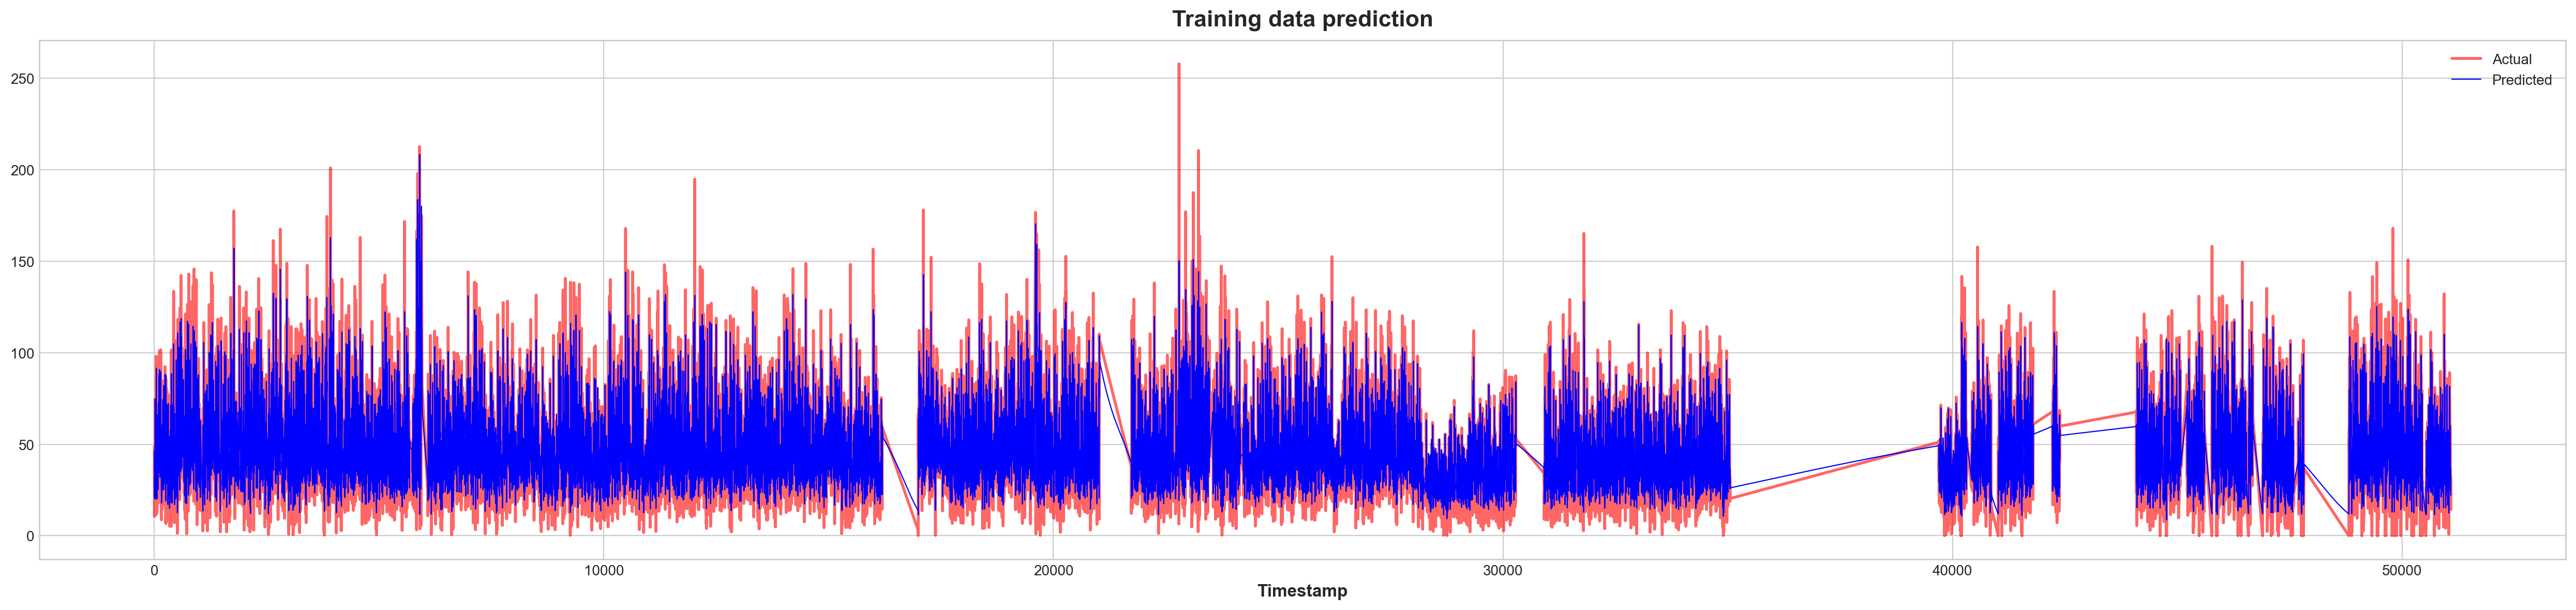

In [329]:
plt.figure(figsize=(25,6))
plt.plot( y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot( y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

In [328]:
y_test

array([[43.9],
       [53.2],
       [54.1],
       [50.5],
       [45.2],
       [31.5],
       [41.4],
       [40.6],
       [23.7],
       [29. ],
       [39.3],
       [27.3],
       [73.5]])

In [330]:
y_test_pred

array([[57.90380021],
       [45.78817568],
       [52.41596022],
       [52.77982901],
       [47.41000589],
       [44.84582696],
       [33.78742413],
       [43.18226986],
       [41.15040685],
       [29.26019521],
       [33.31832327],
       [41.49918974],
       [31.66590372]])

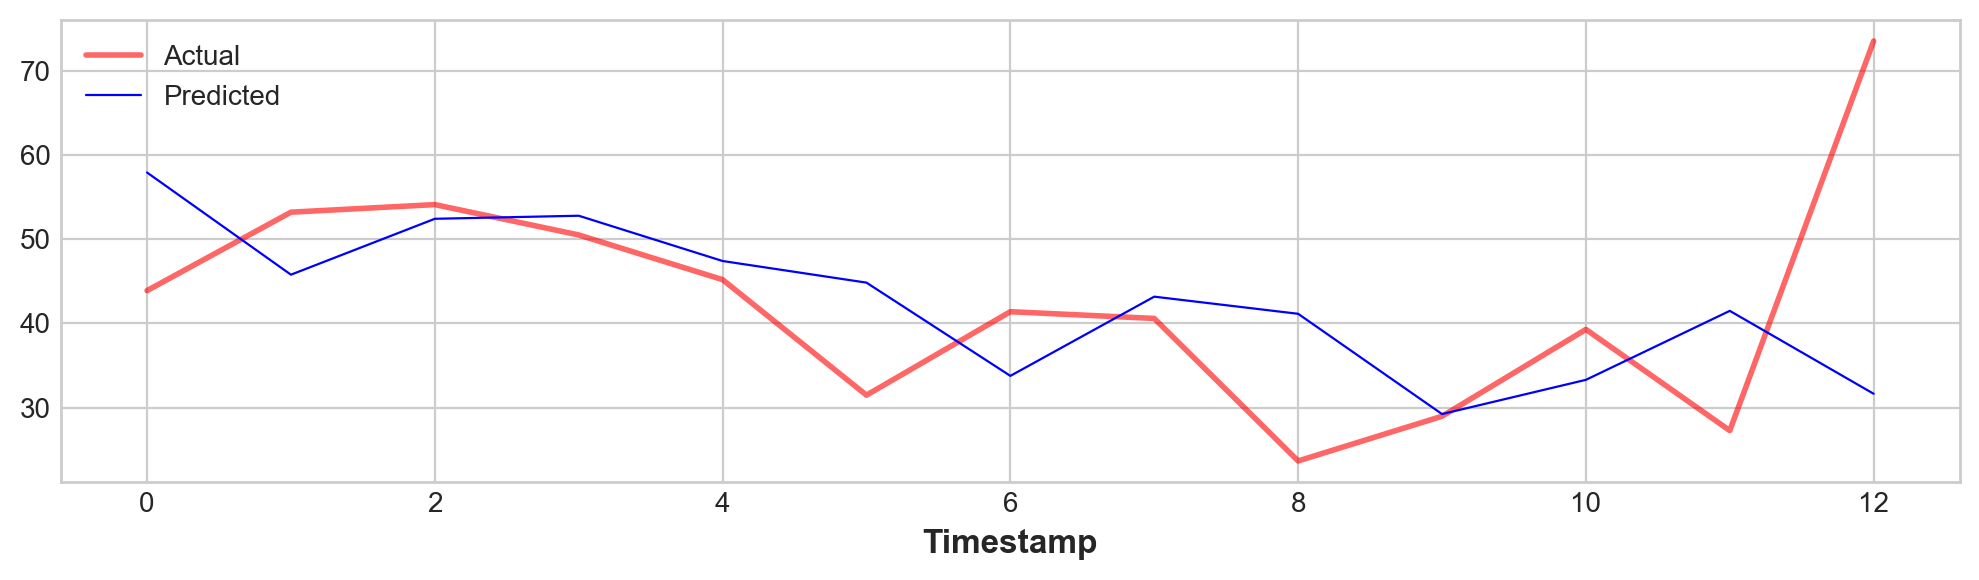

In [331]:
plt.figure(figsize=(10,3))
plt.plot(y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [333]:
svr_metrics=forecast_accuracy(np.array(y_test), np.array(y_test_pred), "12 days")
svr_metrics

MAE         MSE      MAPE       RMSE
12 days  10.065826  215.289483  0.260316  14.672746

### LSTM

### MODELO MEJORADO: ARIMA-SVR

## Evaluación de resultados

## Conclusiones